Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:0C:00.0)


--------------------------------------------------
TRIAL SUMMARY (20aa4a755fb74094d00a81af065fd1fbc60dcb98)
    Record_Info:
        name = ["GRU"], elapse_time = 9:02:09, last_epoch = 27, start_time = "07-24-2017 12:29:08 PST-PDT"
        val_acc = 0.9515
        num_train = 300000, num_validation = 37500
        activation = "tanh", depth = 1, dropout = 0.0, l1_reg = 0.0, labels = ["qcd", "ttbar", "wjets"], lstm_dropout = 0.0, n_train_files = 40, normalize = true, patience = 8, recurrent_width = 50, sort_ascending = false, sort_on = "MaxLepDeltaR"
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (11bd589145b855c8652fdd6fc36779f98430e68b)
    Record_Info:
        name = ["GRU"], elapse_time = 22:04:27, last_epoch = 65, start_time = "07-17-2017 01:53:29 PST-PDT"
        val_acc = 0.9510
        num_train = 300000, num_validation = 37500
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "ttbar", "wj

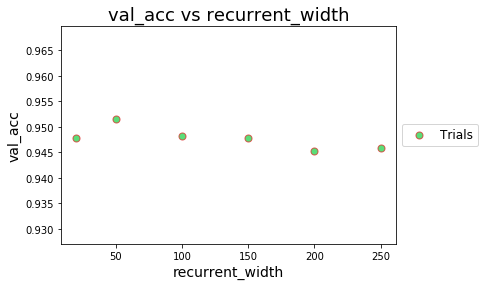

(20, [0.9477866689364115, 0.94464000193278, 0.9446133343378703], 0.94568000173568734)
(50, [0.951546668211619, 0.9509866687456767, 0.9509066672325134, 0.9492800005276998, 0.9481066672007242, 0.9478400020599366, 0.9476533365249634, 0.9472266683578491, 0.9471733357111612, 0.9468266673088074, 0.9467466694513956, 0.9463466668128967, 0.9447999989191691, 0.9436266700426738, 0.9418400017420451, 0.9407733330726623, 0.9364800012906392, 0.9343200027147929, 0.6766933364868164], 0.93153544012705469)
(100, [0.9481333335240681, 0.9477866683006286, 0.9458133358955383], 0.94724444590674495)
(150, [0.9477333356539408, 0.9469600032170613, 0.9446133354504903], 0.94643555810716418)
(200, [0.9453066706657409, 0.944853334903717, 0.9435466680526733], 0.94456889120737708)
(250, [0.9458666685422261, 0.9449066692988077, 0.9442133348782857], 0.94499555757310649)


In [1]:

%matplotlib inline
if __package__ is None:
    import sys, os
    #sys.path.append(os.path.realpath("/data/shared/Software/CMS_Deep_Learning"))
    sys.path.append(os.path.realpath("/home/dweitekamp/CMS_Deep_Learning/"))
os.environ["CUDA_VISIBLE_DEVICES"] = '5'

from CMS_Deep_Learning.storage.archiving import *
from CMS_Deep_Learning.layers.slice import Slice
from CMS_Deep_Learning.layers.lorentz import Lorentz
#from keras.utils.visualize_util import plot
from IPython.display import Image, display
from CMS_Deep_Learning.preprocessing.preprocessing import size_from_meta
from CMS_Deep_Learning.postprocessing.colors import colors_contrasting1
from CMS_Deep_Learning.postprocessing.analysistools import *
from CMS_Deep_Learning.postprocessing.plot import *
from CMS_Deep_Learning.postprocessing.metrics import *
import numpy as nP
os.environ["DELPHES_DIR"] = "/bigdata/shared/Delphes"


def getKey(trial):
    return trial.get_from_record('val_acc')

def sortOnMetric(trials, sortMetric='val_acc'):
    '''Sort a list of trials on a record metric'''


    return trials.sort(key=getKey, reverse=True)

from CMS_Deep_Learning.storage.archiving import *
archive_dir = "/bigdata/shared/Delphes/keras_archive_7_9/"
trials = get_trials_by_name(archive_dir,".",assert_complete=True)
#print(len(trials))
trials = sorted(trials, key=lambda x:x.get_from_record('val_acc'),reverse=True)
for t in trials:
    print(t.summary())
    
plotMetricVsMetric(trials,"recurrent_width")
for w in [20,50,100,150,200,250]:
    ts = findWithMetrics(trials, {"recurrent_width": w})
    v_a = [t.get_from_record("val_acc") for t in ts]
    print(w,v_a, np.mean(v_a))

#print(trial.summary())
#plotEverything(trial)
#import glob

from CMS_Deep_Learning.io import repr_structure, retrieve_data, nb_samples_from_h5
from CMS_Deep_Learning.io import gen_from_data, simple_grab, restructure, flatten, assert_list, DataIterator,TrialIterator
#X = simple_grab("X",input_keys='Particles', label_keys='Labels',
#                data=glob.glob("/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_dec/val/*.h5")[0])
#tot = 0
#for f in glob.glob("/bigdata/shared/Delphes/REDUCED_IsoLep/qcd_lepFilter_13TeV/*.h5"):
#    tot += size_from_meta(f)
#print("QCD",tot)

#tot = 0
#for f in glob.glob("/bigdata/shared/Delphes/REDUCED_IsoLep/ttbar_lepFilter_13TeV/*.h5"):
#    tot += size_from_meta(f)
#print("ttbar",tot)

#tot = 0
#for f in glob.glob("/bigdata/shared/Delphes/REDUCED_IsoLep/wjets_lepFilter_13TeV/*.h5"):
#    tot += size_from_meta(f)
#print("Wjets", tot)

#trial = [t for t in trials if t.is_complete()]
#print(t.summary())
#roc_data = get_roc_data(trial=trial,true_class_index=0)
#print(roc_data[3])
#plotEverything(trial)
#def sortTrialsOn(lst):
    

In [166]:
GRU_trials = get_trials_by_name(archive_dir,"GRU",assert_complete=True)
GRU_trials = findWithMetrics(GRU_trials, {"recurrent_width": 50, 'num_train':300000,'l1_reg': 0.0,'normalize':None})

trials_MaxLepDeltaR_des = findWithMetrics(GRU_trials, {'sort_on': 'MaxLepDeltaR', 'sort_ascending':False})
print('trials_MaxLepDeltaR_des')
for t in trials_MaxLepDeltaR_des:
    print(t.summary())

trials_MaxLepDeltaR_asc = findWithMetrics(GRU_trials, {'sort_on': 'MaxLepDeltaR', 'sort_ascending':True})
print('trials_MaxLepDeltaR_asc')
for t in trials_MaxLepDeltaR_asc:
    print(t.summary())
print('trials_random')
trials_random = findWithMetrics(GRU_trials, {'sort_on': 'random', 'sort_ascending':False})
for t in trials_random:
    print(t.summary())
print('trials_MaxLepDeltaPhi')
trials_MaxLepDeltaPhi = findWithMetrics(GRU_trials, {'sort_on': 'MaxLepDeltaPhi', 'sort_ascending':False})
for t in trials_MaxLepDeltaPhi:
    print(t.summary())

trials_MaxLepDeltaR_des
--------------------------------------------------
TRIAL SUMMARY (4495ff3def0b78f2f342bafd351cc48c133e5c75)
    Record_Info:
        name = ["GRU"], elapse_time = 18:13:55, last_epoch = 55, start_time = "07-19-2017 07:30:29 PST-PDT"
        val_acc = 0.9493
        num_train = 300000, num_validation = 37500
        activation = "tanh", depth = 1, dropout = 0.0, l1_reg = 0.0, labels = ["qcd", "ttbar", "wjets"], lstm_dropout = 0.0, n_train_files = 40, patience = 8, recurrent_width = 50, sort_ascending = false, sort_on = "MaxLepDeltaR"
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (13904ae5570e889ae4e04075aefb54f8567d8a39)
    Record_Info:
        name = ["GRU"], elapse_time = 12:10:38, last_epoch = 36, start_time = "07-19-2017 07:30:17 PST-PDT"
        val_acc = 0.9468
        num_train = 300000, num_validation = 37500
        activation = "tanh", depth = 1, dropout = 0.0, l1_reg = 0.0, labels =

In [177]:
print(np.std([t.get_from_record("val_acc") for t in trials_MaxLepDeltaR_des]))
print(np.mean([t.get_from_record("val_acc") for t in trials_MaxLepDeltaR_des]))
aucs = []
for t in trials_MaxLepDeltaR_des:
    val = ['/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/000.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/001.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/002.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/003.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/004.h5']
    _,_,_,auc = get_roc_data(data=val,input_keys='Particles',
                   label_keys='Labels',
                   true_class_index=1,
                    model=t.compile(loadweights=True))
    aucs.append(auc)
print(np.std(aucs))
print(np.mean(aucs))
val = ['/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_asc/val/000.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_asc/val/001.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_asc/val/002.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_asc/val/003.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_asc/val/004.h5']

_,_,_,auc = get_roc_data(data=val,input_keys='Particles',
                   label_keys='Labels',
                   true_class_index=1,
                    model=trials_MaxLepDeltaR_asc[0].compile(loadweights=True))
print(auc)

val = ['/bigdata/shared/Delphes/np_datasets/3_way/random/val/000.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/random/val/001.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/random/val/002.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/random/val/003.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/random/val/004.h5']

_,_,_,auc = get_roc_data(data=val,input_keys='Particles',
                   label_keys='Labels',
                   true_class_index=1,
                    model=trials_random[0].compile(loadweights=True))
print(auc)

val = ['/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaPhi_des/val/000.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaPhi_des/val/001.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaPhi_des/val/002.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaPhi_des/val/003.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaPhi_des/val/004.h5']

_,_,_,auc = get_roc_data(data=val,input_keys='Particles',
                   label_keys='Labels',
                   true_class_index=1,
                    model=trials_MaxLepDeltaPhi[0].compile(loadweights=True))
print(auc)

0.00261285536435
0.947432382061
0.000249097927514
0.995277518171
0.9942626464
0.9932923808
0.9937974064


In [188]:
LTSM_trials = get_trials_by_name(archive_dir,"LSTM",assert_complete=True)
LTSM_trials = findWithMetrics(LTSM_trials, {'num_train':300000})
for t in LTSM_trials:
    print(t.summary())
print(np.std([t.get_from_record("val_acc") for t in LTSM_trials]))
print(np.mean([t.get_from_record("val_acc") for t in LTSM_trials]))
aucs = []
for t in LTSM_trials:
    val = ['/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/000.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/001.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/002.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/003.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/004.h5']
    _,_,_,auc = get_roc_data(data=val,input_keys='Particles',
                   label_keys='Labels',
                   true_class_index=1,
                    model=t.compile(loadweights=True))
    aucs.append(auc)
print(np.std(aucs))
print(np.mean(aucs))

--------------------------------------------------
TRIAL SUMMARY (e94d97aa164359d6d52ed3fc93b71ca95da445ee)
    Record_Info:
        name = ["LSTM"], elapse_time = 24:18:30, last_epoch = 60, start_time = "07-11-2017 06:46:40 PST-PDT"
        val_acc = 0.9427
        num_train = 300000, num_validation = 37500
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "ttbar", "wjets"], lstm_dropout = 0.0, n_train_files = 40, patience = 8, sort_ascending = false, sort_on = "MaxLepDeltaR"
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (c43898b546950fd4c6433d722287921f1d8cb51d)
    Record_Info:
        name = ["LSTM"], elapse_time = 34:25:24, last_epoch = 76, start_time = "07-09-2017 08:17:12 PST-PDT"
        val_acc = 0.9430
        num_train = 300000, num_validation = 37500
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "ttbar", "wjets"], lstm_dropout = 0.0, n_train_files = 40, pati

In [325]:
norm_trials = get_trials_by_name(archive_dir,"GRU",assert_complete=True)
norm_trials = findWithMetrics(norm_trials, {"recurrent_width": 50, 'num_train':300000,'l1_reg': 0.0,'normalize':True})
for t in norm_trials:
    print(t.summary())
print(np.std([t.get_from_record("val_acc") for t in norm_trials]))
print(np.mean([t.get_from_record("val_acc") for t in norm_trials]))
aucs = []
for t in norm_trials:
    val = ['/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/000.h5',
 '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/001.h5',
 '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/002.h5',
 '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/003.h5',
 '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/004.h5']
    _,_,_,auc = get_roc_data(data=val,input_keys='Particles',
                   label_keys='Labels',
                   true_class_index=1,
                    model=t.compile(loadweights=True))
    aucs.append(auc)
print(np.std(aucs))
print(np.mean(aucs))

--------------------------------------------------
TRIAL SUMMARY (40b643b01478a44dd79a36bd76d664b1e1bd9f4f)
    Record_Info:
        name = ["GRU"], elapse_time = 12:31:00, last_epoch = 31, start_time = "07-26-2017 04:05:53 PST-PDT"
        val_acc = 0.9537
        num_train = 300000, num_validation = 37500
        activation = "tanh", depth = 1, dropout = 0.0, l1_reg = 0.0, labels = ["qcd", "ttbar", "wjets"], lstm_dropout = 0.0, n_train_files = 40, normalize = true, patience = 8, recurrent_width = 50, sort_ascending = false, sort_on = "MaxLepDeltaR"
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (20aa4a755fb74094d00a81af065fd1fbc60dcb98)
    Record_Info:
        name = ["GRU"], elapse_time = 9:02:09, last_epoch = 27, start_time = "07-24-2017 12:29:08 PST-PDT"
        val_acc = 0.9515
        num_train = 300000, num_validation = 37500
        activation = "tanh", depth = 1, dropout = 0.0, l1_reg = 0.0, labels = ["qcd"

In [203]:
from CMS_Deep_Learning.io import TrialIterator
best_trial = trials[0]
#it = (best_trial,data_keys=["Labels"],input_keys='Particles',label_keys='Labels',return_prediction=True)
#y,pred = it.aslist()
val = ['/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/000.h5',
 '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/001.h5',
 '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/002.h5',
 '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/003.h5',
 '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des_norm/val/004.h5']

y,pred = simple_grab(['Y', 'predictions'],
                     input_keys='Particles',
                     label_keys='Labels',
                     data=val,
                     model = best_trial.compile(loadweights=True)
                     )
print(y.shape,pred.shape)


((37500, 3), (37500, 3))


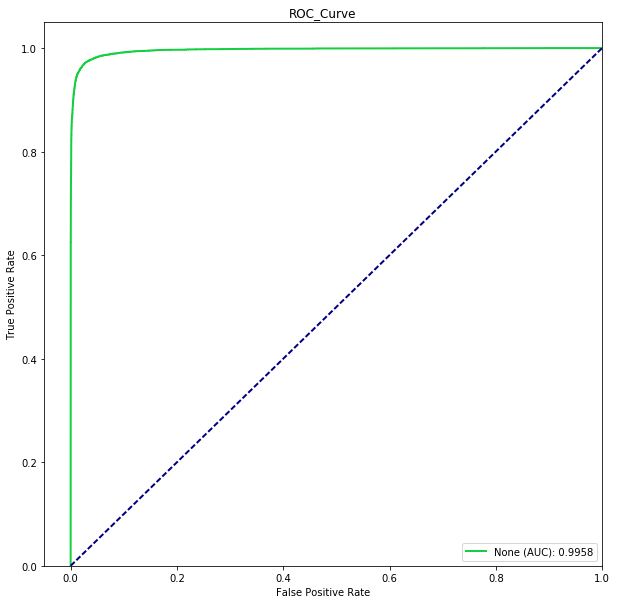

(<module 'matplotlib.pyplot' from '/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>,
 [{'ROC_data': (array([ 0.    ,  0.    ,  0.    , ...,  0.8944,  0.8944,  1.    ]),
    array([  8.00000000e-05,   4.80000000e-04,   6.40000000e-04, ...,
             9.99920000e-01,   1.00000000e+00,   1.00000000e+00]),
    array([  9.99985456e-01,   9.99981642e-01,   9.99981403e-01, ...,
             3.01419823e-05,   3.01369091e-05,   1.01772187e-07], dtype=float32),
    0.99584191840000003),
   'name': None}])

In [204]:
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.facecolor'] = 'w'
plot_roc_curve(Y=y, predictions=pred,#data=val,model = best_trial.compile(loadweights=True),
                   input_keys='Particles',
                   label_keys='Labels',
                   class_labels=class_labels,
                    true_class_index=1)

In [154]:
import pandas as pd
class_labels = {0:'QCD',1:r'$t\bar{t}$', 2:"W+jets"}
d = get_roc_points(Y=y, predictions=pred,#data=val,model = best_trial.compile(loadweights=True),
                   input_keys='Particles',
                   label_keys='Labels',
                   class_labels=class_labels,
                   true_class_index=1, tpr=[.40,.60,.70,.80,.85,.9,.95,.975,.99,.995,.99999])
print(100*pd.DataFrame(d, columns=['tpr','fpr','fpr:W+jets','fpr:QCD', 'thresh']))



(True, True, True)
        tpr     fpr  fpr:W+jets  fpr:QCD     thresh
0    40.032   0.000       0.000    0.000  99.904805
1    59.968   0.016       0.008    0.024  99.581593
2    70.032   0.040       0.024    0.056  98.954695
3    79.312   0.104       0.056    0.152  97.016269
4    84.984   0.188       0.112    0.264  93.316019
5    90.048   0.472       0.344    0.600  81.577635
6    94.992   1.296       1.192    1.400  47.748283
7    97.496   3.280       3.032    3.528  18.198611
8    99.000   8.780       8.760    8.800   3.897466
9    99.496  14.564      15.120   14.008   1.508987
10  100.000  89.440      99.904   78.976   0.003014


In [126]:
def to_proj_geom(preds, index_positions=[0, 1, 2],log_scale=False,log_intesity=50.0):
    if(log_scale):
        f = lambda x: (1.0 - np.log(2.0)/np.log(2.0+log_intesity*x))/(1.0 - np.log(2.0)/np.log(2.0+log_intesity))
        preds = f(preds)
    
    k = preds.shape[-1]
    assert k == 3, 'Really only works for 3'
    vecs = []
    i_s = 1.0 / np.sqrt(2)
    Q, R = np.linalg.qr([[1, 1, 0],
                         [1, -i_s, 1],
                         [1, -i_s, 0]])
    projected = np.dot(preds[:, index_positions], Q[:, 1:])
    
    

    return projected 


def plot_fano_plane(preds, targets, index_positions=[0, 1, 2],
                    index_colors={0: 'r', 1: 'g', 2: 'b'},
                    bin_res=300, background_color='black',
                    show_plot=False,
                    show_image=True,
                    log_scale=False,
                    log_intesity=50.0,
                    thicken_lines=True,
                    showChannels=False, thresholds=[]):
    import matplotlib.pyplot as plt
    from matplotlib.colors import LinearSegmentedColormap, to_rgb,LogNorm
    import scipy
    import scipy.ndimage
    projdata = to_proj_geom(preds, index_positions,log_scale=log_scale,log_intesity=log_intesity)
    
   
        
    x, y = projdata[:, 1], projdata[:, 0]

    # Magic values based on the maximum in each dir
    w1 = np.sqrt(2.0) / 2
    w2 = 0.81649658092772592  # np.sqrt(3.0)/2
    w3 = 0.40824829046386313 if not log_scale else 1.0

    plt.rcParams['axes.facecolor'] = background_color

    # ------------DRAW ONE CHANNEL FOR EACH TARGET-------------------
    channels = []
    for i in index_positions:
        indicies = [j for j, t in enumerate(targets) if np.argmax(t) == i]
        x_i, y_i = x[indicies], y[indicies]
        color = to_rgb(index_colors[i])
        cmap_i = LinearSegmentedColormap.from_list('mycmap' + str(i), [(0.0, color), (1.0, color)])
        c_i, _, _, im = plt.hist2d(x_i, y_i, cmap=cmap_i, bins=bin_res, norm=LogNorm(), range=[[-w1, w1], [-w3, w2]])
        channels.append((c_i, color))
    # ------------------------------------------------------------

    # ------------DRAW THESHOLD LINES-------------------
    overlays = []
    for key, thres in thresholds:
        if (isinstance(thres, tuple)):
            thres, color = thres
        else:
            color = 'w'
        color = to_rgb(color)

        pts = []
        # for t in [thres]:
        thres_span = np.linspace(thres - 1.0 / bin_res, thres + 1.0 / bin_res, num=3) \
                    if thicken_lines else [thres] 
        for t in thres_span:
            diff = 1.0 - t
            for x in np.linspace(0.0, diff, num=bin_res):
                y = diff - x
                pts.append(np.insert(np.array([x, y]), key, t))
        pts = np.array(pts)

        projdata = to_proj_geom(pts, index_positions,log_scale=log_scale)
        x, y = projdata[:, 1], projdata[:, 0]

        cmap = LinearSegmentedColormap.from_list('mycmap' + str(i), [(0.0, color), (1.0, color)])
        c, _, _, im = plt.hist2d(x, y, cmap=cmap, bins=bin_res, norm=LogNorm(), range=[[-w1, w1], [-w3, w2]])
        overlays.append((c, color))
    # ---------------------------------------------

    plt.xlim(-w1, w1)
    plt.ylim(-w3, w2)
    plt.xlabel("x")
    plt.ylabel("y")
    #Show histo version
    if(show_plot):
        plt.show()
    else:
        plt.cla()
        plt.clf()

    # -------------SHOW EACH CHANNEL---------------
    if (showChannels):
        cmap_white = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'k'), (.01, 'w'), (1.0, 'w')])
        for c, color in channels:
            plt.rcParams['axes.facecolor'] = 'black'
            plt.imshow(c, cmap=cmap_white)
            plt.show()
    # ---------------------------------------------
    
    #--------------DISPLAY SEPARATE CHANNELS IMAGE-----------------
    background = np.ones((channels[0][0].shape[0],channels[0][0].shape[1],3))* np.array(to_rgb(background_color)).reshape(1, 1, 3)
    
    #Combine all the channels by summing
    combined = np.sum([np.expand_dims(c, axis=-1) * np.array(color).reshape(1, 1, 3) for c, color in channels], axis=0,
                      keepdims=False)
    
    #Create mask for the background
    mask = ~np.any(combined,axis=-1)
    mask = np.expand_dims(mask,axis=-1)
    mask = np.repeat(mask,3,axis=-1)
    #Add the background
    np.copyto(combined, background, where=mask)
    for o, color in overlays:
        o = np.expand_dims(o, axis=-1) * np.array(color).reshape(1, 1, 3)
        np.place(combined, o, color)

    combined = scipy.ndimage.rotate(combined, 90)

    plt.imshow(combined, interpolation='nearest', aspect='auto')
    if(show_image):plt.show()
    #--------------------------------------------------------

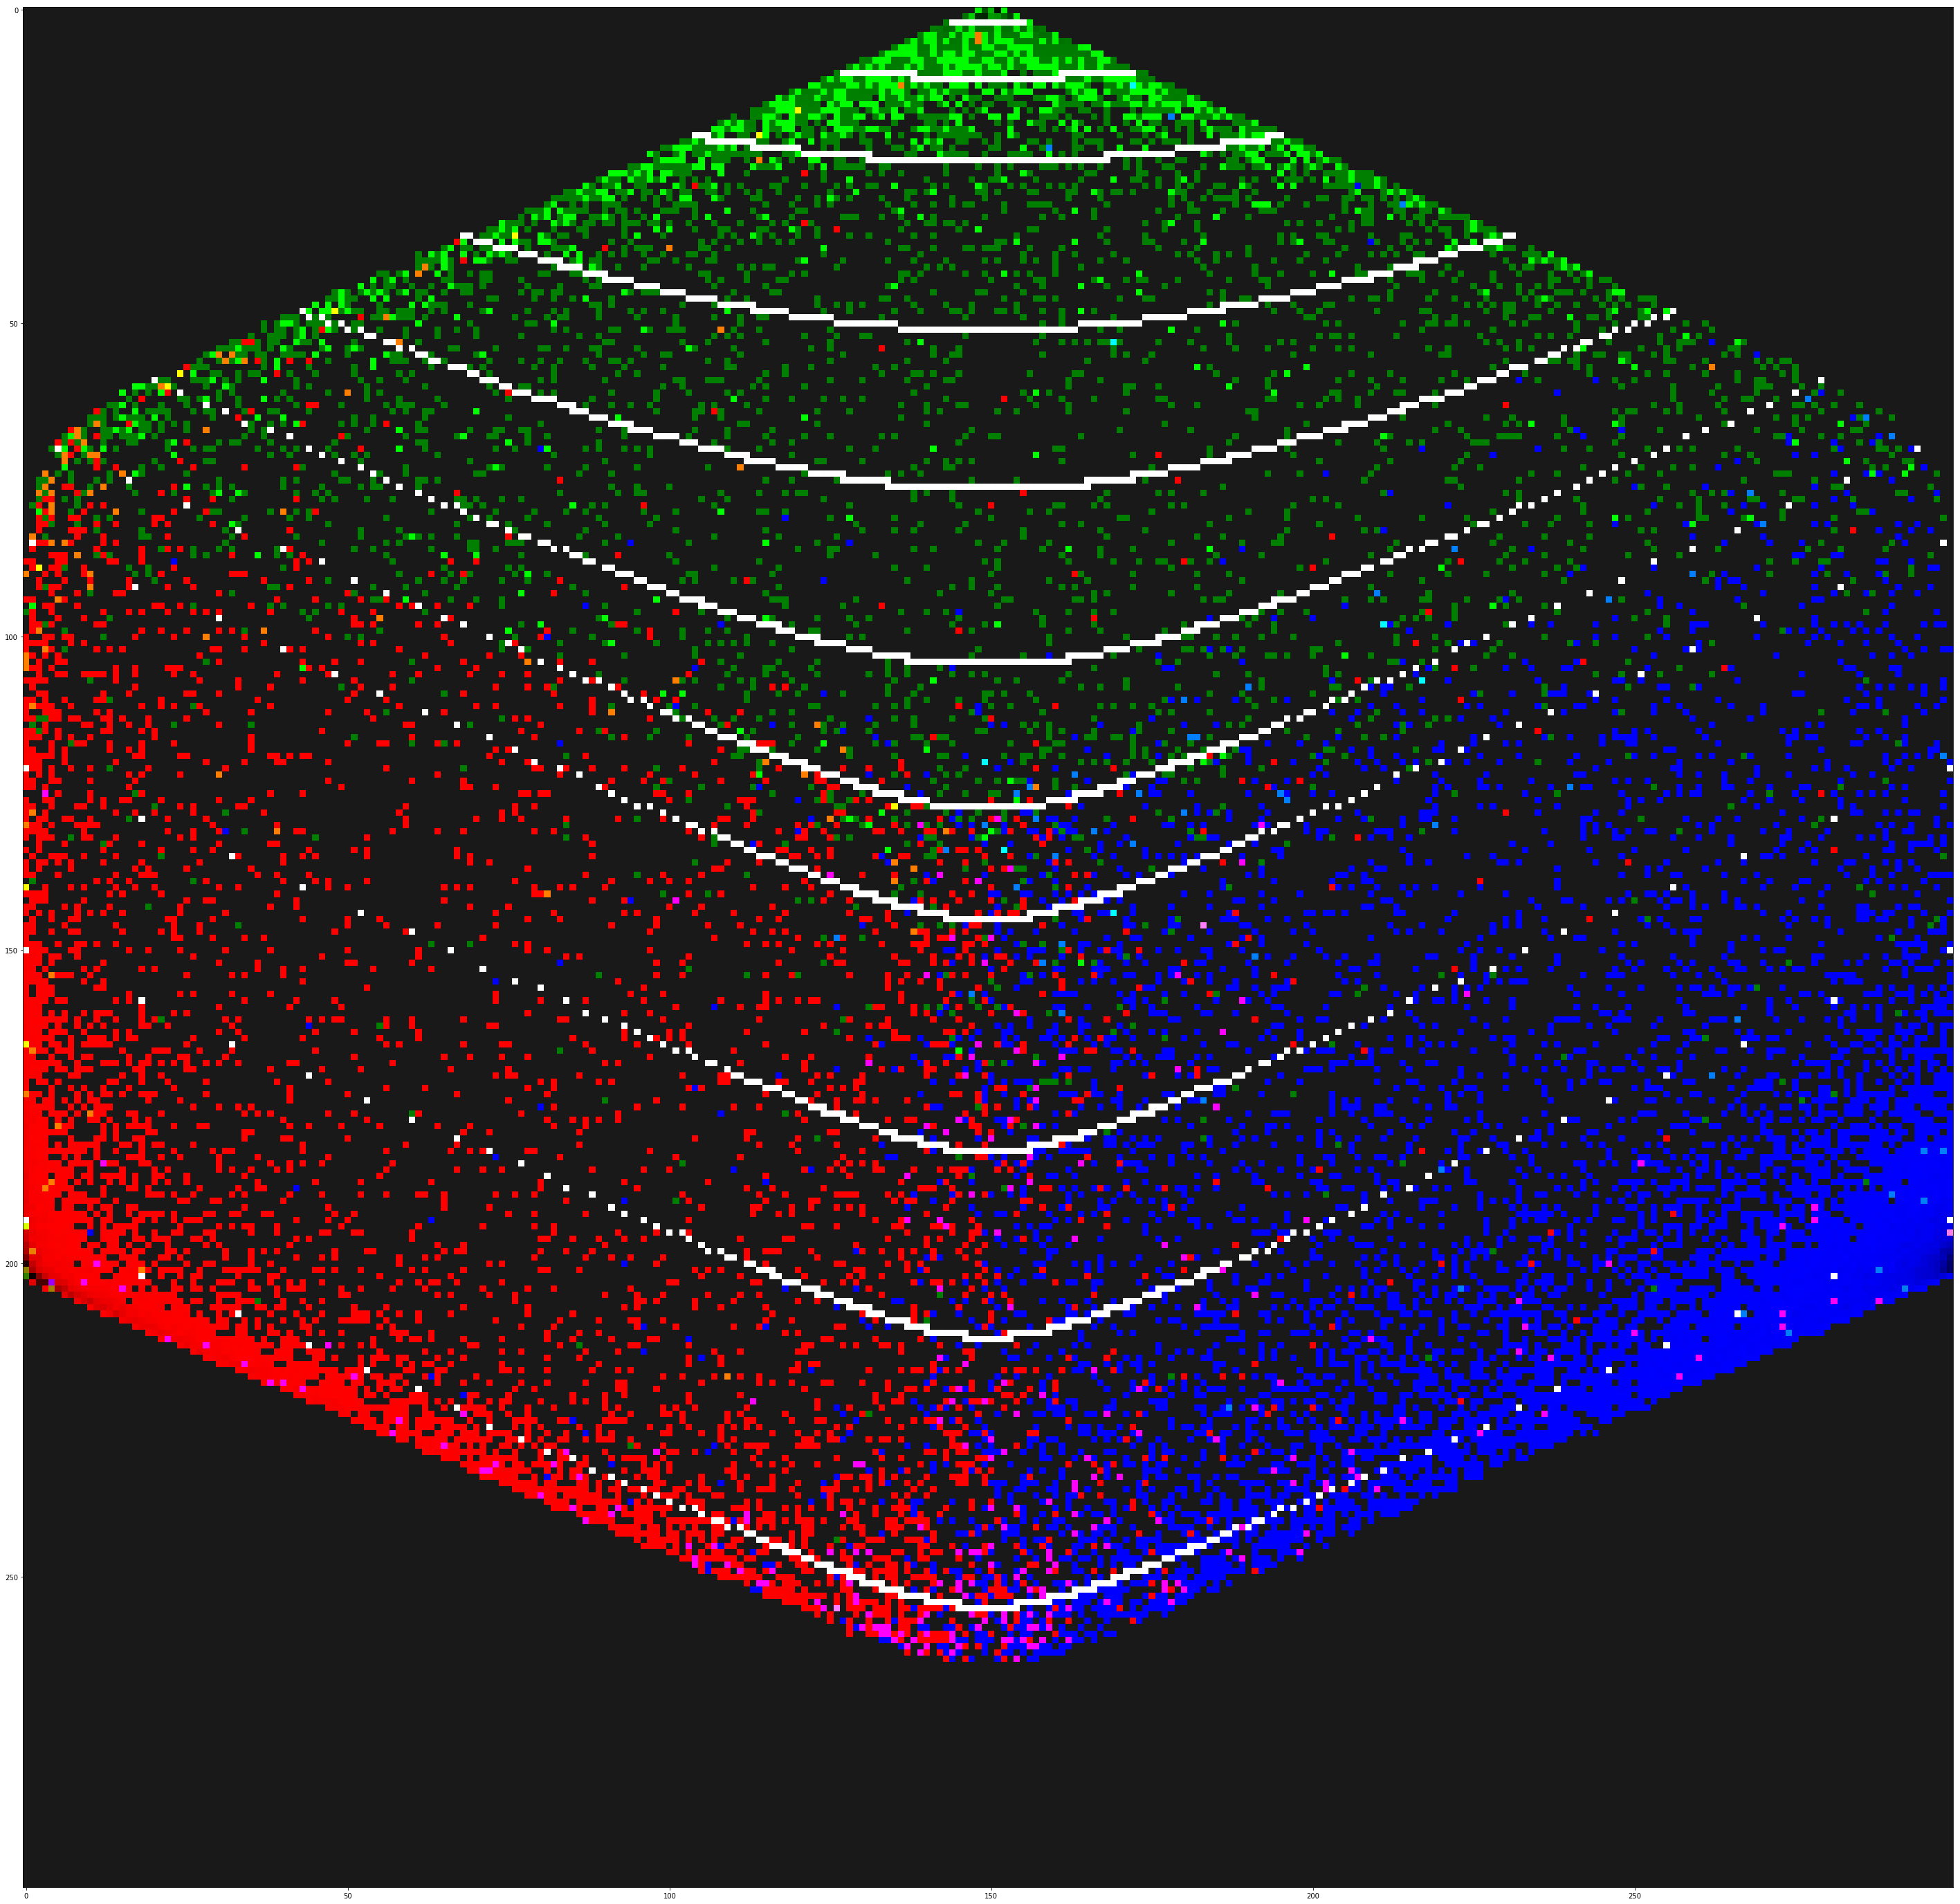

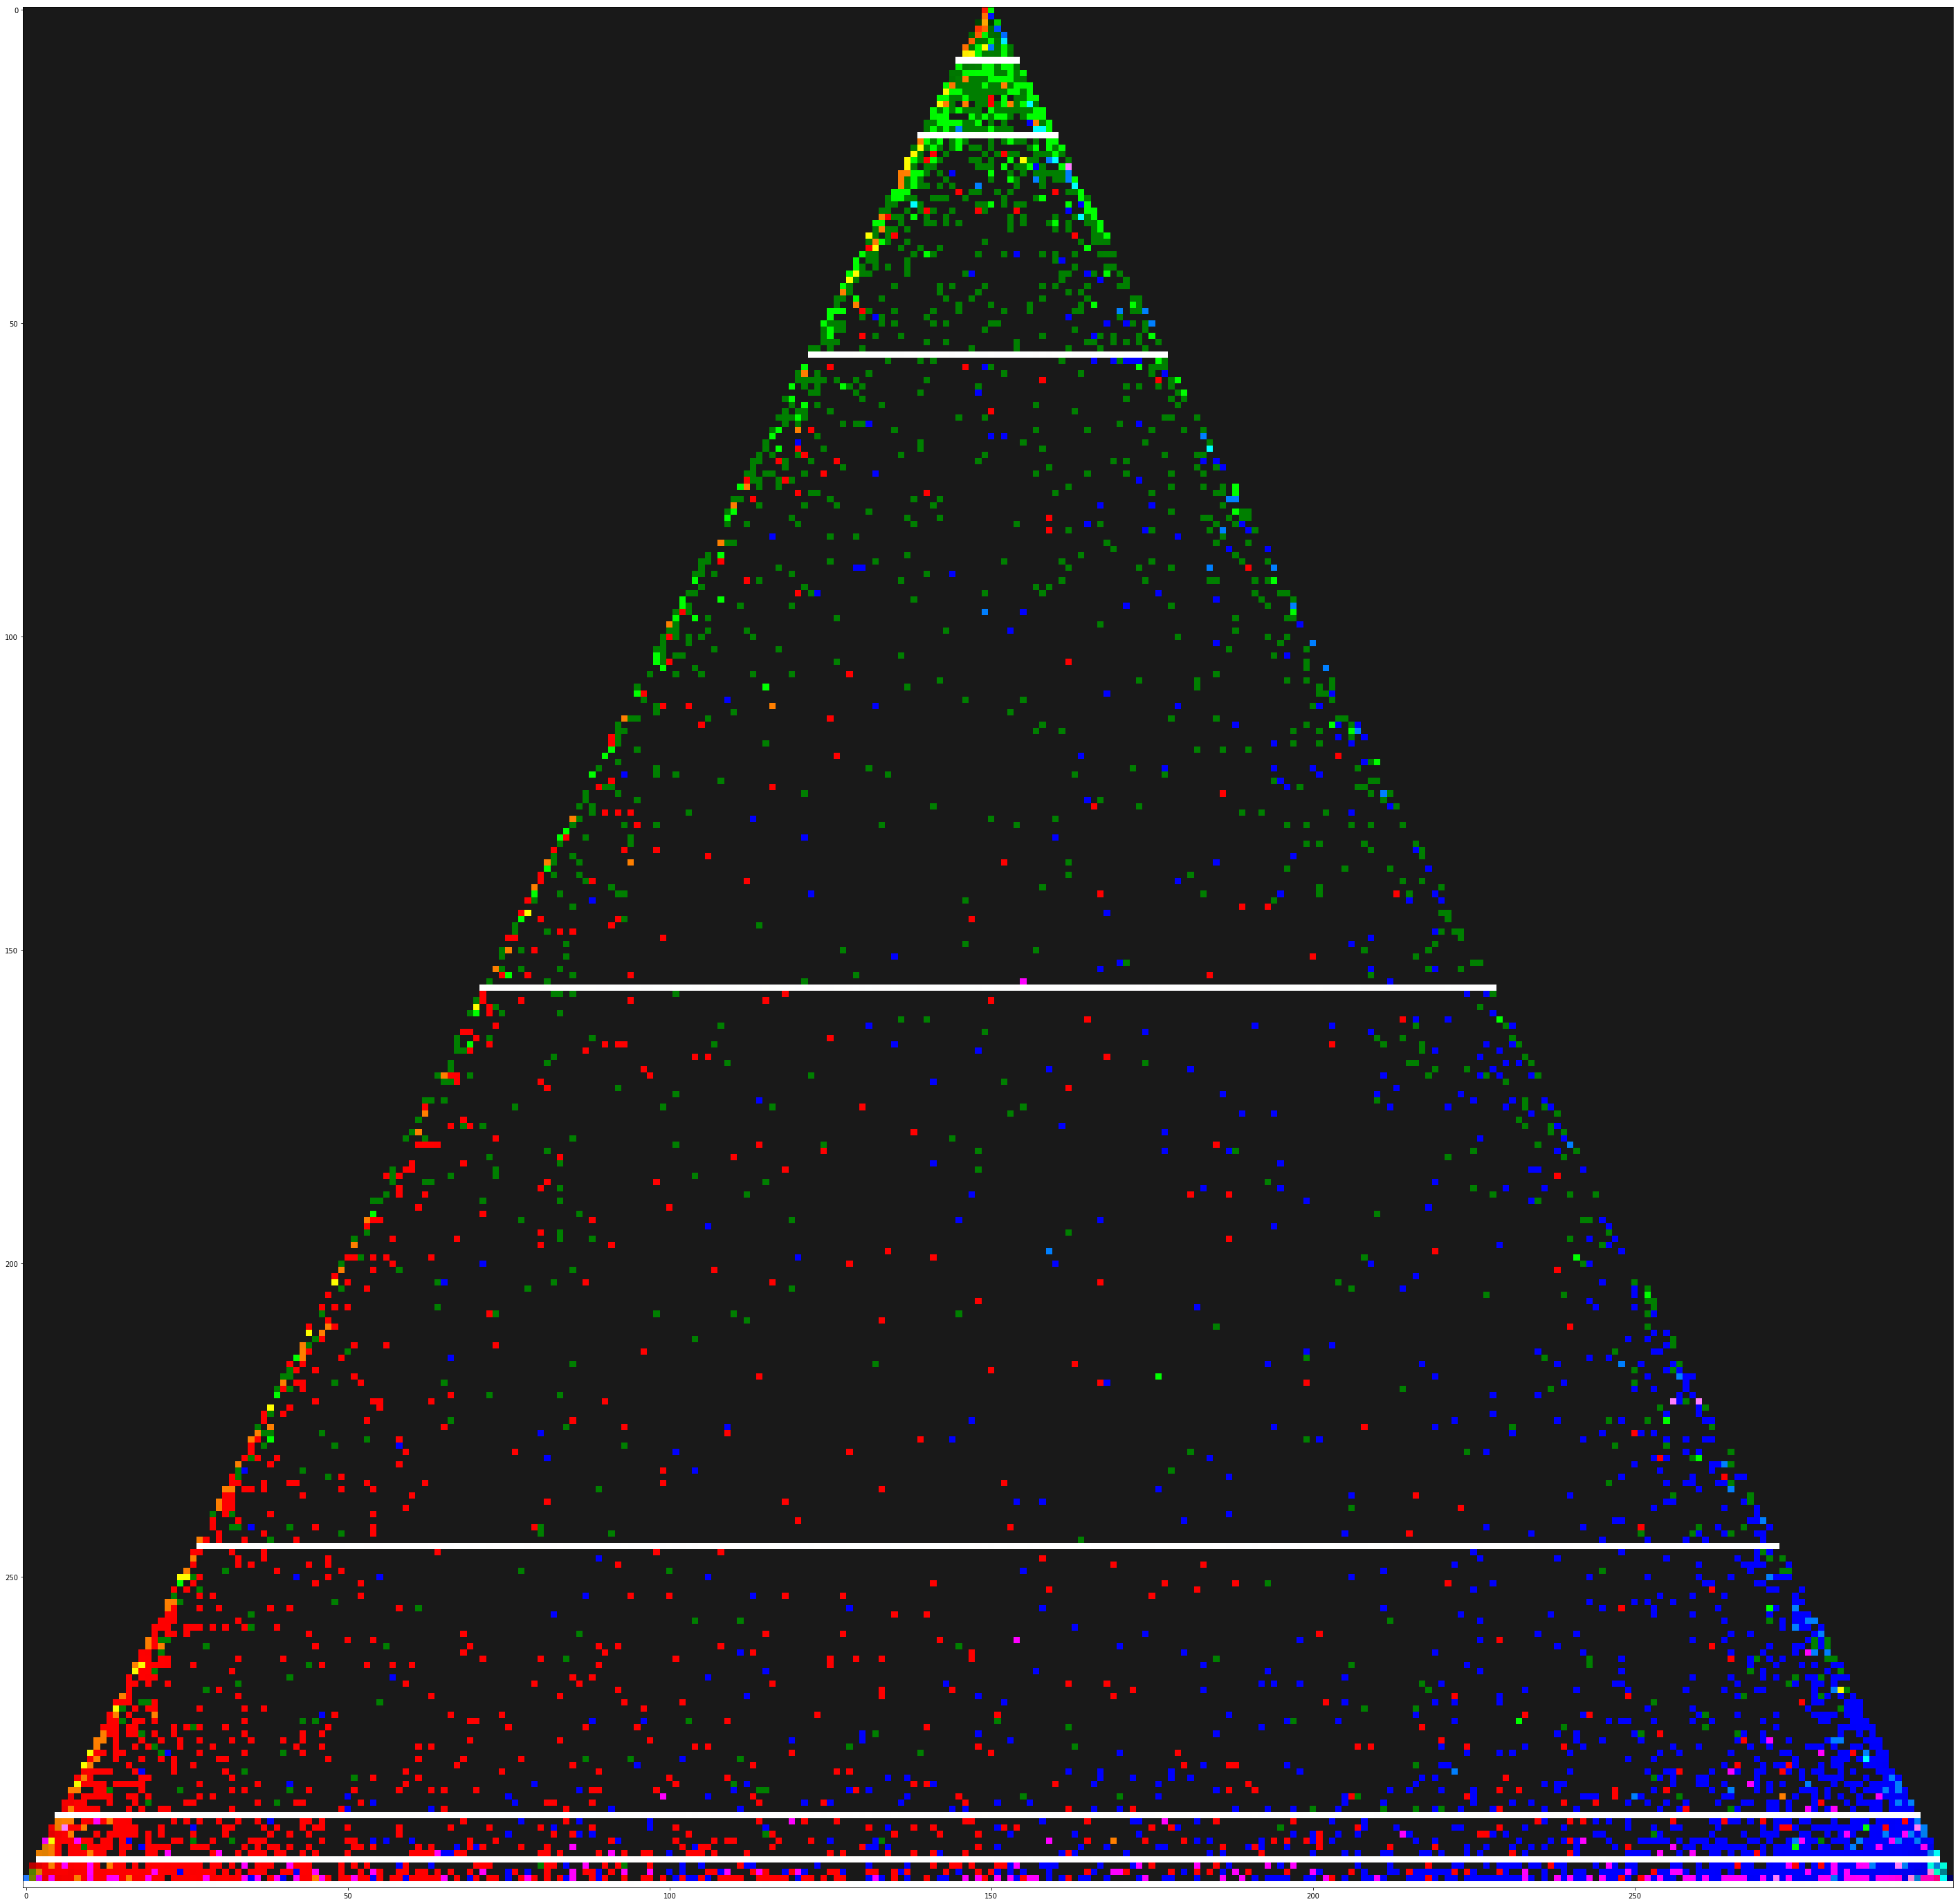

In [148]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 50, 50

#from CMS_Deep_Learning.postprocessing.plot import plot_fano_plane
plot_fano_plane(pred,y, index_positions=[1,0,2],index_colors={0: 'r', 1: 'g', 2: 'b'},
                bin_res=300, thicken_lines=False,log_scale=True, log_intesity=75,
                thresholds=[(1,0.001580),(1,0.015090),
                            (1,0.038975),(1,0.181986),(1,0.477483),(1,0.815776),(1,0.933160),
                            (1,0.970163),(1,0.989547),(1,0.995816),(1,0.999048)],
                background_color=(.1,.1,.1))
plot_fano_plane(pred,y, index_positions=[1,0,2],index_colors={0: 'r', 1: 'g', 2: 'b'},
                bin_res=300, thicken_lines=False,log_scale=False, log_intesity=75,
                thresholds=[(1,0.001580),(1,0.015090),
                            (1,0.038975),(1,0.181986),(1,0.477483),
                            (1,0.815776),(1,0.933160),(1,0.970163)],
                background_color=(.1,.1,.1))

In [213]:
val_unnorm = ['/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/000.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/001.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/002.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/003.h5',
     '/bigdata/shared/Delphes/np_datasets/3_way/MaxLepDeltaR_des/val/004.h5']
accum = build_accumulator(np.max, "Pt",[{'isChHad': 1}, {'isGamma': 1}, {'isEle':1}])
y,pred,chars = simple_grab(['Y','predictions','characteristics'],
                     input_keys='Particles',
                     label_keys='Labels',
                     data=val_unnorm,
                     model = GRU_trials[0].compile(loadweights=True),
                    accumulate=accum
                     )

In [322]:
class_labels = {0:'QCD',1:r'$t\bar{t}$', 2:"W+jets"}
d0 = get_roc_points(true_class_index=0, tpr=[.95,.99],
                  model=best_trial.compile(loadweights=True),
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                Y=y,
                predictions=pred)
d1 = get_roc_points(true_class_index=1, tpr=[.95,.99],
                  model=best_trial.compile(loadweights=True),
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                Y=y,
                predictions=pred)
d2 = get_roc_points(true_class_index=2, tpr=[.95,.99],
                  model=best_trial.compile(loadweights=True),
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                Y=y,
                predictions=pred)
print(d0['thresh'])
print(d1['thresh'])
print(d2['thresh'])

my_bins0 = bin_metric_vs_char(model=best_trial.compile(loadweights=True),
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                Y=y,
                predictions=pred,
                characteristics=chars,
                accumulate=accum,
                true_class_index=0,
                threshold=0.42221227,
                nb_bins=20)

my_bins1 = bin_metric_vs_char(model=best_trial.compile(loadweights=True),
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                Y=y,
                predictions=pred,
                characteristics=chars,
                accumulate=accum,
                true_class_index=1,
                threshold=0.49657038,
                nb_bins=20)

my_bins2 = bin_metric_vs_char(model=best_trial.compile(loadweights=True),
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                Y=y,
                predictions=pred,
                characteristics=chars,
                accumulate=accum,
                true_class_index=2,
                threshold=0.49240264,
                nb_bins=20)

my_bins099 = bin_metric_vs_char(model=best_trial.compile(loadweights=True),
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                Y=y,
                predictions=pred,
                characteristics=chars,
                accumulate=accum,
                true_class_index=0,
                threshold=0.043948922,
                nb_bins=20)

my_bins199 = bin_metric_vs_char(model=best_trial.compile(loadweights=True),
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                Y=y,
                predictions=pred,
                characteristics=chars,
                accumulate=accum,
                true_class_index=1,
                threshold=0.042341452,
                nb_bins=20)

my_bins299 = bin_metric_vs_char(model=best_trial.compile(loadweights=True),
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                Y=y,
                predictions=pred,
                characteristics=chars,
                accumulate=accum,
                true_class_index=2,
                threshold=0.069933616,
                nb_bins=20)

print(my_bins)

(True, True, True)
(True, True, True)
(True, True, True)
(0.42221227, 0.043948922)
(0.49657038, 0.042341452)
(0.49240264, 0.069933616)
[{'fp': 9, 'acc': 0.92082738944365194, 'tpr_error': 0.026764925443676875, 'norm_confusion': array([[ 0.7826087 ,  0.02173913,  0.19565217],
       [ 0.16334661,  0.77290837,  0.06374502],
       [ 0.03257919,  0.00723982,  0.960181  ]]), 'fpr_error': 0.0025962189839995255, 'confusion': array([[  36,    1,    9],
       [  41,  194,   16],
       [  36,    8, 1061]]), 'norm_cont_split': {0: 0.021739130434782608, 2: 0.007239819004524887}, 'num_samples': 1402, 'tp': 192, 'tn': 1142, 'norm_cont_split_error': {0: 0.021501537175949575, 2: 0.0025503799779545951}, 'acc_error': 0.0072111177979486806, 'cont_split': {0: 1.0, 2: 8.0}, 'tpr': 0.7649402390438247, 'min_bin_x': 4.2575044631958008, 'fpr': 0.007819287576020852, 'freq': {0: 46, 1: 251, 2: 1105}, 'max_bin_x': 20.442203006744386, 'fn': 59, 'ppv': 0.9552238805970149}, {'fp': 138, 'acc': 0.94483612292126362, 

In [302]:

def _expand_multi_vals(ys, binlabel, class_labels, normalize=False):
    out = {}
    if (True in [isinstance(y, dict) for y in ys]):
        key_set = list(set.union(*[set(d.keys()) for d in ys if isinstance(d, dict)]))
        ys = [d if isinstance(d, dict) else {k: 0.0 for k in key_set} for d in ys]

        prefix = binlabel + "_" if binlabel != "" else ""
        totals = [sum(y.values()) for y in ys]

        for k in key_set:
            class_label = class_labels[k] if class_labels != None else "class_" + str(k)
            y = [d[k] for d in ys]
            if (normalize): y = [float(v) / t for v, t in zip(y, totals)]
            out[prefix + class_label] = y
    else:
        out[binlabel] = ys
    return out

def plot_bins(bins,
              y_val="acc",
              min_samples=10,
              mode="bar",
              title='',
              xlabel='',
              ylabel='',
              class_labels=None,
              legendTitle=None,
              legendBelow=False,
              alpha=.8,
              colors=['b', 'g', 'r'],
              shapes=None,
              xlim=None,
              ylim=(0, 1.025),
              useGrid=True,
              log=False,
              stack=False,
              normalize=False,
              ax=None,
              show=True):
    ''' Plots the output of CMS_Deep_Learning.utils.metrics.accVsEventChar

        :param bins: A list of dictionaries outputted by CMS_Deep_Learning.postprocessing.metrics.bin_metric_vs_char
                    or a dictionary of such lists keyed by a label for each binset.
        :param min_samples: The minumum number of samples that must be in a bin for it to be plotted.
        :param y_val: The y_value to plot 
        :param mode: "bar","scatter" or 'histo'
        :param title: The title of the plot
        :param xlabel: The xlabel of the plot
        :param ylabel: the ylabel of the plot
        :param class_labels: A list of labels to be shown in the legend. One for each set of bins.
        :param legendTitle: The title of the legend.
        :param legendBelow: Whether or not to put the legend below the graph
        :param alpha: The opacity of the plot.
        :param colors: the colors for each set of bins (see how matplotlib handles colors)
        :param shapes: the shapes of the markers for the graph
        :param xlim: a tuple (minX, maxX) that determines he x range of the view of the graph
        :param ylim: a tuple (minY, maxY) that determines he y range of the view of the graph 
        :param useGrid: if True then display a grid in the background of the graph
        :param args: An alternative input method for multiple ROC curves. List of dictionaries of arguments for 
                    each curve.
        :param true_class_index: The index of the element of the predictions/labels that refers to the positive class
        :param title: The title of the plot
        :param color_set: A list of colors to use for each ROC.
        :param show: Whether or not to show the plot, can be useful if one only wants the parameterization data


        :returns: plt: the matplotlib handle, roc_dict:a list of dictionaries with ROC_data (tpr,fpr,thres,auc)
        '''
    
    
    from matplotlib import pyplot as plt
    if (not isinstance(bins, dict)):
        bins = {"": bins}
    if (shapes == None):
        shapes = ['o', 's', 'v', 'D', '^', '*', '<', '>']
    if (not isinstance(colors, list)):
        colors = [colors]
    if not isinstance(ax, type(None)):
        ax = ax
    else:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111)
        if (useGrid):
            if (mode == "bar"):
                ax.yaxis.grid(True, which='major')
            else:
                ax.grid(True)
            ax.set_axisbelow(True)
    

    for i, (binlabel, bs) in enumerate(bins.items()):
        color = colors[i % len(colors)]
        label = binlabel  # binLabels[i] if binLabels != None and len(binLabels) > i else None
        xs = [b["min_bin_x"] for b in bs if (b["num_samples"] >= min_samples)]
        bot = np.array([0.0] * len(xs))
        widths = [b["max_bin_x"] - b["min_bin_x"] for b in bs if (b["num_samples"] >= min_samples)]

        ys = [b[y_val] for b in bs if (b["num_samples"] >= min_samples)]
        errors = None if not (y_val + "_error") in bs[0] \
            else [b[y_val + "_error"] for b in bs if (b["num_samples"] >= min_samples)]
        ys = _expand_multi_vals(ys, binlabel, class_labels, normalize)
        if errors != None:
            errors = _expand_multi_vals(errors,binlabel,class_labels)
        items = ys.items()
        if (mode == 'bar' or mode == 'histo'): items = sorted(items, key=lambda x: -np.average(x[1]))
        for j, (label, y) in enumerate(items):
            if (mode == "bar"):
                ax.bar(xs, y, width=widths, yerr=errors, color=colors[j % len(colors)], label=label, ecolor='k',
                       alpha=alpha, log=log)
            elif (mode == "histo"):
                if (stack):
                    ax.bar(xs, y, width=widths, yerr=errors, bottom=bot, color=colors[j % len(colors)], label=label,
                           ecolor='k', alpha=alpha, log=log, edgecolor="none", lw=0)
                else:
                    # Append points to beginning and end
                    _xs = [b["max_bin_x"] for b in bs if (b["num_samples"] >= min_samples)]
                    _xs = [bs[0]['min_bin_x']] + _xs + [_xs[-1]]
                    y = [0] + list(y) + [0]

                    ax.plot(_xs, y, ls='steps', color=colors[j % len(colors)], label=label, alpha=alpha)
                    if (log): ax.set_yscale("log")
                if (stack): bot += y
            else:
                s = shapes[i % len(colors)]
                ax.plot(xs, y, color=colors[j % len(colors)], label=label, marker=s, linestyle='None')
                e = errors[label] if errors != None else None
                ax.errorbar(xs, y, yerr=e, color=colors[j % len(colors)], ecolor=colors[j % len(colors)],
                            alpha=alpha, fmt='',
                            linestyle='None')
                if (log): ax.set_yscale("log")
    
    ax.set_title(title, size=22)
    ax.set_xlabel(xlabel, size=18)
    ax.set_ylabel(ylabel, size=18)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        #label.set_fontproperties(font_prop)
        label.set_fontsize(15) # Size here overrides font_prop

    if (legendBelow):
        legend = ax.legend(title=legendTitle, fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15),
                           fancybox=True, ncol=2)
    else:
        legend = ax.legend(title=legendTitle, fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

    if (legendTitle != None): plt.setp(legend.get_title(), fontsize=14)

    plt.ylim(ylim)
    plt.xlim(xlim)

    if (show): plt.show()
    return ax

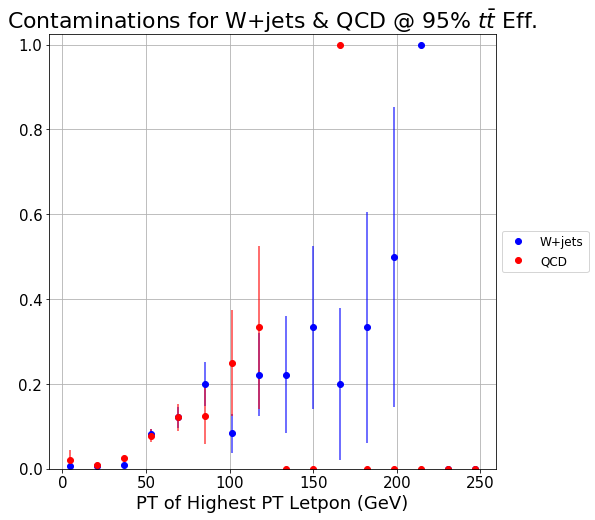

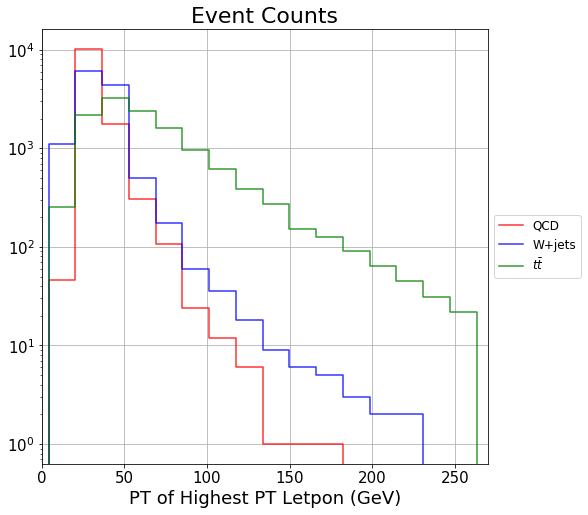

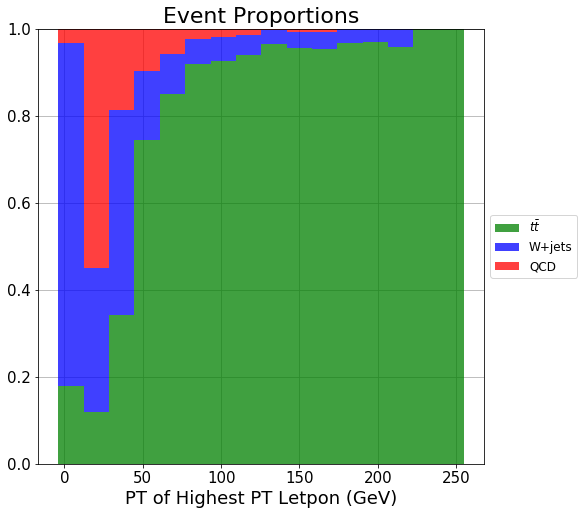

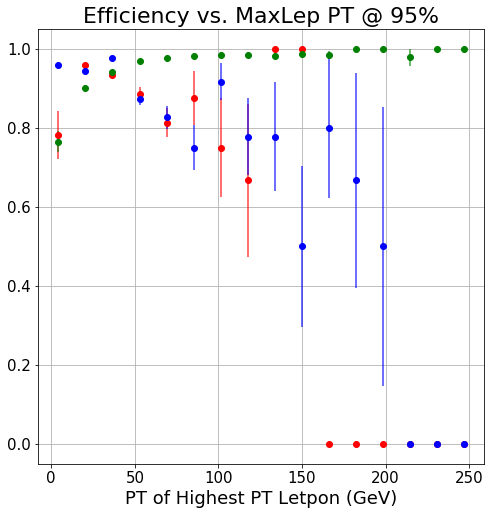

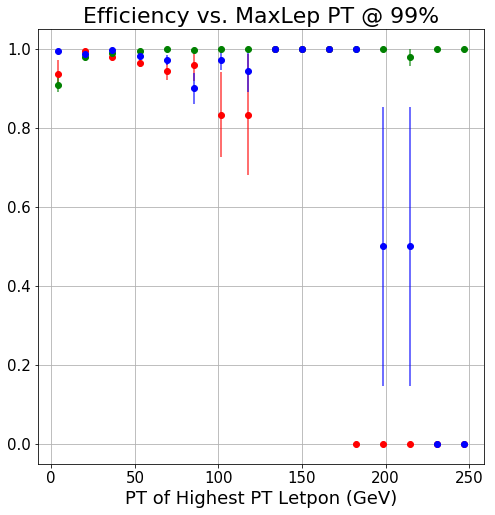

In [323]:

plot_bins(my_bins, y_val="norm_cont_split",
          mode='scatter',
          colors = ['b','r','g'],
          #ylim=(-.1,1.1),
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title=r'Contaminations for W+jets & QCD @ 95% $t\bar{t}$ Eff.',
          min_samples=20,
          #nb_bins=20,
          alpha=.75)
plot_bins(my_bins,
          y_val="freq",
          mode='histo',
          colors = ['r','b','g'],
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Event Counts",
          log=True,
          min_samples=20,
          #nb_bins=100,
          xlim=(0,270)
         )
plot_bins(my_bins, y_val="freq",
          mode='histo',
          colors = ['g','b','r'],
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Event Proportions",
          stack=True,
          normalize=True,
          min_samples=20,
          #nb_bins=100,
          alpha=.75)
#------------------95%-----------------------

ax = plot_bins(my_bins0, y_val="tpr",
          mode='scatter',
          colors = ['r'],
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Efficiency vs. MaxLep PT @ 95%",
          log=False,
          min_samples=20,
          #nb_bins=100,
          alpha=.75,show=False)

ax = plot_bins(my_bins1, y_val="tpr",
          mode='scatter',
          colors = ['g'],
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Efficiency vs. MaxLep PT @ 95%",
          log=False,
          ax =ax,
          min_samples=20,
          #nb_bins=100,
          alpha=.75,show=False)
plot_bins(my_bins2, y_val="tpr",
          mode='scatter',
          colors = ['b'],
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Efficiency vs. MaxLep PT @ 95%",
          ax =ax,
          min_samples=20,
          #nb_bins=100,
          alpha=.75)
#------------------99%-----------------------
ax = plot_bins(my_bins099, y_val="tpr",
          mode='scatter',
          colors = ['r'],
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Efficiency vs. MaxLep PT @ 99%",
          log=False,
          min_samples=20,
          #nb_bins=100,
          alpha=.75,show=False)

ax = plot_bins(my_bins199, y_val="tpr",
          mode='scatter',
          colors = ['g'],
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Efficiency vs. MaxLep PT @ 99%",
          log=False,
          ax =ax,
          min_samples=20,
          #nb_bins=100,
          alpha=.75,show=False)
plot_bins(my_bins299, y_val="tpr",
          mode='scatter',
          colors = ['b'],
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Efficiency vs. MaxLep PT @ 99%",
          ax =ax,
          min_samples=20,
          #nb_bins=100,
          alpha=.75)


In [324]:
d = {'QCD': [b['tpr'] for b in my_bins0],
    'ttbar' : [b['tpr'] for b in my_bins1],
    'wjet': [b['tpr'] for b in my_bins2],
    'min_pt' : [b['min_bin_x'] for b in my_bins2]}
print([b['tpr'] for b in my_bins0])
print([b['tpr'] for b in my_bins1])
print([b['tpr'] for b in my_bins2])
print([b['min_bin_x'] for b in my_bins2])
print(100*pd.DataFrame(d))

d = {'QCD': [b['tpr'] for b in my_bins099],
    'ttbar' : [b['tpr'] for b in my_bins199],
    'wjet': [b['tpr'] for b in my_bins299],
    'min_pt' : [b['min_bin_x'] for b in my_bins299]}
print([b['tpr'] for b in my_bins099])
print([b['tpr'] for b in my_bins199])
print([b['tpr'] for b in my_bins299])
print([b['min_bin_x'] for b in my_bins299])
print(100*pd.DataFrame(d))

[0.782608695652174, 0.9578895945285784, 0.9323479249573622, 0.8859934853420195, 0.8130841121495327, 0.875, 0.75, 0.6666666666666666, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.7649402390438247, 0.9018181818181819, 0.9408118995971491, 0.967946014339941, 0.9754871150219987, 0.9814241486068112, 0.9852459016393442, 0.9843342036553525, 0.9816849816849816, 0.9868421052631579, 0.984251968503937, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.9592760180995475, 0.9435405141555483, 0.975819209039548, 0.873015873015873, 0.8265895953757225, 0.75, 0.9166666666666666, 0.7777777777777778, 0.7777777777777778, 0.5, 0.8, 0.6666666666666666, 0.5, 0.0, 0.0, 0.0

In [268]:
def assertOneToOne(trials, metricX, metricY=None, mode="max", ignoreIncomplete=True, verbose_errors=0):
    ''' Asserts that a set of trials have a one-to-one relationship on metricX. In other words that the trials in 'trials' can
        be uniquely identified by the value in their record keyed by 'metricX'. So if metricX='depth' this function asserts that
        no two trials in the input 'trials' list have the same depth value in their record. In the event of a conflict, the argument
        'mode' determines how to proceed.

        :param trials: a list of trials to be checked for a one-to-one relationship
        :param metricX: the metric (record key) whose value must uniquely idetify each trial
        :param metricY: In the event of a conflict when mode = "max" or "min", which metric to use to pick among the conflicting trials.
        :param mode: How to assert a one-to-one relationship between the trials. Either "max" or "min" which simply take the trial
                    with the maximum or minimum 'metricY' value among conflicting trials. Alternately "error" throws an error if a one-to-one
                    relationship cannot be resolved, showing the user the set of conflicting trials.
        :param ignoreIncomplete: Whether or not to ignore trials which did not finish training.
        :param verbose_errors: Whether or not to output long trial summaries if a conflict is found and mode = 'error'

        :returns: a list of trials
    '''
    trials = copy.copy(trials)
    if (trials == None or (not hasattr(trials, '__iter__'))):
        raise TypeError("trials must be iterable, but got %r" % type(trials))
    if (not mode in ["error"]):
        if (mode in ["max", "min"]):
            if (metricY == None):
                raise ValueError("metricY must be defined if mode = %r" % mode)
        else:
            raise ValueError("mode %r not recognized. Please choose 'error', 'max' or 'min'.")

    d = {}
    if (ignoreIncomplete): trials = [t for t in trials if t.is_complete()]
    for trial in trials:
        x = trial.get_from_record(metricX)
        if (isinstance(x, list)): x = tuple(x)
        lst = d.get(x, [])
        lst.append(trial)
        d[x] = lst
    for x, lst in d.iteritems():
        if (len(lst) > 1):
            if (mode == "error"):
                print(" \n\n ONE-TO-ONE ERROR! \n %r Trials with %r = %r" % (len(lst), metricX, x))
                for trial in lst:
                    if (not verbose_errors):
                        print(trial.summary(showTraining=False, showValidation=False, showFit=False, showCompilation=False))
                    else:
                        print(trial.summary(showTraining=True, showValidation=True, showFit=True, showCompilation=True))
                raise AssertionError(
                    "Supplied trials cannot have one-to-one relationship on metricX = %r. See the printout above for more information. " % metricX)
            else:
                if (mode == "max" or mode == "min"):
                    reverse = False
                    if (mode == "max"): reverse = True
                    lst.sort(key=lambda x: x.get_from_record(metricY), reverse=reverse)
                    # Remove the tail trials from the big trial list
                    for t in lst[1:]: trials.remove(t)
                else:
                    raise NotImplementedError("need to write this")
    return trials
def plotMetricVsMetric(trials,metricX,metricY="val_acc",assert1_1=False,groupOn=None,constants={}, xlabel=None, ylabel=None, label="Trials", legend_label="", colors=None, shapes=None, alpha=.7, mode="max", verbose=0, verbose_errors=0, show=True):
    ''' Plots one metric that can be found in the records of a set of KerasTrials vs another (i.e. val_acc vs depth). 
        Asserts a one to one relationship incase of duplicate entries.
        
        :param trials: A list of trials to be used for the plot. This list will be culled down by specifying constants={"record" : value, ...}.
        :param metricX: The record entry to be used for the x-axis of the plot
        :param metricY: The record entry to be used for the y-axis of the plot
        :param groupOn: The record entry to group the data on to add a second explanitory variable
        :param constants: A dictionary of record values (i.e {"depth" : 2, ...}) that should be kept constant in the plot. For example 
                    if you only wanted to plot trials with a dropout of 0.0 you would do constants = {"dropout" : 0.0}.
                    Ideally you want to keep record values that are not being compared constant, to maintain a one-to-one relationship.
                    To be certain of this one-to-one relationship set mode="error".
        :param xlabel: The X label of the plot
        :param ylabel: The Y label of the plot
        :param label: How to label objects in the legend if groupOn=None
        :param legend_label: The title for the lengend
        :param colors: A list of colors to use to represent each group, defaults to CMS_Deep_Learning.utils.colors.colors_contrasting
        :param shapes: list of marker shapes to use in the graph, defualts to ['o','s','v', 'D', '^','*', '<', '>']
        :param alpha: The alpha value (opacity) for each point in the plot
        :param mode: How to assert a one-to-one relationship between the trials in each group. Either "max" or "min" which simply take the trial
                with the maximum or minimum 'metricY' value among conflicting trials. Alternately "error" throws an error if a one-to-one
                relationship cannot be resolved. The user can then edit the 'constants' argument to satisfy this relationship. 
                See CMS_Deep_Learning.analysistools.assertOneToOne for more information
        :param verbose: Whether or not to output extra information about the internals of the function for debugging.
        :param verbose_errors: Whether or not to print out longer summaries for conflicting trials if mode = "error".
            '''

    fig=plt.figure()
    ax1=fig.add_subplot(111)
    if(colors == None):
        from CMS_Deep_Learning.postprocessing.colors import colors_contrasting1
        colors = colors_contrasting1
    if(shapes == None):
        shapes = ['o','s','v', 'D', '^','*', '<', '>']
    trials_by_group = {}
    if(groupOn != None):
        possibleValues = getMetricValues(trials,groupOn)
        #print(possibleValues)
        for v in possibleValues:
            trials_by_group[v] = findWithMetrics(trials, {groupOn:v})
    else:
        trials_by_group = {label:[t for t in trials if t.get_from_record(metricX) != None]}
    if(verbose == 1): print("POINTS:")
    for i,(group,group_trials) in enumerate(sorted(trials_by_group.iteritems())):
        group_trials = findWithMetrics(group_trials, constants)
        if(assert1_1):
            group_trials = assertOneToOne(group_trials, metricX,metricY=metricY, mode=mode, verbose_errors=verbose_errors)
        Xs = [ trial.get_from_record(metricX) for trial in group_trials]
        Ys = [trial.get_from_record(metricY) for trial in group_trials]
        print(Xs,Ys)
        errors = None
        if(mode == 'spread'):
            l = []
            for xs in sorted(list(set(Xs))):
                ys = [y for x,y in zip(Xs,Ys) if x == xs]
                print(xs,ys)
                avg, std = np.average(ys), np.std(ys)
                l.append((xs,avg,std))
            Xs,Ys,errors = zip(*l)
            
        print(Xs,Ys,errors)
            
        #Sort lists together
        Xs, Ys = [list(x) for x in zip(*sorted(zip(Xs, Ys), key=lambda p: p[0]))]
        if(verbose == 1): print("%s: %r" % (group,zip(Xs, Ys)))
        
        rects1 = plt.scatter(Xs, Ys,marker=shapes[i % len(shapes)],
                         alpha =alpha,s=50, edgecolors=colors[(i +1) % len(colors)],
                         color=colors[i % len(colors)] ,label=group)
        if(errors != None):
            plt.errorbar(Xs, Ys,errors,linestyle='None',
                         color=colors[i % len(colors)] ,label=group)
        # plt.xticks(Xs)
    if(xlabel == None): xlabel = metricX
    if(ylabel == None): ylabel = metricY
    
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title('%s vs %s' %(metricY, metricX), fontsize=18)
    legend = ax1.legend(title=legend_label, fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()
    plt.setp(legend.get_title(),fontsize=14)
    #plt.tight_layout()
    if (show):plt.show()
    return plt



ValueError: union_keys ['Labels', 'Particles'] do not match data size of 1

([150, 50, 100, 50, 200, 250, 250, 20, 20, 250, 20, 50, 200, 200, 150, 150, 100, 100], [0.9477333356539408, 0.9509866687456767, 0.9477866683006286, 0.9467466694513956, 0.944853334903717, 0.9458666685422261, 0.9449066692988077, 0.94464000193278, 0.9446133343378703, 0.9442133348782857, 0.9477866689364115, 0.9436266700426738, 0.9453066706657409, 0.9435466680526733, 0.9446133354504903, 0.9469600032170613, 0.9481333335240681, 0.9458133358955383])
(20, [0.94464000193278, 0.9446133343378703, 0.9477866689364115])
(50, [0.9509866687456767, 0.9467466694513956, 0.9436266700426738])
(100, [0.9477866683006286, 0.9481333335240681, 0.9458133358955383])
(150, [0.9477333356539408, 0.9446133354504903, 0.9469600032170613])
(200, [0.944853334903717, 0.9453066706657409, 0.9435466680526733])
(250, [0.9458666685422261, 0.9449066692988077, 0.9442133348782857])
((20, 50, 100, 150, 200, 250), (0.94568000173568734, 0.94712000274658203, 0.94724444590674495, 0.94643555810716418, 0.94456889120737708, 0.944995557573

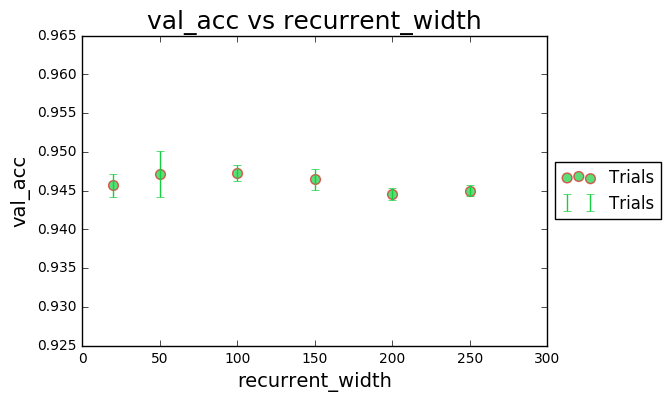

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [59]:
plotMetricVsMetric(trials,"recurrent_width",mode='spread')

In [7]:
h = inputHandler(['Y', 'predictions'])
Y, predictions = h(trial=trial)

NameError: name 'inputHandler' is not defined

In [34]:
import pandas as pd
print(Y[0][:10])

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


In [43]:
pd.DataFrame({"A":[1,2], "B":[2,3]})
print(d)

[{'thresh': [0.650114, 0.36069226, 0.038767841], 'tpr': [0.90015999999999996, 0.95008000000000004, 0.98999999999999999], 'fpr': [0.017760000000000001, 0.035839999999999997, 0.12844]}]


In [48]:
d = get_roc_points(trial=trial, true_class_index=1, tpr=[.9,.95,.975,.99])
pd.DataFrame(d[0], columns=['tpr','fpr','thresh'])

tpr      fpr    thresh
0  0.89992  0.00792  0.846294
1  0.94984  0.01996  0.572576
2  0.97504  0.04340  0.252662
3  0.99000  0.10516  0.061077

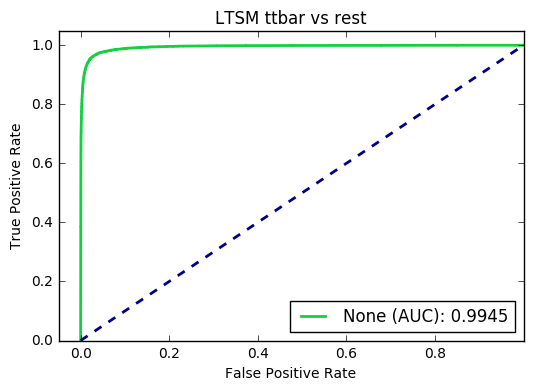

(<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>,
 [{'ROC_data': (array([ 0.    ,  0.    ,  0.    , ...,  0.8482,  0.8482,  1.    ]),
    array([  8.00000000e-05,   1.20000000e-03,   1.36000000e-03, ...,
             9.99920000e-01,   1.00000000e+00,   1.00000000e+00]),
    array([  9.99635696e-01,   9.99602973e-01,   9.99602377e-01, ...,
             3.35246499e-04,   3.35225661e-04,   3.86933243e-06], dtype=float32),
    0.99448737760000006),
   'name': None}])

In [38]:
plot_roc_curve(trial=trial, true_class_index=1, title="LTSM ttbar vs rest")

In [49]:
d = get_roc_points(trial=trial, true_class_index=0, tpr=[.9,.95,.975,.99])
pd.DataFrame(d[0], columns=['tpr','fpr','thresh'])

tpr      fpr    thresh
0  0.90000  0.01840  0.684542
1  0.95000  0.04584  0.352735
2  0.97496  0.09228  0.144718
3  0.99000  0.20104  0.037676

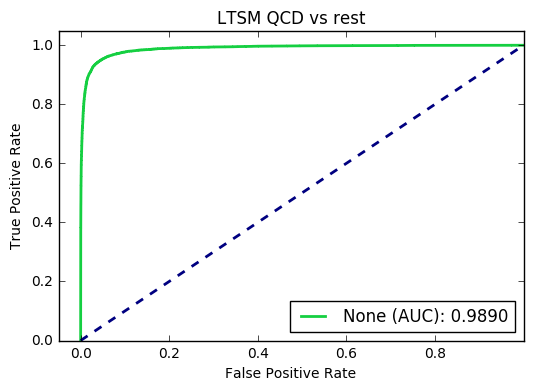

(<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>,
 [{'ROC_data': (array([ 0.     ,  0.     ,  0.     , ...,  0.97192,  0.97192,  1.     ]),
    array([  8.00000000e-05,   3.68000000e-03,   3.84000000e-03, ...,
             9.99920000e-01,   1.00000000e+00,   1.00000000e+00]),
    array([  9.99977231e-01,   9.99879599e-01,   9.99879360e-01, ...,
             2.12052008e-04,   2.11983279e-04,   1.23150594e-05], dtype=float32),
    0.98900938080000012),
   'name': None}])

In [40]:
plot_roc_curve(trial=trial, true_class_index=0, title="LTSM QCD vs rest")

In [50]:
d = get_roc_points(trial=trial, true_class_index=2, tpr=[.9,.95,.975,.99])
pd.DataFrame(d[0], columns=['tpr','fpr','thresh'])

tpr      fpr    thresh
0  0.90016  0.01776  0.650114
1  0.95008  0.03584  0.360692
2  0.97496  0.06404  0.151375
3  0.99000  0.12844  0.038768

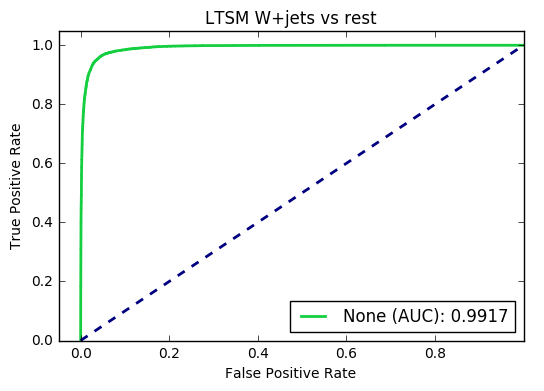

(<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>,
 [{'ROC_data': (array([ 0.     ,  0.     ,  0.     , ...,  0.79904,  0.79912,  1.     ]),
    array([  8.00000000e-05,   6.24000000e-03,   6.40000000e-03, ...,
             1.00000000e+00,   1.00000000e+00,   1.00000000e+00]),
    array([  9.99548376e-01,   9.98609304e-01,   9.98607337e-01, ...,
             3.16925230e-04,   3.16905382e-04,   3.40433280e-06], dtype=float32),
    0.99167653760000007),
   'name': None}])

In [42]:
plot_roc_curve(trial=trial, true_class_index=2, title="LTSM W+jets vs rest")

In [14]:
archive_dir = "/bigdata/shared/Delphes/keras_archive_4_1/"
trials = get_trials_by_name(archive_dir,"LSTM")
#for t in trials:
    #print(t.summary())
#getMetricValues(trials,{})
class_labels = {0:'QCD',1:r'$t\bar{t}$', 2:"W+jets"}
trial = KerasTrial.find(archive_dir,'024f02b24c370ee06a4af671fa590fbe816b97ac')
accum = build_accumilator(np.max, "PT_ET",[{"ObjFt1": -1, "ObjFt2": 1,"ObjFt3": 1}, {"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": -1}])
my_bins = bin_metric_vs_char(trial=trial,
                accumilate=accum,true_class_index=1)

print(trial.summary())
plot_bins(my_bins, y_val="norm_cont_split",
          mode='scatter',
          ylim=(-.1,1.1),
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Contamination Rates for W+Jets and QCD",
          min_samples=20,
          alpha=.75)

KeyError: 'data_keys'

In [2]:
print(data)

NameError: name 'data' is not defined

In [5]:
trials = get_trials_by_name(archive_dir,"LSTM")
trials = findWithMetrics(trials, {"labels" : ["qcd", "ttbar", "wjet"]})
orderings =  [("MaxLepDeltaPhi", False) ,("MaxLepDeltaEta", False), ("PT_ET", False), ("PT_ET", True),('MaxLepDeltaR', False), ('MaxLepKt',False), ('MaxLepAntiKt',False), ('shuffle',False)]
trials = [max(findWithMetrics(trials, {"sort_on":sort_on, "sort_ascending":asc}),
              key = lambda x:x.get_from_record("val_acc")) for sort_on, asc in orderings]
#trials = [t for t in trials if t.is_complete()]
for trial in trials:
    s = trial.summary(showTraining=False,showValidation=False, showFit=False, showCompilation=False)
    print(s)
    #print(type(s), "\n")
    
    #print(trial.get_history())
    #vp =  DataProcedure.from_json(archive_dir,trial.val_procedure[0])
    #data = vp.getData()[0]
    #for d in [x[0] for x in data]:
    #    print("Shape:", d.shape)
    #    print(d)
    #d0 = 
    #t = vp.kargs["single_list"] == True
    #trial.to_record({"single_list": t})
    #print(vp.func)
    #print(vp.kargs)
    #print(t)
print("TotalNumber of Trials:", len(trials)) 

#trials = get_trials_by_name("LSTM", archive_dir)
#trials = findWithMetrics(trials, {"single_list" : True})

ValueError: max() arg is an empty sequence

In [3]:
def nameByTrial(t,name=None):
    labels = t.get_from_record("labels")
    sort_on = t.get_from_record("sort_on")
    asc = t.get_from_record("sort_ascending")
    out = '%s-%s-%s' % ("_".join(labels), sort_on, "asc" if asc else "dec")
    if(name != None): out += "_"+name
    return out

def copyJRFormatToArchive(t,name=None,jrFolder="/bigdata/shared/Delphes/CSCS/"):
    folder = nameByTrial(t,name=name)
    print(folder)
    histories = glob.glob(jrFolder + folder.lower() +"_*history.json")
    weights = glob.glob(jrFolder + folder.lower() +"_*result.h5")
    #print(histories[0])
    print(weights)
    #print(folder)
    if(len(histories) == 0 or len(weights) == 0):
        print("NO DATA")
        return
    conhist = concatenateHistories(histories)
    #print(conhist)
    print({key:max(conhist[key]) for key in conhist.keys()})
    #histDicts = [json.loads(h) for h in histories]
    #for h in histDicts:
    #    print(h)
    finalweights = max(weights, key=lambda x: int(filter(str.isdigit, str(x))))
    #print(finalweights)
    #print(conhist)
    print  "/".join([t.get_path(), "history.json"])
    print  "/".join([t.get_path(), "weights.h5"])
    f = open("/".join([t.get_path(), "history.json"]), "w")
    json.dump(conhist, f)
    shutil.copyfile(finalweights, "/".join([t.get_path(), "weights.h5"]))
def concatenateHistories(histories):
    histories = sorted(histories, key=lambda x: int(filter(str.isdigit, str(x))))
    histDicts = []
    for h in histories:
        #print(h)
        f = open(h, "r")
        d = json.load(f)
        f.close()
        histDicts.append(d["history"])
    conHist = {"val_acc":[], "val_loss":[], "acc":[], "loss":[]}

    for h in histDicts:
        for key, l in conHist.items():
            if(key in ["val_acc", "val_loss"]):
                conHist[key] += h["0"][key] 
            elif(key in ["acc", "loss"]):
                l = []
                for K in [k for k in h.keys() if "0_" in k]:
                    l.append(h[K][key])
                conHist[key] += np.average(l,axis=0).tolist()
            
    conHist["stops"] = [int(filter(str.isdigit, str(h))) for h in histories]
    return conHist

In [4]:
from keras.models import model_from_json
from CMS_Deep_Learning.storage.MPIArchiving import MPI_KerasTrial
jr_model_trials = []
for sort_on, asc in [('MaxLepDeltaR', False)]:#'#["qcd_ttbar_wjet-maxlepdeltar-dec"]:
    sorting_trial = findWithMetrics(trials, {"sort_on":sort_on, "sort_ascending":asc})[0]
    vals = sorting_trial.get_val()
    trains = sorting_trial.get_train()
    #print(vals,trains)
                                    
    for jean_roch_model in ['gru','gru-60','bi_lstm', 'cnn', 'dense', 'slstm']:
        model_file = open("/bigdata/shared/Delphes/CSCS/" + jean_roch_model + ".json", 'r')
        #m
        #print(model_file.read())
        #print(model_file.read())
        model_json = model_file.read()
        model = model_from_json(model_json)
        trial = MPI_KerasTrial(archive_dir, name=jean_roch_model, model=model)
        trial.set_validation(val_procedure=vals)
        trial.set_train(train_procedure=trains)
        trial.to_record({'labels':sorting_trial.get_from_record('labels'), "sort_on": sort_on, "sort_ascending":asc})
        trial.set_compilation(loss="categorical_crossentropy", optimizer='adam')
        #trial.to_record()
        #print(trial.__dict__)
        trial.write()
        #print(name)
        print(nameByTrial(trial,jean_roch_model))
        copyJRFormatToArchive(trial,jean_roch_model)
        trial._history_to_record(['val_acc'])
        trial.summary(showCompilation=True)
        jr_model_trials.append(trial)

lstm_eqiv = findWithMetrics(trials, {"labels" : ["qcd", "ttbar", "wjet"], "sort_on":'MaxLepDeltaR', "sort_ascending":False})[0]
lstm_eqiv.summary()
jr_model_trials.append(lstm_eqiv)


qcd_ttbar_wjet-MaxLepDeltaR-dec_gru
qcd_ttbar_wjet-MaxLepDeltaR-dec_gru
[u'/bigdata/shared/Delphes/CSCS/qcd_ttbar_wjet-maxlepdeltar-dec_gru_100epochs_mpi_learn_result.h5', u'/bigdata/shared/Delphes/CSCS/qcd_ttbar_wjet-maxlepdeltar-dec_gru_80epochs_mpi_learn_result.h5', u'/bigdata/shared/Delphes/CSCS/qcd_ttbar_wjet-maxlepdeltar-dec_gru_20epochs_mpi_learn_result.h5', u'/bigdata/shared/Delphes/CSCS/qcd_ttbar_wjet-maxlepdeltar-dec_gru_40epochs_mpi_learn_result.h5']
{'acc': 0.907963791486623, 'loss': 0.718874686561554, 'val_acc': 0.9108166775107384, 'val_loss': 0.5500798510511716, 'stops': 100}
/bigdata/shared/Delphes/keras_archive_4_1/blob/5c/4bb6b0339bd57182ff725c9aecdb0fc5fc2431/history.json
/bigdata/shared/Delphes/keras_archive_4_1/blob/5c/4bb6b0339bd57182ff725c9aecdb0fc5fc2431/weights.h5
--------------------------------------------------
TRIAL SUMMARY (5c4bb6b0339bd57182ff725c9aecdb0fc5fc2431)
    Record_Info:
        name = ["gru"]
        val_acc = 0.9108
        
        labels = ["

71
--------------------------------------------------
TRIAL SUMMARY (a1b9140012a46a60b9bf251821861e326305d1ba)
    Record_Info:
        name = ["LSTM"]
        val_acc = 0.4234
        
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "ttbar", "wjet"], lstm_dropout = 0.0, output_activation = "softmax", patience = 8, query = null, single_list = true, sort_ascending = false, sort_on = "MaxLepDeltaEta"
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (50727164cfa7ce5ba44b79ce3301f11bf1817e16)
    Record_Info:
        name = ["LSTM"]
        
        
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "wjet"], lstm_dropout = 0.0, output_activation = "softmax", patience = 8, query = null, single_list = true, sort_ascending = false, sort_on = "MaxLepDeltaR"
--------------------------------------------------
qcd_wjet-MaxLepDeltaR-dec
[]
NO DATA
---------------------------------------

AttributeError: 'tuple' object has no attribute 'savefig'

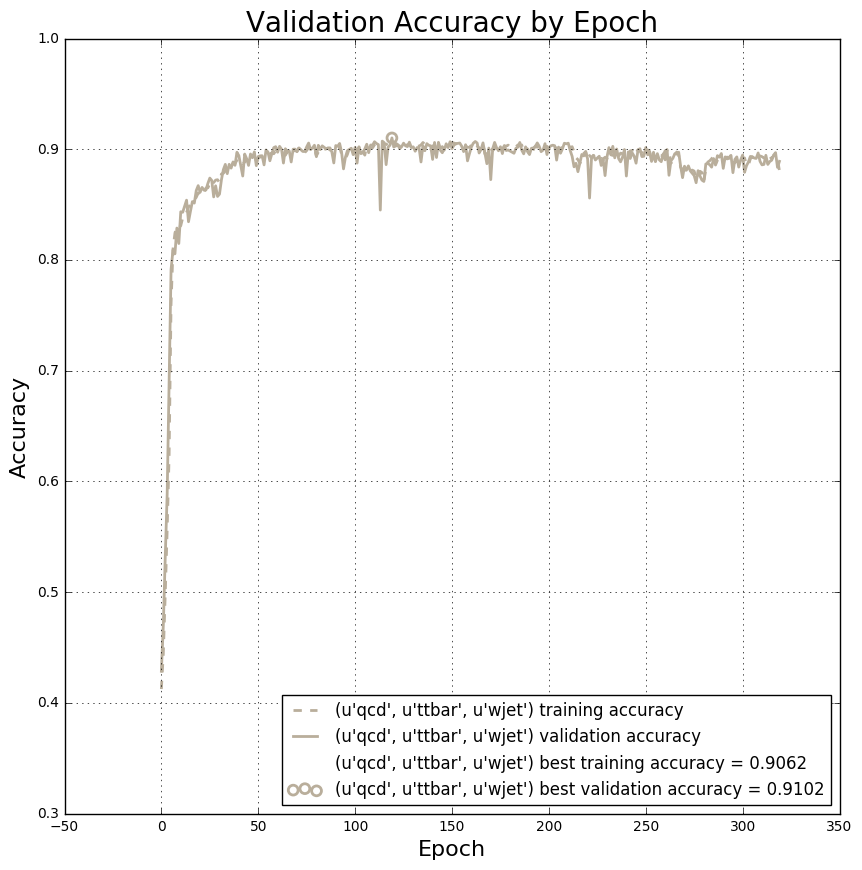

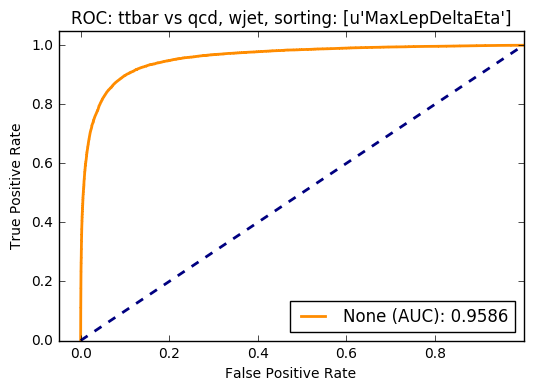

In [270]:
#archive_dir = "/scratch/snx3000/dweiteka/Delphes/keras_archive_4_1"
import glob
import json
#from matplotlib.pyplot import savefig
trials = get_trials_by_name(archive_dir,"LSTM")
print(len(trials))

for t in trials:
    ex = lambda x: os.path.exists("/".join([t.get_path(), x]))
    t.summary()
    if(not ex("history.json")  or not ex("weights.h5")):
        #print("DOING IT")
        copyJRFormatToArchive(t)
        #t.to_record({"val_acc" : max(conHist["val_acc"])})
    
def resolvePos(labels):
    pos,indx = [], []
    if "ttbar" in labels:
        pos.append("ttbar vs " + (", ".join([str(x) for x in labels if x != "ttbar"])))
        indx.append(labels.index("ttbar"))
    if "wjet" in labels:
        pos.append("wjet vs " + (", ".join([str(x) for x in labels if x != "wjet"])))
        indx.append(labels.index("wjet"))
    return zip(pos,indx)
    
  #  t.output_as_dir(folder,symlink=True)
for t in trials:
    if(t.is_complete()):
        shortName = nameByTrial(t)
        
        t.summary()
        #print(name)
        history = t.get_history()
        labels = t.get_from_record("labels")
        name = str(tuple(labels)) if(labels != None) else "Cannot Find Labels"
        p = plot_history([(name, history)], plotLoss = False,show=False)
        #print(resolvePos(labels))
        #break
        p.savefig("/bigdata/shared/Delphes/CSCS/" + shortName + "_histPlot.png")
        
        for s,indx in resolvePos(labels):
            pos = s.split()[0]
            p = plot_roc_curve(t,true_index=indx, title="ROC: %s, sorting: %r" \
                   % tuple([s,t.get_from_record(["sort_on"])]), show=False)
            p.savefig("/bigdata/shared/Delphes/CSCS/" + shortName + ("_ROC_%r_Plot.png" % pos))
    print(t.is_complete())
    


In [10]:

def plot_roc_curve(trial=None, labels=None, predictions=None, true_index=None, title="ROC Curve", show=True):
    from CMS_Deep_Learning.storage.iterators import TrialIterator
    from sklearn.metrics import roc_curve, auc
    from matplotlib import pyplot as plt
    if(not isinstance(trial, dict)):
        trialDict = {None:trial}
    else:
        trialDict = trial
    d = {}
    for name, trial in trialDict.items():
        print(trial)
        if (trial != None):
            tr = TrialIterator(trial, data_keys=["Y"], return_prediction=True)
            labels, predictions = tr.asList(verbose=0)
            labels = labels[0]

        labels = np.array(labels)
        predictions = np.array(predictions)
        # Draw the ROC curve
        labels = np.array(labels)
        predictions = np.array(predictions)

        assert labels.shape == predictions.shape, "labels and predictions should have \
            the same shape, %r != %r" % (labels.shape == predictions.shape)
        n = labels.shape[0]
        if (len(labels.shape) > 1 and labels.shape[1] > 1):
            if (true_index != None):
                labels = labels[:, true_index].ravel()
                predictions = predictions[:, true_index].ravel()
            else:
                raise ValueError("must designate index of true class for data of shape %r" % list(labels.shape))
        
        fpr, tpr, thres = roc_curve(labels, predictions)
        roc_auc = auc(fpr, tpr)
        d[name] = (fpr,tpr,roc_auc, thres)
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange', \
                 lw=lw, label='%r (AUC): %0.4f' % (name,roc_auc))
    
    
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    if (show): plt.show()
    return plt,d




In [11]:
three_ways = {str("-".join([x.get_from_record("sort_on"), \
                         "asc" if x.get_from_record("sort_ascending") else "dec"])):x \
              for x in trials if x.get_from_record("labels") == ["qcd", "ttbar", "wjet"]}
print(three_ways)
print(three_ways.keys())
print(len(three_ways))
three_ways_plt,three_way_dict = plot_roc_curve(three_ways,true_index=1)

{'shuffle-dec': <CMS_Deep_Learning.storage.archiving.KerasTrial object at 0x7f7e90f3c610>, 'PT_ET-asc': <CMS_Deep_Learning.storage.archiving.KerasTrial object at 0x7f7e90f3c910>, 'PT_ET-dec': <CMS_Deep_Learning.storage.archiving.KerasTrial object at 0x7f7e90f3c990>, 'MaxLepAntiKt-dec': <CMS_Deep_Learning.storage.archiving.KerasTrial object at 0x7f7e9369ffd0>, 'MaxLepDeltaR-dec': <CMS_Deep_Learning.storage.archiving.KerasTrial object at 0x7f7e90f3c810>, 'MaxLepDeltaPhi-dec': <CMS_Deep_Learning.storage.archiving.KerasTrial object at 0x7f7e9369f2d0>, 'MaxLepDeltaEta-dec': <CMS_Deep_Learning.storage.archiving.KerasTrial object at 0x7f7e9369f350>, 'MaxLepKt-dec': <CMS_Deep_Learning.storage.archiving.KerasTrial object at 0x7f7e90f3cb10>}
['shuffle-dec', 'PT_ET-asc', 'PT_ET-dec', 'MaxLepAntiKt-dec', 'MaxLepDeltaR-dec', 'MaxLepDeltaPhi-dec', 'MaxLepDeltaEta-dec', 'MaxLepKt-dec']
8


KeyError: 'Jet'

['gru', 'dense', 'gru-60', 'bi_lstm', 'cnn', 'LSTM']
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive


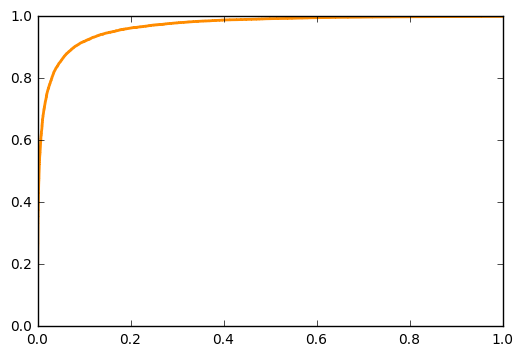

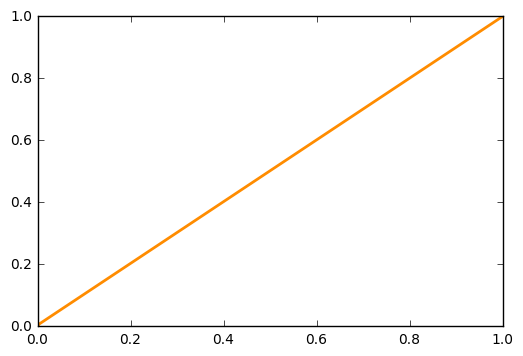

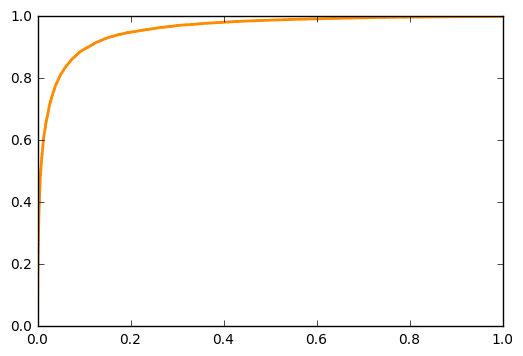

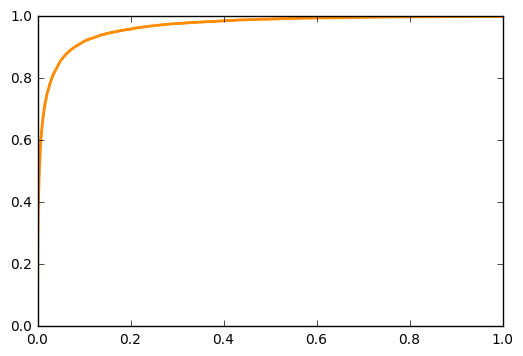

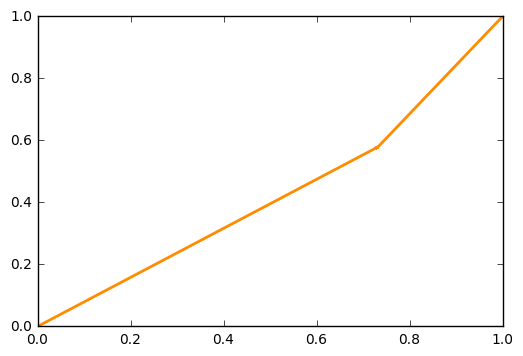

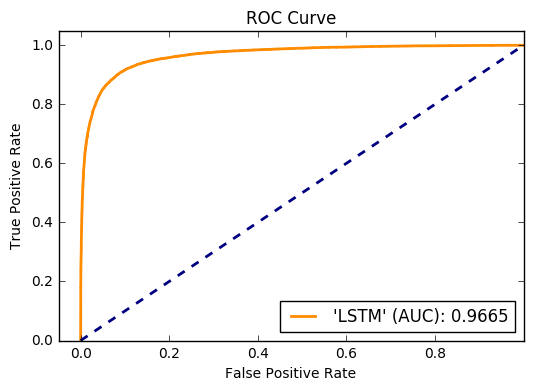

['gru', 'dense', 'gru-60', 'bi_lstm', 'cnn', 'LSTM']


In [8]:
name_list_to_reg = lambda x: str(x) if isinstance(x,str) else str(x[0])
#for t in jr_model_trials:
#    t.summary()
jr_models = {name_list_to_reg(x.get_from_record("name")):x \
              for x in jr_model_trials if not x.get_from_record("name") == ['slstm']} 
#print([x.get_from_record("name") for x in jr_model_trials])
print(jr_models.keys())
#print(jr_model_trials[0].get_model())
jr_models_plt,jr_models_dict = plot_roc_curve(jr_models,true_index=1)
print(jr_models_dict.keys())

In [9]:

colors_contrasting3 = \
[
(0.875, 0.122, 0.122), # Red
(0.875, 0.522, 0.122), # Orange
(0.400, 0.400, 0.400), # Gray
(0.082, 0.812, 0.255), # Green
(0.067, 0.639, 0.831), # Turquoise
(0.424, 0.322, 0.933), # Purple
(0.871, 0.024, 0.588), # Pink
(0.820, 0.808, 0.075), # Yellow


(0.557, 0.039, 0.039), # Red
(0.518, 0.333, 0.078), # Orange
(0.098, 0.098, 0.098), # Black
(0.027, 0.471, 0.129), # Green
(0.020, 0.361, 0.475), # Turquoise
(0.196, 0.122, 0.576), # Purple
(0.490, 0.004, 0.329), # Pink
(0.459, 0.455, 0.035), # Yellow


(0.965, 0.533, 0.533), # Red
(0.965, 0.757, 0.533), # Orange
(0.800, 0.800, 0.800), # Light Gray
(0.620, 0.976, 0.702), # Green
(0.522, 0.863, 0.976), # Turquoise
(0.639, 0.584, 0.910), # Purple
(0.992, 0.506, 0.827), # Pink
(0.976, 0.969, 0.522), # Yellow

]

flipped = True

from CMS_Deep_Learning.postprocessing.colors import colors_contrasting
import matplotlib.cm as cmx
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import Grid
from matplotlib import rc
#jet = cm = plt.get_cmap('hsv')
#cNorm  = colors.Normalize(vmin=0, vmax=len(d.keys()))
#scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

def plotDualRoc(d,flipped=False, invertCont=False,title=""):
    '''Input d: a dictionary of the roc outputs'''
    from matplotlib import pyplot as plt
#for flipped in [False,True]:
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

    #ax0 = fig.add_subplot(111)    # The big subplot
    #ax1 = plt.subplot2grid((1, 2), (0, 0))#fig.add_subplot(121)
    #ax2 = plt.subplot2grid((1, 2), (0, 1))#fig.add_subplot(122)
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))
    #ax1,ax2 = Grid(fig, rect=111, nrows_ncols=(1,2),
    #            axes_pad=0.25, label_mode='L',
    #            )

    #f, axes = plt.subplots(1, 2)
    #f.subplots_adjust(hspace=1)
    for k,(use_log,ax) in enumerate(zip([False, True],[ax1,ax2])):
        #plt.subplot(221 + k)
        for i,(name, tup) in enumerate(sorted(d.items(), key=lambda x:-x[1][2])):
            fpr, tpr, roc_auc, thres = tup
            #colorVal = scalarMap.to_rgba(i)
            #colorText = (
            #    'color: (%4.2f,%4.2f,%4.2f)'%(colorVal[0],colorVal[1],colorVal[2])
            #    )
            if(invertCont):
                fpr = [min(1.0/x,40000.0) for x in fpr]
                #print(fpr)
            if(flipped):
                ax.plot(tpr, fpr, color=colors_contrasting3[i],#colors_contrasting[i], \
                             lw=.7, label='%s (AUC): %0.4f' % (name,roc_auc))
            else:
                ax.plot(fpr, tpr, color=colors_contrasting3[i],#colors_contrasting[i], \
                             lw=.7, label='%s (AUC): %0.4f' % (name,roc_auc))


        #plt.rcParams['axes.facecolor'] = "lightgray"
        ax.plot(np.linspace(0, 1, num=50), np.linspace(0, 1, num=50),
                 color='navy', lw=.4, linestyle='--')


        #ax.set_aspect('equal', 'datalim')


        if(flipped):
            if(use_log):ax.set_yscale("log")
            ax.set_xlim([0.0, 1.05])
            if(not invertCont):ax.set_ylim([-0.05, 1.05])
            ax.set_xlabel('signal efficiency (TPR)')
            if(invertCont):
                if(k==0):ax.set_ylabel('1/(signal contamination) %s' % ("log-scale" if use_log else ""))
            else:
                if(k==0):ax.set_ylabel('signal contamination %s (FPR)' % ("log-scale" if use_log else ""))
        else:
            if(use_log):ax.set_xscale("log")
            if(not invertCont):ax.set_xlim([-0.05, 1])
            ax.set_ylim([0.0, 1.05])
            if(k==0):ax.set_ylabel('signal efficiency (TPR)')
            if(invertCont):
                ax.set_xlabel('1/(signal contamination) %s' % ("log-scale" if use_log else ""))
            else:
                ax.set_xlabel('signal contamination %s (FPR)' % ("log-scale" if use_log else ""))

        #plt.rcParams['axes.facecolor'] = 'w'
        #if(k==1):
    #plt.title("THE TITLE")
    fig.suptitle(title, fontsize=18)



    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':10})


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


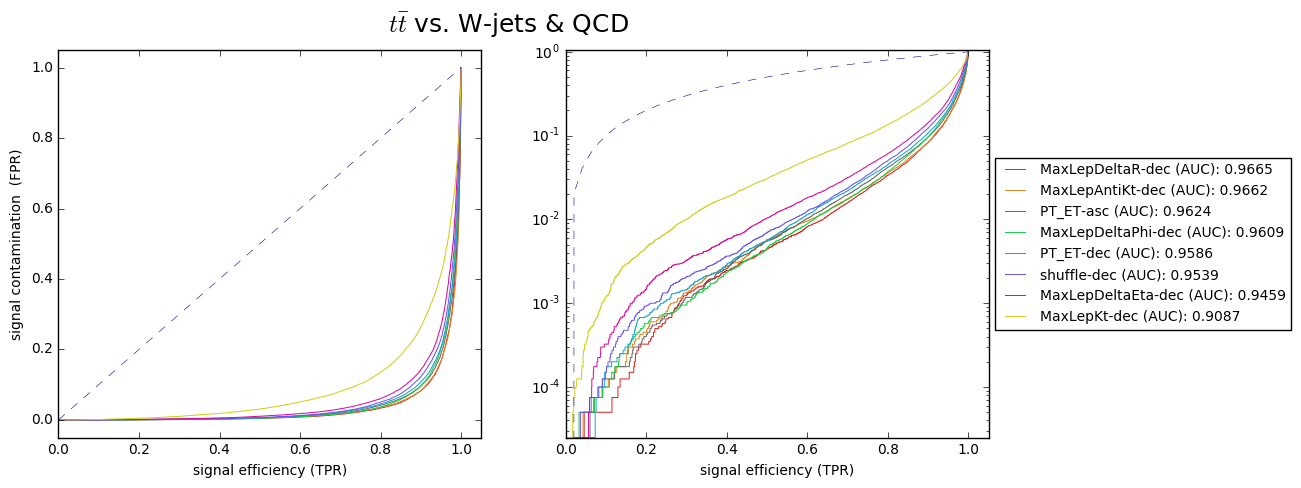

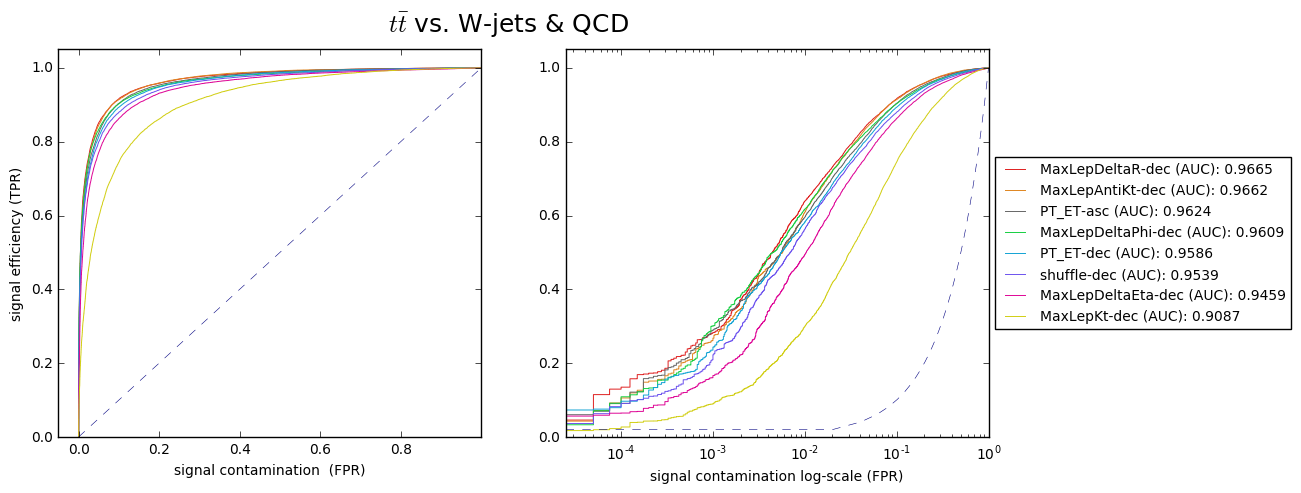

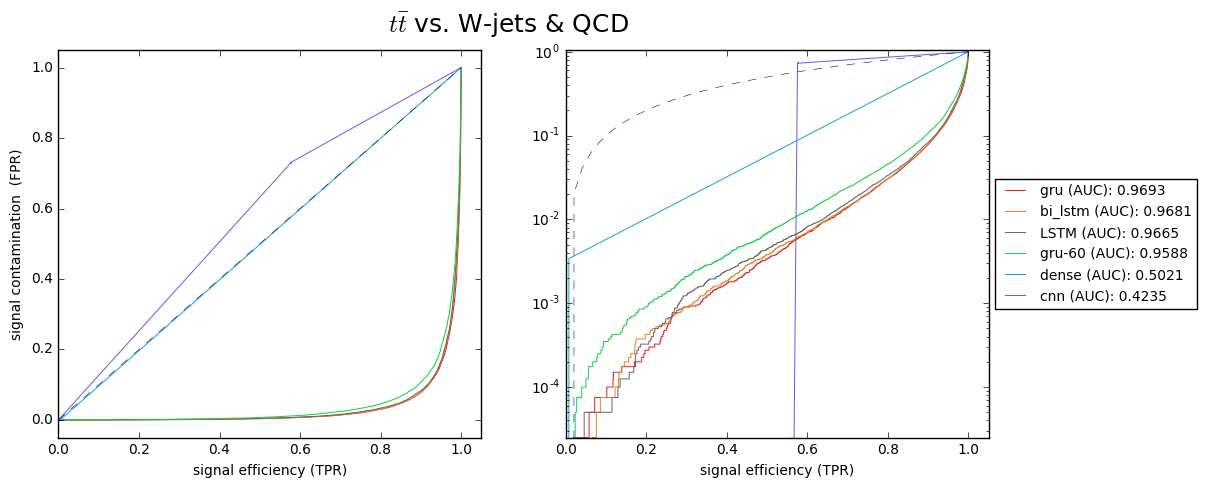

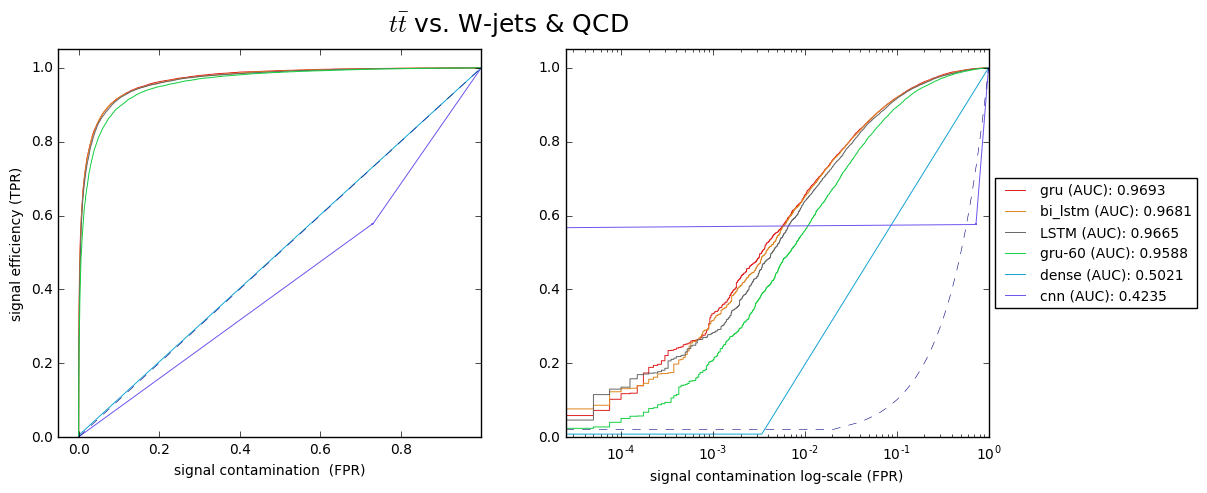

In [10]:
plotDualRoc(three_way_dict,flipped=True, invertCont=False, title=r'$t\bar{t}$ vs. W-jets & QCD')
plotDualRoc(three_way_dict,flipped=False, invertCont=False, title=r'$t\bar{t}$ vs. W-jets & QCD')

plotDualRoc(jr_models_dict,flipped=True, invertCont=False, title=r'$t\bar{t}$ vs. W-jets & QCD')#
plotDualRoc(jr_models_dict,flipped=False, invertCont=False,title=r'$t\bar{t}$ vs. W-jets & QCD')

In [11]:
sotred_three_way = sorted(three_way_dict.items(), key=lambda x:-x[1][2]) 
for i,(name, tup) in enumerate(sotred_three_way[:1]):
    fpr, tpr, auc, thres = tup
    #if(name == )
    print(name)
    conts = iter([.5,.1, .05, .01, .001])
    currCont = next(conts)
    naiveUsed = False
    for eff,con,t in reversed(zip(tpr,fpr,thres)):
        #print(t)
        nai = (t >= 1.0/3 and not naiveUsed)
        if(con <= currCont or nai):
            
            print("%0.3f, %0.3f, %0.3f" % (eff,con,t))
            if(nai):
                naiveUsed = True
                continue
            try:
                currCont = next(conts)
            except StopIteration:
                break
for i,(name, tup) in enumerate(sotred_three_way[:1]):
    fpr, tpr, auc, thres = tup
    #if(name == )
    print(name)
    conts = iter(reversed([.90,.95, .99, .999]))
    currCont = next(conts)
    naiveUsed = False
    for eff,con,t in reversed(zip(tpr,fpr,thres)):
        #print(t)
        nai = (t >= 1.0/3 and not naiveUsed)
        if(eff <= currCont or nai):
            
            print("%0.3f, %0.3f, %0.3f" % (eff,con,t))
            if(nai):
                naiveUsed = True
                continue
            try:
                currCont = next(conts)
            except StopIteration:
                break
#for i,(name, tup) in enumerate(sorted(three_way_dict.items(), key=lambda x:-x[1][2])):
#    fpr, tpr, auc, thres = tup
#    #if(name == )
#    print(name)
#    conts = iter(reversed([.90,.95, .99, .999]))
#    currCont = next(conts)
#    for eff,con,t in reversed(zip(tpr,fpr,thres)):
#        if(eff <= currCont):
#            print("%0.3f, %0.3f, %0.3f" % (eff,con,t))
#            try:
#                currCont = next(conts)
#            except StopIteration:
#                break
        
    #print(name, tup)

MaxLepDeltaR-dec
0.990, 0.500, 0.020
0.916, 0.100, 0.293
0.907, 0.090, 0.333
0.851, 0.050, 0.549
0.638, 0.010, 0.896
0.283, 0.001, 0.984
MaxLepDeltaR-dec
0.999, 0.859, 0.006
0.990, 0.501, 0.020
0.950, 0.167, 0.143
0.907, 0.090, 0.333
0.900, 0.083, 0.363


In [272]:
def accVsEventChar(model,
                   #data,
                   char,
                   observ,
                   objects,
                   num_samples=None,
                   char2=None,
                   bins=20,
                   true_class_index=-1,
                   threshold=-1,
                   observable_ordering=['E/c', 'Px', 'Py', 'Pz', 'PT_ET','Eta', 'Phi',
                      "MaxLepDeltaEta", "MaxLepDeltaPhi",'MaxLepDeltaR', 'MaxLepKt', 'MaxLepAntiKt',
                      "METDeltaEta","METDeltaPhi",'METDeltaR', 'METKt', 'METAntiKt',
                      'Charge', 'X', 'Y', 'Z',
                      'Dxy', 'Ehad', 'Eem', 'MuIso', 'EleIso', 'ChHadIso','NeuHadIso','GammaIso', "ObjFt1","ObjFt2","ObjFt3"],
                   object_ordering=["EFlowPhoton","EFlowNeutralHadron", "EFlowTrack", "Electron", "MuonTight", "MissingET"],
                   equalBins=False,
                   custom_objects={},
                   plot=False):
    '''Computes event features and and returns binned data about the accuracy of a model against those features. Also computes the standard error for each bin.
        #Arguements:
            model -- The model being tested, or a KerasTrial containing a valid model.
            data  -- A generator, DataProcedure, or tuple pair (X,Y) containing the data to be run through the model. If a generator or DataProcedure
                     containing a generator is given the num_samples must be set. If model is a KerasTrial this can be set to None, and the validation
                     set will be found from the archive (or computed) and used in place of data.
            char  -- Any numpy function that reduces data along an axis, (i.e np.sum, np.avg, np.std). This is the 1st reduction of the characteristics
                     reducing the data within each object type of a sample.
            observ -- The observable to be reduced (i.e PT_ET, E/c, Phi).
            objects -- What objects should be included in the characteristic computation.
            num_samples -- The number of samples to be read from a generator dat input.
            char2 -- Defaults to the same as char. A numpy function that reduces data along an axis. In this case to reduce between objects.
            bins -- The number of bins to use in the analysis.
            observable_ordering -- A list of the observables in each sample ordered as they are in the sample. It is IMPORTANT that this matches the observables
                                    in the sample, otherwise the "observ" argument will not select the intended column in the data.
            object_ordering -- A list of the possible objects in the data ordered as they are in the sample. This corresponds to the ordering of the ObjectProfiles
                                when the data was created. If this argument does not match the data then the wrong objects will be selected for analysis.
            equalBins -- True/False, Defualt False. If True, will try to put an equal number of samples in each bin. This should probably be left False or else the bins
                            will be very unusual, varying significantly in their domain.
            custom_objects -- A dictionary keyed by names containing the classes of any model components not used in the standard Keras library.
            plot -- If True plot the bins automatically.
        #Returns:
            A list of dictionaries each containing information about a bin. The output of this can be plotted with CMS_SURF_2016
            '''
    if (not isinstance(objects, list)): objects = [objects]
    objects = [o if isinstance(o, int) or isinstance(o, dict) else object_ordering.index(o) for o in objects]
    #print(objects)
    observ = observ if isinstance(observ, int) else observable_ordering.index(observ)
    if (char2 == None): char2 = char
    np.set_printoptions(threshold='nan')
    def accum(X):
        assert X[0].shape[2] == len(observable_ordering),\
                "X and observable_ordering have different last dimension %r != %r" % (X[0].shape[2], len(observable_ordering))
        #print(len(X[0]))
        if(len(X) == 1):
            obj_chars = []
            for o in objects:
                if(isinstance(o, dict)):
                    indxs, vals = zip(*[(observable_ordering.index(key),val) for key,val in o.items()])
                    vals = np.array(vals)
                    
                    satisfied_mask = (X[0][:,:,indxs] == vals).all(axis=2).reshape((X[0].shape[0],X[0].shape[1],1))
                    x_subs = (X[0]*satisfied_mask)[:,:,observ]
                    
                    obj_chars.append(char(x_subs, axis=1))
                    
                else:
                    raise ValueError("IDK? Try using dict vals instead.")
            obj_chars = np.array(obj_chars)
        else:
            obj_chars = np.array([char(X[o][:, :, observ], axis=1) for o in objects])
        assert obj_chars.shape[0] == len(obj_chars)
        # assert obj_chars.shape[1] >= batch_size
        #print(obj_chars.shape)
        batch_chars = char2(obj_chars, axis=0)
        #print(batch_chars.shape)
        #print(batch_chars)
        return batch_chars

    if (isinstance(model, KerasTrial)):
        dItr = TrialIterator(model, return_prediction=True, accumilate=accum)
    else:
        dItr = DataIterator(data, num_samples=num_samples, prediction_model=model, accumilate=accum)
    # tup =
    # print(len(tup), tup)
    y_vals, predictions, characteristics = dItr.asList()
    #list_out = dItr.asList()
    #print(list_out)
    if (len(y_vals) == 1):
        y_vals = y_vals[0]
    else:
        raise ValueError("Error multiple outputs is ambiguous, got %r outputs", len(y_vals))
    # characteristics = np.random.rand(400)
    # predictions = np.random.rand(400,2)
    # y_vals = np.random.rand(400,2)

    sorted_indicies = np.argsort(characteristics)

    characteristics = characteristics[sorted_indicies]
    predictions = predictions[sorted_indicies]
    y_vals = y_vals[sorted_indicies]
    
    min_char = characteristics[0]
    max_char = characteristics[characteristics.shape[0] - 1]
    print("MIN:MAX:",min_char,max_char)#, set(characteristics))
    if (not equalBins):
        stride = (max_char - min_char) / bins
        split_vals = [min_char + stride * (i + 1) for i in range(bins - 1)]
        split_at = characteristics.searchsorted(split_vals)
    else:
        stride = characteristics.shape[0] / float(bins)
        split_at = [int(stride * float(i + 1)) for i in range(bins - 1)]

    predict_bins = np.split(predictions, split_at)
    y_bins = np.split(y_vals, split_at)
    
    def non_gen(n):
        for i in range(n):
            yield
            
    n = len(predict_bins)
    tp_bins, fp_bins, tn_bins, fn_bins,cont_bins = non_gen(n),non_gen(n),non_gen(n),non_gen(n),non_gen(n)
    if(true_class_index != -1):
        if(threshold == -1): threshold = 1.0/max(y_vals.shape[-1],2)
        #pos = [np.sum(np.argmax(y, axis=-1) == true_class_index)  for (p, y) in zip(predict_bins, y_bins)]
        #neg = [np.sum(np.argmax(y, axis=-1) != true_class_index) for (p, y) in zip(predict_bins, y_bins)]
        #T = [np.sum(p[:,true_class_index] >= threshold).astype("float64") for (p, y) in
        #                   zip(predict_bins, y_bins)]
        #F = [np.sum(p[:,true_class_index] < threshold).astype("float64") for (p, y) in
        #                   zip(predict_bins, y_bins)]
        #print(predict_bins[0][:,true_class_index])
        #print(predict_bins[0][:,true_class_index] < threshold)
        #print(predict_bins[0][:,true_class_index] >= threshold)
        #print(pos, neg, T,F)
         
        PosClassPop_indicies = [[i for i,v in enumerate(np.argmax(y, axis=-1) == true_class_index) if v] \
                for (p, y) in zip(predict_bins, y_bins)]
        NegClassPop_indicies = [[i for i,v in enumerate(np.argmax(y, axis=-1) != true_class_index) if v] \
                for (p, y) in zip(predict_bins, y_bins)]
    
        tp_bins = [(p[:,true_class_index] >= threshold)[ PosClassPop_indicies[i] ].astype("int") \
                for i,p in enumerate(predict_bins)]
        fp_bins = [(p[:,true_class_index] >= threshold)[ NegClassPop_indicies[i] ].astype("int") \
                for i, p in enumerate(predict_bins)]
        tn_bins = [(p[:,true_class_index] < threshold)[ NegClassPop_indicies[i] ].astype("int") \
                for i,p in enumerate(predict_bins)]
        fn_bins = [(p[:,true_class_index] < threshold)[ PosClassPop_indicies[i] ].astype("int") \
                for i,p in enumerate(predict_bins)]
        
        
        cont_bins = [(np.argmax(y, axis=-1))[np.where(p[:,true_class_index] >= threshold)]for i,(p,y)  in enumerate(zip(predict_bins,y_bins))]
        #print(len(cont_bins[0]), len(fp_bins[0]))
        
        #for (p, y) in zip(predict_bins, y_bins)]
                           
        #fp_bins = [((p[:,true_class_index] >= threshold) * (np.argmax(y, axis=-1) != true_class_index)).astype("float64") for (p, y) in
        #                  zip(predict_bins, y_bins)]
        #tn_bins = [((p[:,true_class_index] < threshold) * (np.argmax(y, axis=-1) != true_class_index)).astype("float64") for (p, y) in
        #                   zip(predict_bins, y_bins)]
        #fn_bins = [((p[:,true_class_index] < threshold) * (np.argmax(y, axis=-1) == true_class_index)).astype("float64") for (p, y) in
        #                   zip(predict_bins, y_bins)]
    labelArgMax_bins = [{x:np.sum(np.argmax(y, axis=-1) == x) for x in range(y_vals.shape[-1])} for y in y_bins]
    #print(np.unique(np.argmax(y_bins[0], axis=-1), return_counts=True))
    #print(np.sum((y_bins[0] == np.array([1,0,0])).all(axis=-1)))
    
    true_false_bins = [np.equal(np.argmax(p, axis=-1), np.argmax(y, axis=-1)).astype("float64") for (p, y) in
                       zip(predict_bins, y_bins)]
    #print("thres:", threshold)
    out_bins = []
    prevmax = min_char
    for i, (tf,tp,fp,tn,fn,agm,cb) in enumerate(zip(true_false_bins, tp_bins, fp_bins, tn_bins, fn_bins,labelArgMax_bins, cont_bins)):
        b = {}
        num = tf.shape[0]
        _tp,_fp,_tn,_fn = np.sum(tp),np.sum(fp),np.sum(tn), np.sum(fn)
        #print(len(tp), num, len(fp))
        #print(num, _tp+_fp+_tn+_fn, _tp,_fp,_tn,_fn)
        pos_pop = max(_tp + _fn,1)
        neg_pop = max(_tn + _fp,1) 
        b["tpr"] = float(_tp) / pos_pop
        b["fpr"] = float(_fp) / neg_pop
        b["ppv"] = float(_tp) / max(_fp + _tp,1)
        b["acc"] = np.mean(tf)
        b["acc_error"] = np.std(tf) / np.sqrt(num)
        b["tpr_error"] = np.std(tp) / np.sqrt(pos_pop)
        b["fpr_error"] = np.std(fp) / np.sqrt(neg_pop)
        unique, counts = np.unique(cb, return_counts=True)
        cont_classes_d = dict(zip(unique, counts))
        #print(cont_classes_d, _fp)
        b["cont_classes"] = {key:float(val)/neg_pop for key,val in cont_classes_d.items() if key != true_class_index}
        
        b["arg_max"] = agm
        b["num_samples"] = num
        b["min_bin_x"] = prevmax
        if (i == len(true_false_bins) - 1):
            b["max_bin_x"] = max_char
        else:
            b["max_bin_x"] = prevmax = characteristics[split_at[i]]
        out_bins.append(b)

    if (plot): plotBins(out_bins)
    return out_bins

model = three_ways["MaxLepDeltaR-dec"]
#model = three_ways["shuffle-dec"]
#model = jr_models['gru']
model.summary()
print([x.hash() for x in  model.get_val()])
label_indices = {'QCD':0,r'$t\bar{t}$':1, "W+jets":2}


--------------------------------------------------
TRIAL SUMMARY (8b187813a7bf238cc4f4e77927e58ec0806a2389)
    Record_Info:
        name = ["LSTM"]
        val_acc = 0.9077
        
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "ttbar", "wjet"], lstm_dropout = 0.0, output_activation = "softmax", patience = 8, query = null, single_list = true, sort_ascending = false, sort_on = "MaxLepDeltaR"
--------------------------------------------------
['76312ef7a2aa09d5f0a801e9981a896a74b34322', '9cc2aa992185faba02773b6dbb4e56045cd7dc7d', '3724b3a81f0836b07e24b550fb2aba9ec8db6e61', '85cf8be9467649536a7b7ab7102a3c0d2b9dfe82', '4ccbc728bd1da855b5855fa4a2cc743a437121ec', 'a0afc373aee29477b9b891993712331f0fee54d7', '79742087f46dad47b3d438c1c2ba5d79c4fbc093', '66524cc5fc47151ef3bf263f18a85698deca5f7f', '0c0160b582423999cd26cfac2490504c914324a2', '30c9cf507dc0bbd2abde670df5a11af3abb69214', 'f69711d1f8b39ed0a9c1acf0cd931bcd97578e96', '7dcb90bc9e3c9923b49e31a791046694c19a7a1a',

In [235]:
cbb = accVsEventChar(model,np.max, "PT_ET",
          [{"ObjFt1": -1, "ObjFt2": 1,"ObjFt3": 1}, {"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": -1}],
          true_class_index=1,char2=np.max, threshold=0.143,bins=1)# 0.363,0.143
#(60000, 60000, 18000, 3318, 36682, 2000)
print(cbb[0]["cont_classes"], cbb[0]["fpr"])
print(cbb[0]["arg_max"])

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)


In [236]:
cbb = accVsEventChar(model,np.max, "PT_ET",
          [{"ObjFt1": -1, "ObjFt2": 1,"ObjFt3": 1}, {"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": -1}],
          true_class_index=1,char2=np.max, threshold=0.143,bins=1)# 0.363,0.143
#(60000, 60000, 18000, 3318, 36682, 2000)
print(cbb[0]["cont_classes"], cbb[0]["fpr"])
print(cbb[0]["arg_max"])

({0: 0.107475, 2: 0.059975}, 0.16745)
{0: 20000, 1: 20000, 2: 20000}


In [ ]:
#test_trials = get_trials_by_name(archive_dir,"LSTM")
#tt = KerasTrial.find(archive_dir, "189236c2a41a64e4f83f67fcb63149ad987ce5f5")

#test_trials = findWithMetrics(test_trials, {"labels" : ["qcd", "ttbar"]})
#for x in test_trials:
#    x.summary()

lepPT_bins = accVsEventChar(model,np.max, "PT_ET",
                          [{"ObjFt1": -1, "ObjFt2": 1,"ObjFt3": 1}, {"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": -1}],
                          true_class_index=1,char2=np.max, threshold=0.363,bins=200)
#lepPT_bins = {label:accVsEventChar(tt,np.max, "PT_ET",
#                          [{"ObjFt1": -1, "ObjFt2": 1,"ObjFt3": 1}, {"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": -1}],
#                          true_class_index=inx,char2=np.max, threshold=0.363,bins=200) for label,inx in label_indices.items()}

In [ ]:
lepMul_bins = accVsEventChar(model,lambda x,**kargs:np.sum((x>0.0).astype('float'),**kargs), "PT_ET",
                          [{"ObjFt1": -1, "ObjFt2": 1,"ObjFt3": 1}, {"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": -1}],
                          true_class_index=1,char2=np.sum, threshold=0.363,bins=7) 
#lepMul_bins = {label:accVsEventChar(model,lambda x,**kargs:np.sum((x>0.0).astype('float'),**kargs), "PT_ET",
#                          [{"ObjFt1": -1, "ObjFt2": 1,"ObjFt3": 1}, {"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": -1}],
#                          true_class_index=inx,char2=np.sum, threshold=0.363,bins=7) for label,inx in label_indices.items()}

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)


In [ ]:
MET_bins = accVsEventChar(model,np.sum, "PT_ET",
                          [{"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": 1}],
                          true_class_index=1,char2=np.sum, threshold=0.363,bins=200)
#MET_bins = {label:accVsEventChar(model,np.sum, "PT_ET",
#                          [{"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": 1}],
#                          true_class_index=inx,char2=np.sum, threshold=0.363,bins=200)
#             for label,inx in label_indices.items()}

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)


In [296]:
def plotBins(bins,
             y_val="acc",
             min_samples=10,
             mode="bar",
             title='',
             xlabel='',
             ylabel='',
             binLabels=None,
             legendTitle=None,
             legendBelow=False,
             alpha=.8,
             colors=['b','g','r'],
             shapes=None,
             xlim=None,
             ylim=(0,1.025),
             useGrid=True,
             log=False,
             stack=False,
             normalize=False,
             show=True):
    ''' Plots the output of CMS_Deep_Learning.utils.metrics.accVsEventChar
        #Arguments:
            bins -- A list of lists of dictionaries with info about how the bins. (i.e the output of accVsEventChar)
            min_samples -- The minumum number of samples that must be in a bin for it to be plotted.
            mode -- "bar" or "scatter"
            title -- The title of the plot
            xlabel -- The xlabel of the plot
            ylabel -- the ylabel of the plot
            binLabels -- A list of labels to be shown in the legend. One for each set of bins.
            legendTitle -- The title of the legend.
            legendBelow -- Whether or not to put the legend below the graph
            alpha -- The opacity of the plot.
            colors -- the colors for each set of bins (see how matplotlib handles colors)
            shapes -- the shapes of the markers for the graph
            xlim -- a tuple (minX, maxX) that determines he x range of the view of the graph
            ylim -- a tuple (minY, maxY) that determines he y range of the view of the graph 
            useGrid -- if True then display a grid in the background of the graph'''
    from matplotlib import pyplot as plt
    if (not isinstance(bins, dict)):
        bins = {"":bins}
    elif(binLabels == None):
        binLabels = bins.keys()
    if(shapes == None):
        shapes = ['o','s','v', 'D', '^','*', '<', '>']
    if(not isinstance(colors,list)):
        colors = [colors]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    if(useGrid):
        if(mode == "bar"):
            ax.yaxis.grid(True, which='major')
        else:
            ax.grid(True)
        ax.set_axisbelow(True)
    
    #if(mode == "stacked"):
    #    lables, binsets = bins.items()
    #    xs = [binsets[0]["min_bin_x"] for binset in binsets if(sum[b["num_samples"] for b in binset] >= min_samples)]
    #    widths = [binsets[0]["max_bin_x"]-binsets[0]["min_bin_x"] for binset in binsets if(sum[b["num_samples"] for b in binset] >= min_samples)]
    #    ys = [[b[y_val] for b in binset] for binset in binsets if(sum[b["num_samples"] for b in binset] >= min_samples)]
    #    ax.stackplot(xs, *ys)
        #color = colors[i%len(colors)]
        #label = binlabel#binLabels[i] if binLabels != None and len(binLabels) > i else None
        
        #ys = [b[y_val] for b in bs if(b["num_samples"] >= min_samples)]
        
    #else:
    #    
    #print(bins.keys())
    for i,(binlabel, binset) in enumerate(bins.items()):
        bs = binset
        #if(isinstance(binset[0],dict)):
        #    binset = [binset]
        #for i,bs in enumerate(binset):
        color = colors[i%len(colors)]
        label = binlabel#binLabels[i] if binLabels != None and len(binLabels) > i else None
        xs = [b["min_bin_x"] for b in bs if(b["num_samples"] >= min_samples)]
        ys = [b[y_val] for b in bs if(b["num_samples"] >= min_samples)]
        widths = [b["max_bin_x"]-b["min_bin_x"] for b in bs if(b["num_samples"] >= min_samples)]
        errors = None if not (y_val+"_error") in bs[0] \
                else [b[y_val+"_error"] for b in bs if(b["num_samples"] >= min_samples)] 
        if(mode == "bar"):

            ax.bar(xs, ys, width=widths, yerr=errors, color=color,label=label, ecolor='k', alpha=alpha, log=log)
        elif(mode == "histo"):
            print(ys,sorted(ys[0].keys()))
            ys = [[y[key] for key in sorted(y.keys())] for y in ys]
            if(normalize):ys = [np.array(y).astype('float')/np.sum(y) for y in ys]
            #print([sum(y) for y in ys])
            ys = zip(*ys)
            #print(ys)
            bot = np.array([0.0] * len(xs))
            for j,y in enumerate(ys):
                if(binLabels != None): label = binLabels[j]
                print(label,j,colors[j%len(colors)])
                #print(label)
                if(stack):
                    ax.bar(xs, y, width=widths, yerr=errors, bottom=bot, color=colors[j%len(colors)],label=label, ecolor='k', alpha=alpha, log=log)
                else:
                    ax.plot(xs, y, ls='steps', color=colors[j%len(colors)],label=label, alpha=alpha)
                print(bot)
                if(stack):bot += y
            #print(ys)
            #ax.stackplot(xs, *ys)
        else:
            #ax.set_aspect('equal', 'datalim')
            #plt.ylim(ylim)

            s = shapes[i%len(colors)]
            ax.plot(xs,ys,color=color,label=label, marker=s,linestyle='None')
            ax.errorbar(xs,ys, yerr=errors,color=color,ecolor=color, alpha=alpha,fmt='',linestyle='None',)
            if(log):ax.set_yscale("log")
    #ax.legend(binlabel)

    ax.set_title(title, size=16)
    ax.set_xlabel(xlabel, size=14)
    ax.set_ylabel(ylabel, size=14)
    if(legendBelow):
        legend = ax.legend(title=legendTitle, fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True,ncol=2)
    else:
        legend = ax.legend(title=legendTitle, fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
    
    if(legendTitle != None): plt.setp(legend.get_title(),fontsize=14)
    
    plt.ylim(ylim)
    plt.xlim(xlim)

    if (show): plt.show()
    return plt
#print(lepMul_bins)


([{0: 609, 1: 910, 2: 164}, {0: 6389, 1: 2080, 2: 240}, {0: 5433, 1: 2058, 2: 275}, {0: 2967, 1: 1657, 2: 273}, {0: 1796, 1: 1374, 2: 240}, {0: 1039, 1: 1224, 2: 238}, {0: 661, 1: 1099, 2: 262}, {0: 372, 1: 1052, 2: 564}, {0: 271, 1: 1016, 2: 1995}, {0: 153, 1: 885, 2: 1888}, {0: 111, 1: 809, 2: 1784}, {0: 64, 1: 724, 2: 1748}, {0: 37, 1: 678, 2: 1503}, {0: 24, 1: 557, 2: 1391}, {0: 21, 1: 512, 2: 1248}, {0: 14, 1: 386, 2: 1025}, {0: 8, 1: 361, 2: 857}, {0: 4, 1: 316, 2: 691}, {0: 7, 1: 280, 2: 577}, {0: 4, 1: 254, 2: 461}, {0: 3, 1: 201, 2: 362}, {0: 2, 1: 178, 2: 333}, {0: 3, 1: 167, 2: 244}, {0: 0, 1: 125, 2: 270}, {0: 2, 1: 116, 2: 197}, {0: 1, 1: 106, 2: 168}, {0: 0, 1: 93, 2: 112}, {0: 0, 1: 81, 2: 111}, {0: 2, 1: 76, 2: 83}, {0: 0, 1: 66, 2: 76}, {0: 2, 1: 62, 2: 69}, {0: 0, 1: 44, 2: 71}, {0: 0, 1: 33, 2: 50}, {0: 0, 1: 57, 2: 41}, {0: 0, 1: 32, 2: 36}, {0: 1, 1: 35, 2: 47}, {0: 0, 1: 25, 2: 38}, {0: 0, 1: 23, 2: 28}, {0: 0, 1: 25, 2: 28}, {0: 0, 1: 26, 2: 22}, {0: 0, 1: 17, 2:

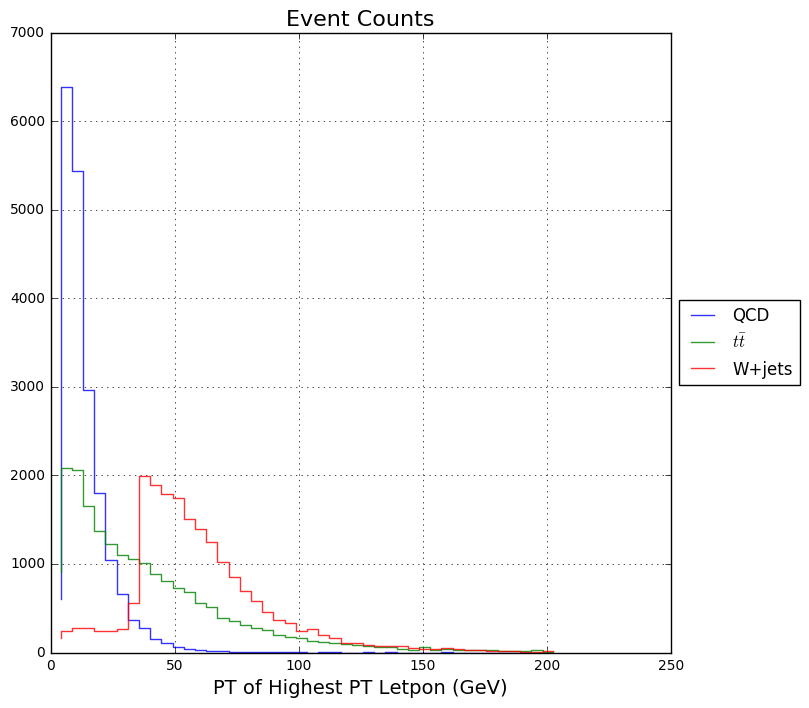

([{0: 17619, 1: 12292, 2: 19455}, {0: 2256, 1: 5979, 2: 515}, {0: 120, 1: 1470, 2: 29}, {0: 5, 1: 230, 2: 1}, {0: 0, 1: 26, 2: 0}], [0, 1, 2])
('QCD', 0, 'b')
[ 0.  0.  0.  0.  0.]
('$t\\bar{t}$', 1, 'g')
[ 0.  0.  0.  0.  0.]
('W+jets', 2, 'r')
[ 0.  0.  0.  0.  0.]


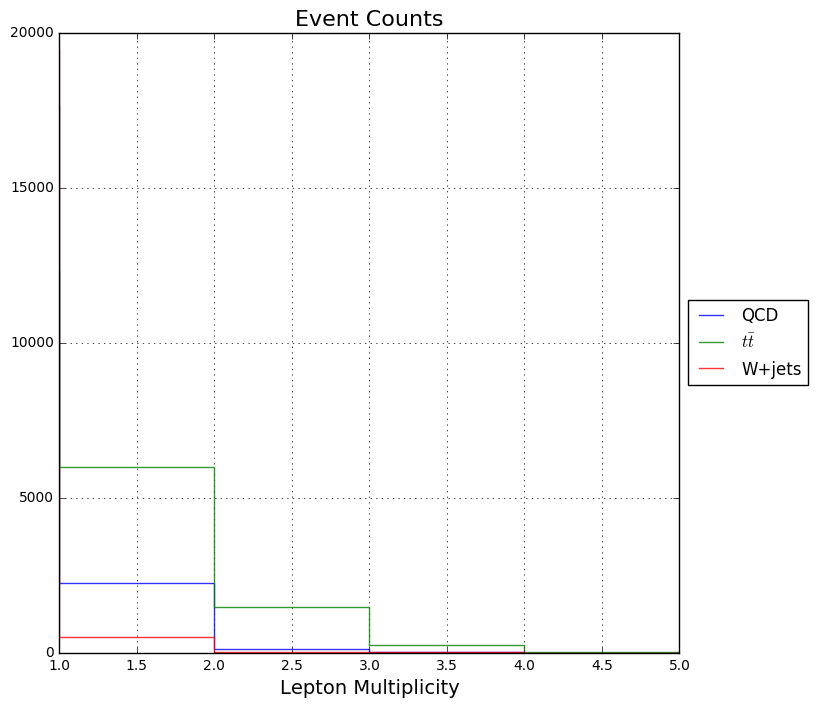

([{0: 671, 1: 178, 2: 277}, {0: 1674, 1: 529, 2: 715}, {0: 2382, 1: 795, 2: 1185}, {0: 2838, 1: 1021, 2: 1515}, {0: 2880, 1: 1132, 2: 1691}, {0: 2391, 1: 1272, 2: 1781}, {0: 2008, 1: 1242, 2: 1700}, {0: 1529, 1: 1239, 2: 1677}, {0: 1183, 1: 1126, 2: 1503}, {0: 796, 1: 1127, 2: 1311}, {0: 526, 1: 1002, 2: 1100}, {0: 375, 1: 927, 2: 911}, {0: 244, 1: 872, 2: 787}, {0: 158, 1: 788, 2: 628}, {0: 116, 1: 692, 2: 520}, {0: 92, 1: 637, 2: 399}, {0: 39, 1: 585, 2: 343}, {0: 27, 1: 533, 2: 271}, {0: 13, 1: 494, 2: 255}, {0: 15, 1: 401, 2: 203}, {0: 9, 1: 343, 2: 167}, {0: 4, 1: 297, 2: 148}, {0: 6, 1: 280, 2: 130}, {0: 3, 1: 264, 2: 101}, {0: 6, 1: 250, 2: 78}, {0: 5, 1: 198, 2: 86}, {0: 2, 1: 175, 2: 53}, {0: 1, 1: 166, 2: 58}, {0: 2, 1: 133, 2: 46}, {0: 1, 1: 132, 2: 39}, {0: 1, 1: 117, 2: 31}, {0: 0, 1: 92, 2: 31}, {0: 0, 1: 96, 2: 36}, {0: 0, 1: 78, 2: 24}, {0: 0, 1: 72, 2: 18}, {0: 0, 1: 56, 2: 20}, {0: 0, 1: 61, 2: 13}, {0: 0, 1: 60, 2: 11}, {0: 0, 1: 52, 2: 19}, {0: 0, 1: 41, 2: 11}, {0:

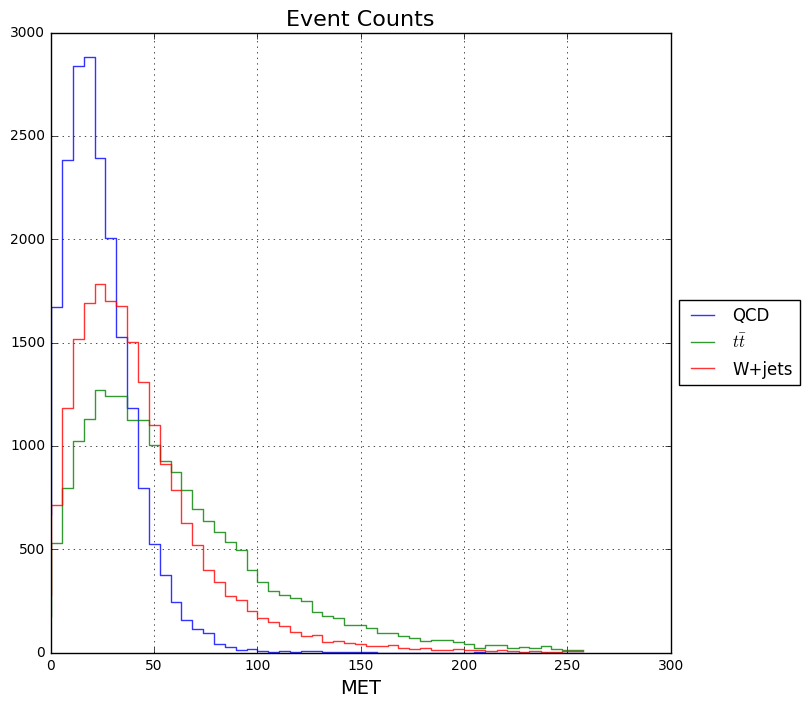

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [298]:
#print(lepPT_bins["QCD"][1])
plotBins(lepPT_bins, y_val="arg_max",mode='histo',ylim=None, binLabels = {val:key for key,val in label_indices.items()},
             xlabel="PT of Highest PT Letpon (GeV)",title="Event Counts",
             min_samples=20, xlim=(0,250)# ylabel="Event Proportion by Bin",
             )
plotBins(lepMul_bins, y_val="arg_max",mode='histo',ylim=None, binLabels = {val:key for key,val in label_indices.items()},
             xlabel="Lepton Multiplicity",title="Event Counts",
             min_samples=20# ylabel="Event Proportion by Bin",
             )
plotBins(MET_bins, y_val="arg_max",mode='histo',ylim=None, binLabels = {val:key for key,val in label_indices.items()},
             xlabel="MET",title="Event Counts",
             min_samples=20# ylabel="Event Proportion by Bin",
             )

([{0: 609, 1: 910, 2: 164}, {0: 6389, 1: 2080, 2: 240}, {0: 5433, 1: 2058, 2: 275}, {0: 2967, 1: 1657, 2: 273}, {0: 1796, 1: 1374, 2: 240}, {0: 1039, 1: 1224, 2: 238}, {0: 661, 1: 1099, 2: 262}, {0: 372, 1: 1052, 2: 564}, {0: 271, 1: 1016, 2: 1995}, {0: 153, 1: 885, 2: 1888}, {0: 111, 1: 809, 2: 1784}, {0: 64, 1: 724, 2: 1748}, {0: 37, 1: 678, 2: 1503}, {0: 24, 1: 557, 2: 1391}, {0: 21, 1: 512, 2: 1248}, {0: 14, 1: 386, 2: 1025}, {0: 8, 1: 361, 2: 857}, {0: 4, 1: 316, 2: 691}, {0: 7, 1: 280, 2: 577}, {0: 4, 1: 254, 2: 461}, {0: 3, 1: 201, 2: 362}, {0: 2, 1: 178, 2: 333}, {0: 3, 1: 167, 2: 244}, {0: 0, 1: 125, 2: 270}, {0: 2, 1: 116, 2: 197}, {0: 1, 1: 106, 2: 168}, {0: 0, 1: 93, 2: 112}, {0: 0, 1: 81, 2: 111}, {0: 2, 1: 76, 2: 83}, {0: 0, 1: 66, 2: 76}, {0: 2, 1: 62, 2: 69}, {0: 0, 1: 44, 2: 71}, {0: 0, 1: 33, 2: 50}, {0: 0, 1: 57, 2: 41}, {0: 0, 1: 32, 2: 36}, {0: 1, 1: 35, 2: 47}, {0: 0, 1: 25, 2: 38}, {0: 0, 1: 23, 2: 28}, {0: 0, 1: 25, 2: 28}, {0: 0, 1: 26, 2: 22}, {0: 0, 1: 17, 2:

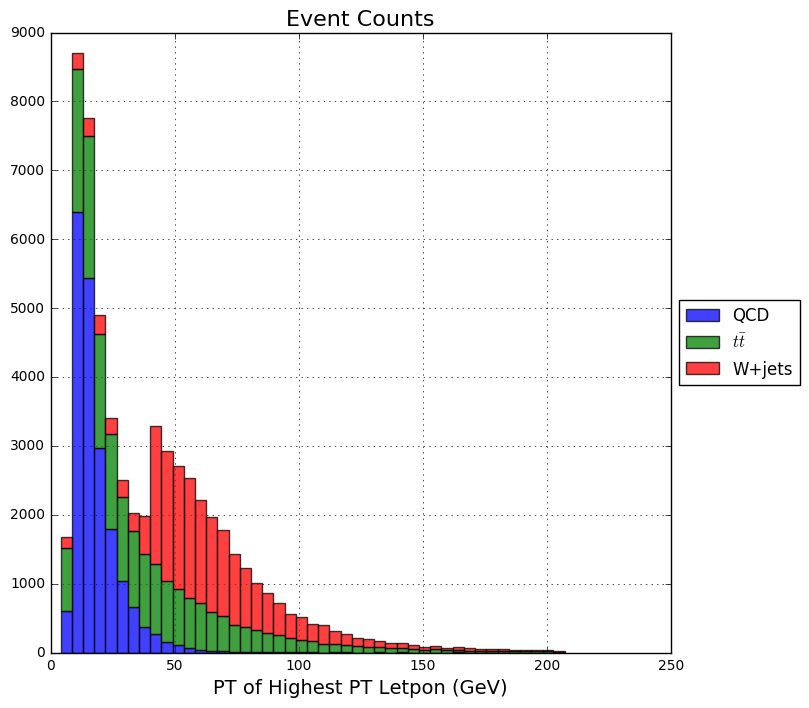

([{0: 17619, 1: 12292, 2: 19455}, {0: 2256, 1: 5979, 2: 515}, {0: 120, 1: 1470, 2: 29}, {0: 5, 1: 230, 2: 1}, {0: 0, 1: 26, 2: 0}], [0, 1, 2])
('QCD', 0, 'b')
[ 0.  0.  0.  0.  0.]
('$t\\bar{t}$', 1, 'g')
[  1.76190000e+04   2.25600000e+03   1.20000000e+02   5.00000000e+00
   0.00000000e+00]
('W+jets', 2, 'r')
[  2.99110000e+04   8.23500000e+03   1.59000000e+03   2.35000000e+02
   2.60000000e+01]


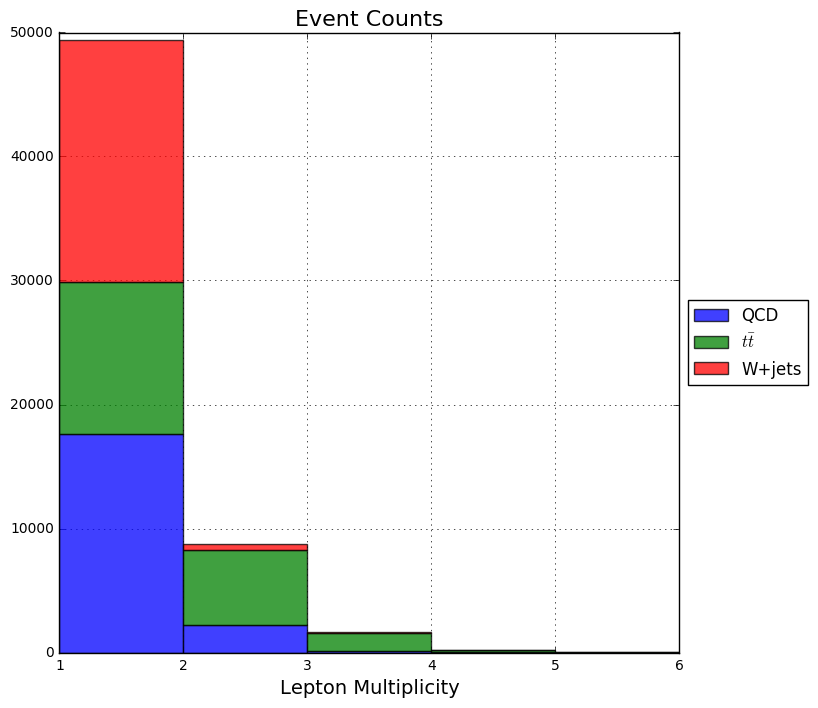

([{0: 671, 1: 178, 2: 277}, {0: 1674, 1: 529, 2: 715}, {0: 2382, 1: 795, 2: 1185}, {0: 2838, 1: 1021, 2: 1515}, {0: 2880, 1: 1132, 2: 1691}, {0: 2391, 1: 1272, 2: 1781}, {0: 2008, 1: 1242, 2: 1700}, {0: 1529, 1: 1239, 2: 1677}, {0: 1183, 1: 1126, 2: 1503}, {0: 796, 1: 1127, 2: 1311}, {0: 526, 1: 1002, 2: 1100}, {0: 375, 1: 927, 2: 911}, {0: 244, 1: 872, 2: 787}, {0: 158, 1: 788, 2: 628}, {0: 116, 1: 692, 2: 520}, {0: 92, 1: 637, 2: 399}, {0: 39, 1: 585, 2: 343}, {0: 27, 1: 533, 2: 271}, {0: 13, 1: 494, 2: 255}, {0: 15, 1: 401, 2: 203}, {0: 9, 1: 343, 2: 167}, {0: 4, 1: 297, 2: 148}, {0: 6, 1: 280, 2: 130}, {0: 3, 1: 264, 2: 101}, {0: 6, 1: 250, 2: 78}, {0: 5, 1: 198, 2: 86}, {0: 2, 1: 175, 2: 53}, {0: 1, 1: 166, 2: 58}, {0: 2, 1: 133, 2: 46}, {0: 1, 1: 132, 2: 39}, {0: 1, 1: 117, 2: 31}, {0: 0, 1: 92, 2: 31}, {0: 0, 1: 96, 2: 36}, {0: 0, 1: 78, 2: 24}, {0: 0, 1: 72, 2: 18}, {0: 0, 1: 56, 2: 20}, {0: 0, 1: 61, 2: 13}, {0: 0, 1: 60, 2: 11}, {0: 0, 1: 52, 2: 19}, {0: 0, 1: 41, 2: 11}, {0:

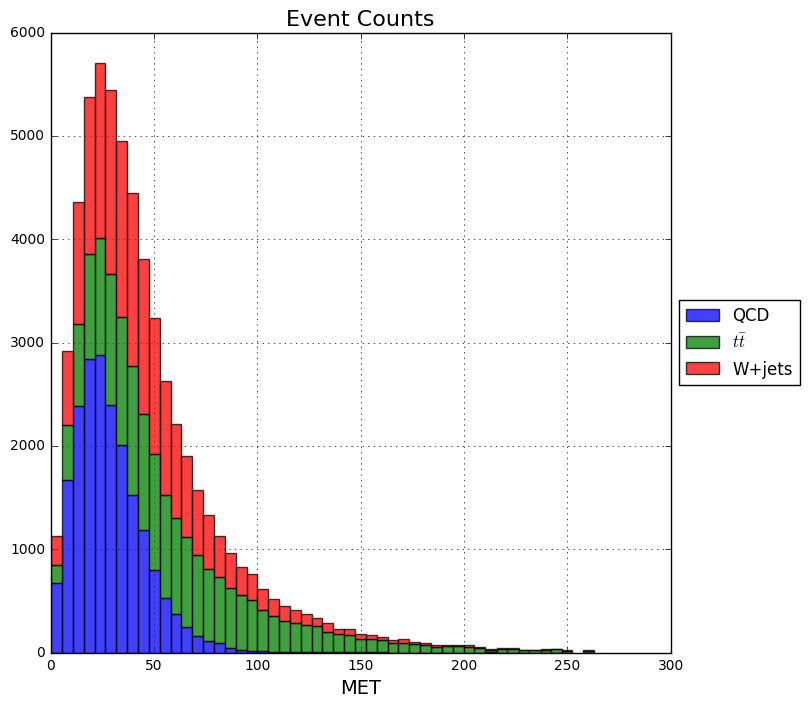

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [300]:
#print(lepPT_bins["QCD"][0])
plotBins(lepPT_bins, y_val="arg_max",mode='histo',ylim=None, binLabels = {val:key for key,val in label_indices.items()},
             xlabel="PT of Highest PT Letpon (GeV)",title="Event Counts",stack=True,
             min_samples=20,alpha=.75# ylabel="Event Proportion by Bin",
             )
plotBins(lepMul_bins, y_val="arg_max",mode='histo',ylim=None, binLabels = {val:key for key,val in label_indices.items()},
             xlabel="Lepton Multiplicity",title="Event Counts",stack=True,
             min_samples=20,alpha=.75# ylabel="Event Proportion by Bin",
             )
plotBins(MET_bins, y_val="arg_max",mode='histo',ylim=None, binLabels = {val:key for key,val in label_indices.items()},
             xlabel="MET",title="Event Counts",stack=True,
             min_samples=20,alpha=.75# ylabel="Event Proportion by Bin",
             )

([{0: 609, 1: 910, 2: 164}, {0: 6389, 1: 2080, 2: 240}, {0: 5433, 1: 2058, 2: 275}, {0: 2967, 1: 1657, 2: 273}, {0: 1796, 1: 1374, 2: 240}, {0: 1039, 1: 1224, 2: 238}, {0: 661, 1: 1099, 2: 262}, {0: 372, 1: 1052, 2: 564}, {0: 271, 1: 1016, 2: 1995}, {0: 153, 1: 885, 2: 1888}, {0: 111, 1: 809, 2: 1784}, {0: 64, 1: 724, 2: 1748}, {0: 37, 1: 678, 2: 1503}, {0: 24, 1: 557, 2: 1391}, {0: 21, 1: 512, 2: 1248}, {0: 14, 1: 386, 2: 1025}, {0: 8, 1: 361, 2: 857}, {0: 4, 1: 316, 2: 691}, {0: 7, 1: 280, 2: 577}, {0: 4, 1: 254, 2: 461}, {0: 3, 1: 201, 2: 362}, {0: 2, 1: 178, 2: 333}, {0: 3, 1: 167, 2: 244}, {0: 0, 1: 125, 2: 270}, {0: 2, 1: 116, 2: 197}, {0: 1, 1: 106, 2: 168}, {0: 0, 1: 93, 2: 112}, {0: 0, 1: 81, 2: 111}, {0: 2, 1: 76, 2: 83}, {0: 0, 1: 66, 2: 76}, {0: 2, 1: 62, 2: 69}, {0: 0, 1: 44, 2: 71}, {0: 0, 1: 33, 2: 50}, {0: 0, 1: 57, 2: 41}, {0: 0, 1: 32, 2: 36}, {0: 1, 1: 35, 2: 47}, {0: 0, 1: 25, 2: 38}, {0: 0, 1: 23, 2: 28}, {0: 0, 1: 25, 2: 28}, {0: 0, 1: 26, 2: 22}, {0: 0, 1: 17, 2:

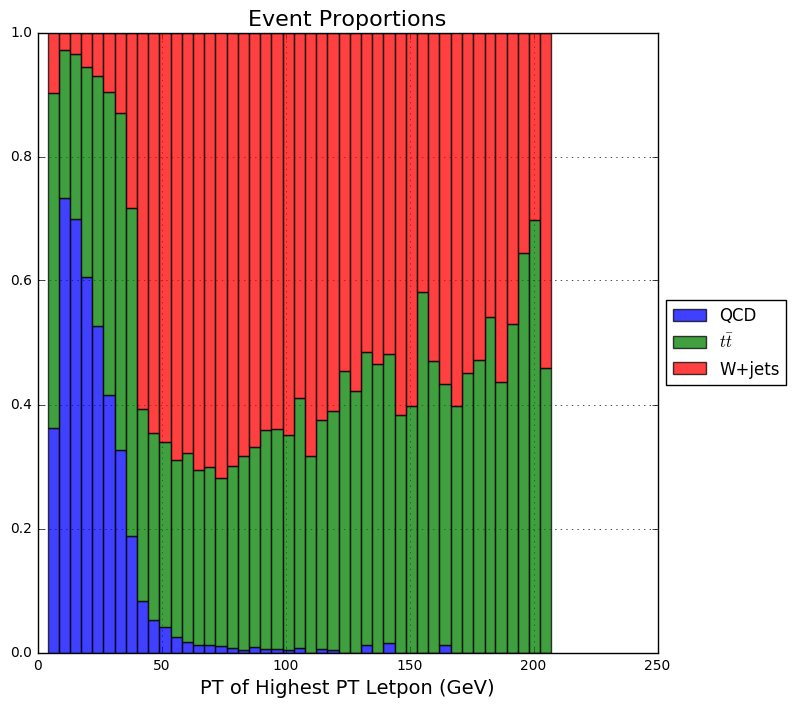

([{0: 17619, 1: 12292, 2: 19455}, {0: 2256, 1: 5979, 2: 515}, {0: 120, 1: 1470, 2: 29}, {0: 5, 1: 230, 2: 1}, {0: 0, 1: 26, 2: 0}], [0, 1, 2])
('QCD', 0, 'b')
[ 0.  0.  0.  0.  0.]
('$t\\bar{t}$', 1, 'g')
[ 0.35690556  0.25782857  0.07411983  0.02118644  0.        ]
('W+jets', 2, 'r')
[ 0.60590285  0.94114286  0.98208771  0.99576271  1.        ]


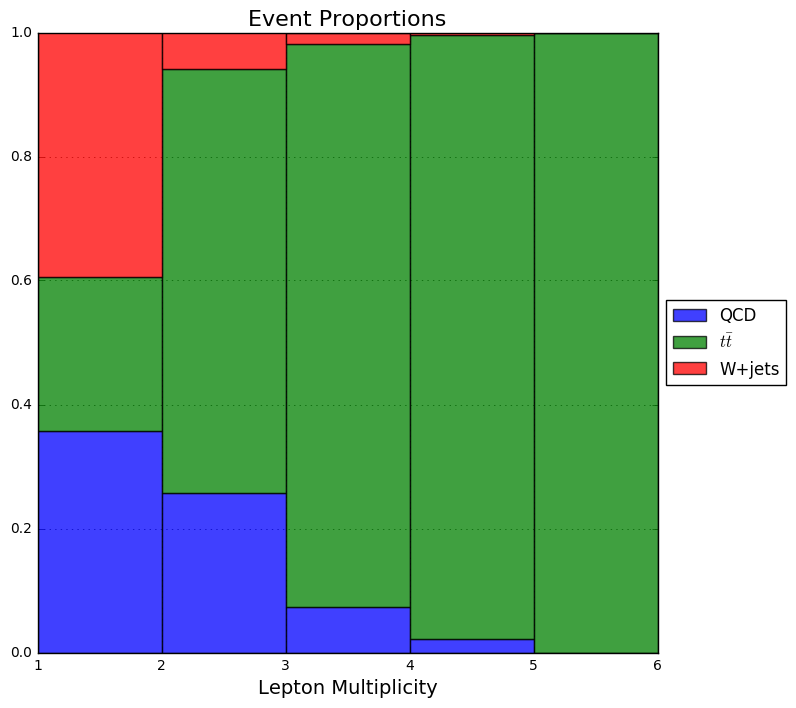

([{0: 671, 1: 178, 2: 277}, {0: 1674, 1: 529, 2: 715}, {0: 2382, 1: 795, 2: 1185}, {0: 2838, 1: 1021, 2: 1515}, {0: 2880, 1: 1132, 2: 1691}, {0: 2391, 1: 1272, 2: 1781}, {0: 2008, 1: 1242, 2: 1700}, {0: 1529, 1: 1239, 2: 1677}, {0: 1183, 1: 1126, 2: 1503}, {0: 796, 1: 1127, 2: 1311}, {0: 526, 1: 1002, 2: 1100}, {0: 375, 1: 927, 2: 911}, {0: 244, 1: 872, 2: 787}, {0: 158, 1: 788, 2: 628}, {0: 116, 1: 692, 2: 520}, {0: 92, 1: 637, 2: 399}, {0: 39, 1: 585, 2: 343}, {0: 27, 1: 533, 2: 271}, {0: 13, 1: 494, 2: 255}, {0: 15, 1: 401, 2: 203}, {0: 9, 1: 343, 2: 167}, {0: 4, 1: 297, 2: 148}, {0: 6, 1: 280, 2: 130}, {0: 3, 1: 264, 2: 101}, {0: 6, 1: 250, 2: 78}, {0: 5, 1: 198, 2: 86}, {0: 2, 1: 175, 2: 53}, {0: 1, 1: 166, 2: 58}, {0: 2, 1: 133, 2: 46}, {0: 1, 1: 132, 2: 39}, {0: 1, 1: 117, 2: 31}, {0: 0, 1: 92, 2: 31}, {0: 0, 1: 96, 2: 36}, {0: 0, 1: 78, 2: 24}, {0: 0, 1: 72, 2: 18}, {0: 0, 1: 56, 2: 20}, {0: 0, 1: 61, 2: 13}, {0: 0, 1: 60, 2: 11}, {0: 0, 1: 52, 2: 19}, {0: 0, 1: 41, 2: 11}, {0:

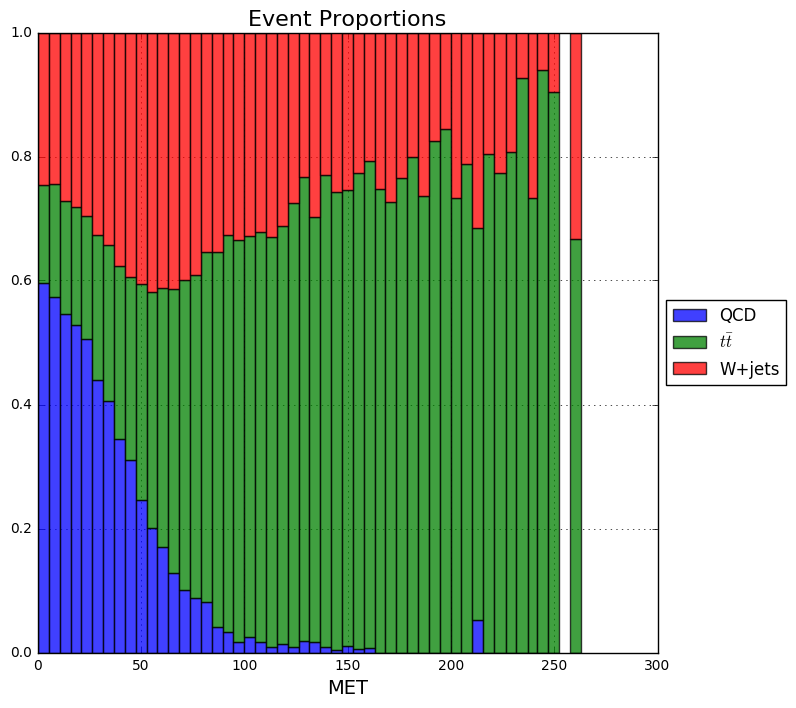

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [299]:
#print(lepPT_bins["QCD"][0])
plotBins(lepPT_bins, y_val="arg_max",mode='histo',ylim=None, binLabels = {val:key for key,val in label_indices.items()},
             xlabel="PT of Highest PT Letpon (GeV)",title="Event Proportions",stack=True,normalize=True,
             min_samples=20,alpha=.75# ylabel="Event Proportion by Bin",
             )
plotBins(lepMul_bins, y_val="arg_max",mode='histo',ylim=None, binLabels = {val:key for key,val in label_indices.items()},
             xlabel="Lepton Multiplicity",title="Event Proportions",stack=True,normalize=True,
             min_samples=20,alpha=.75# ylabel="Event Proportion by Bin",
             )
plotBins(MET_bins, y_val="arg_max",mode='histo',ylim=None, binLabels = {val:key for key,val in label_indices.items()},
             xlabel="MET",title="Event Proportions",stack=True,normalize=True,
             min_samples=20,alpha=.75# ylabel="Event Proportion by Bin",
             )

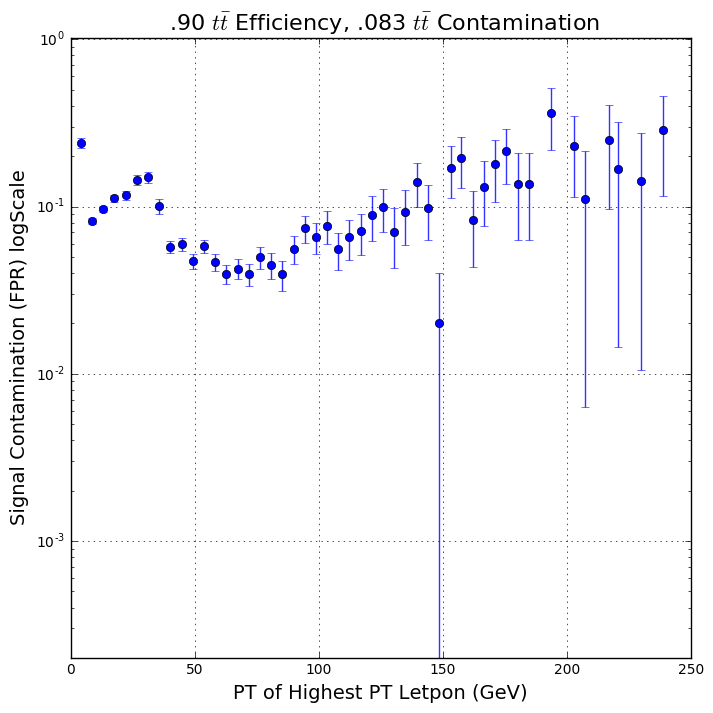

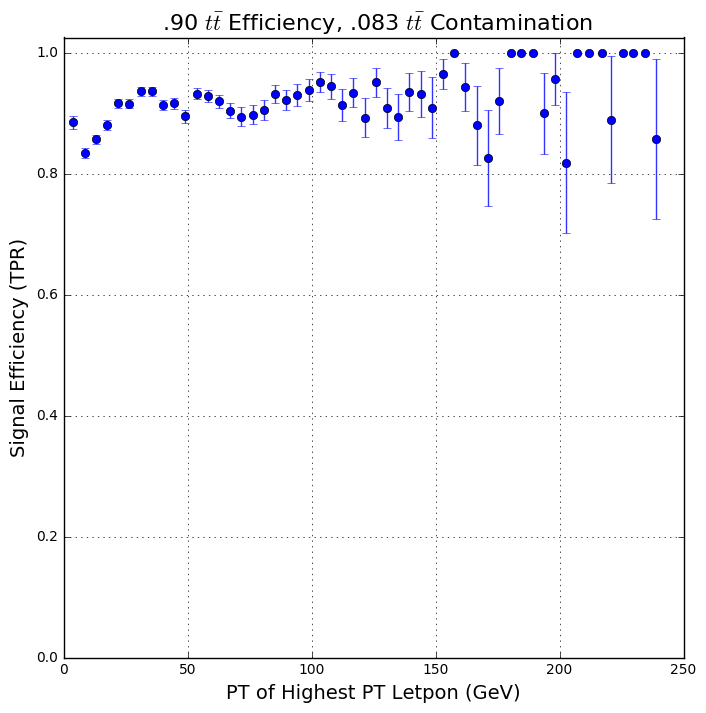

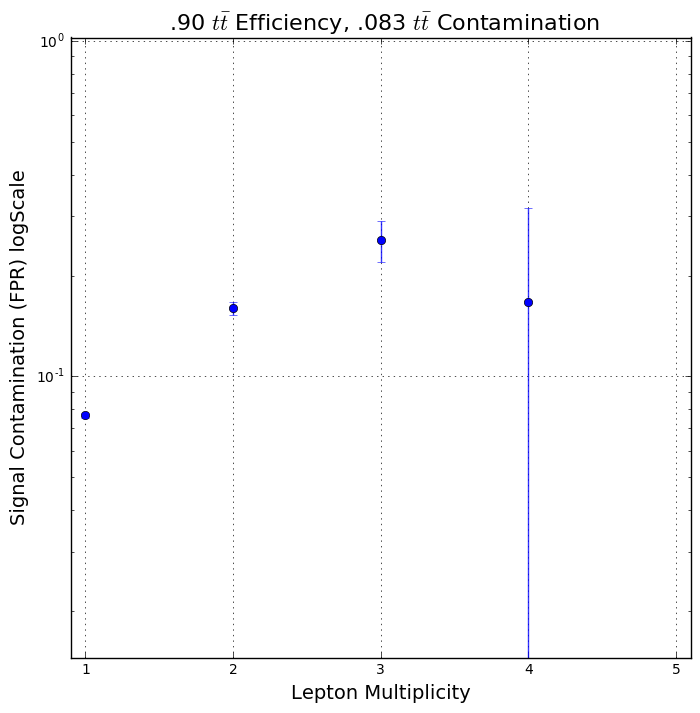

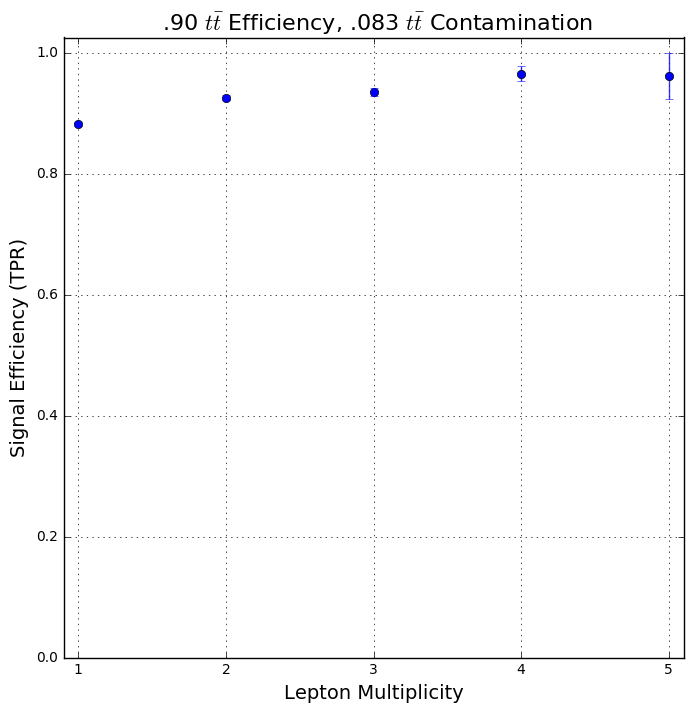

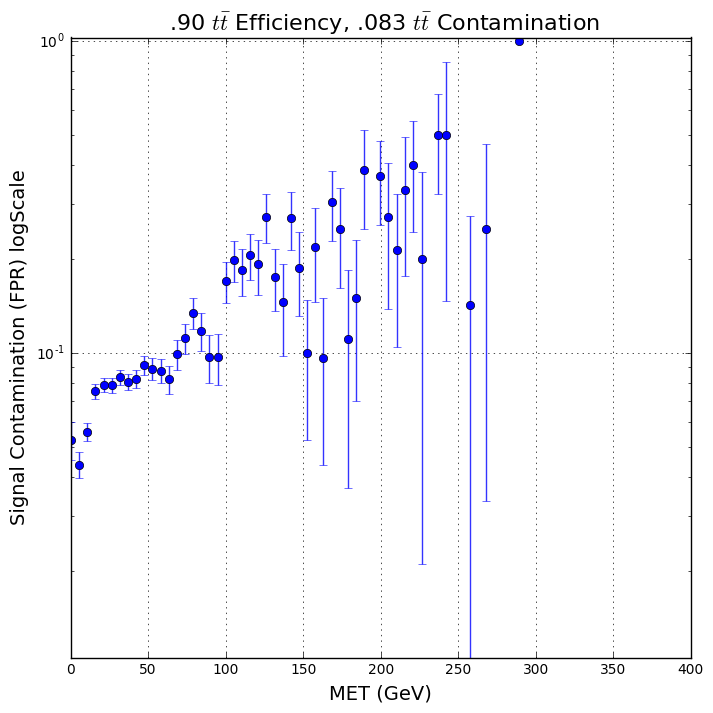

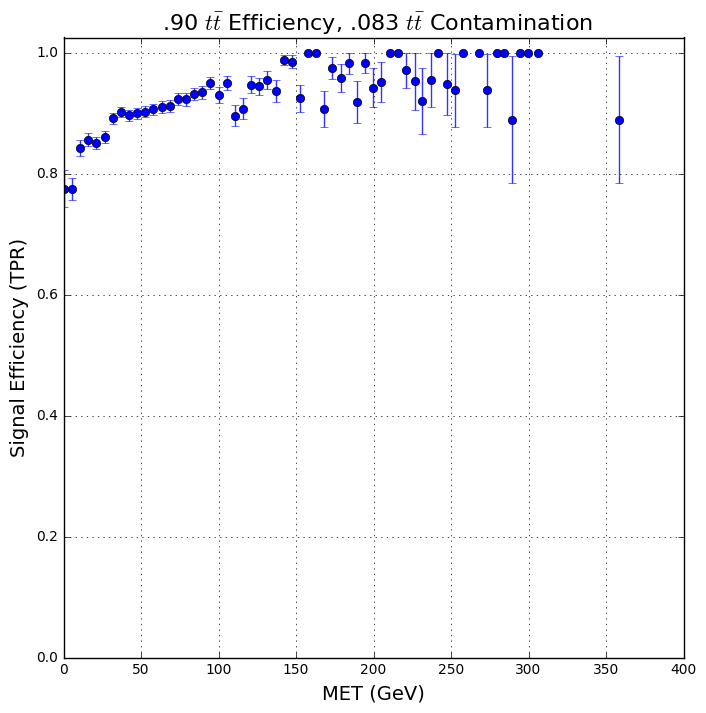

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [231]:
title =  r" .90 $t\bar{t}$ Efficiency, .083 $t\bar{t}$ Contamination"# % (thresh, ttbar_cont)
thresh = 0.363
plotBins(lepPT_bins[r'$t\bar{t}$'], y_val="fpr", log=True,
             xlabel="PT of Highest PT Letpon (GeV)", ylabel="Signal Contamination (FPR) logScale",mode='scatter',
             title= title)
plotBins(lepPT_bins[r'$t\bar{t}$'], y_val="tpr", log=False,
         xlabel="PT of Highest PT Letpon (GeV)", ylabel="Signal Efficiency (TPR)",mode='scatter',
         title= title)

plotBins(lepMul_bins[r'$t\bar{t}$'],y_val="fpr",log=True, xlim=[.9,5.1],
             xlabel="Lepton Multiplicity", ylabel="Signal Contamination (FPR) logScale",mode='scatter',
             title= title)
plotBins(lepMul_bins[r'$t\bar{t}$'],y_val="tpr",log=False, xlim=[.9,5.1],
         xlabel="Lepton Multiplicity", ylabel="Signal Efficiency (TPR)",mode='scatter',
         title= title)

plotBins(MET_bins[r'$t\bar{t}$'], y_val="fpr", log=True,
             xlabel="MET (GeV)", ylabel="Signal Contamination (FPR) logScale",mode='scatter',
             title= title)
plotBins(MET_bins[r'$t\bar{t}$'], y_val="tpr", log=False,
         xlabel="MET (GeV)", ylabel="Signal Efficiency (TPR)",mode='scatter',
         title= title)

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)


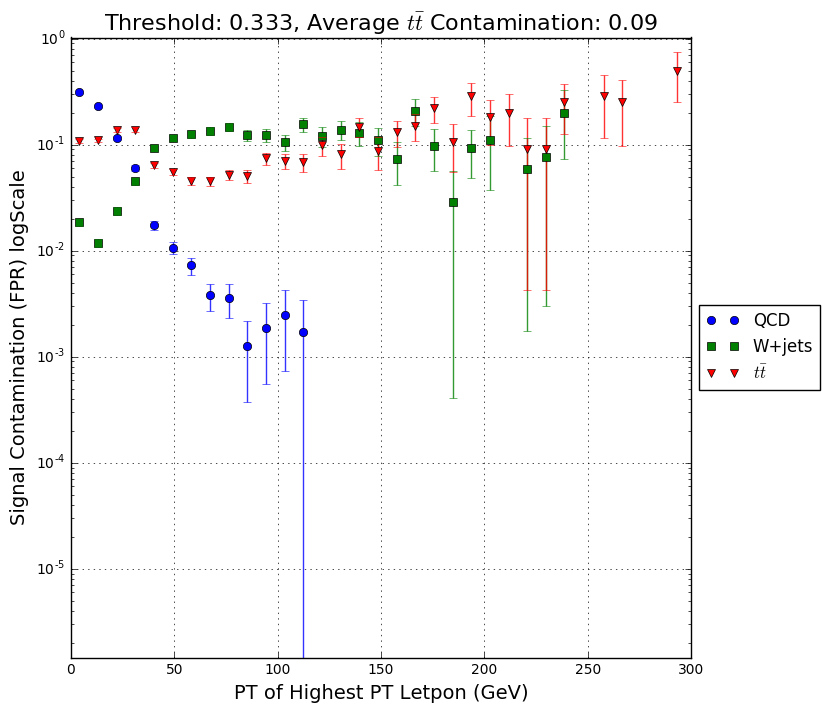

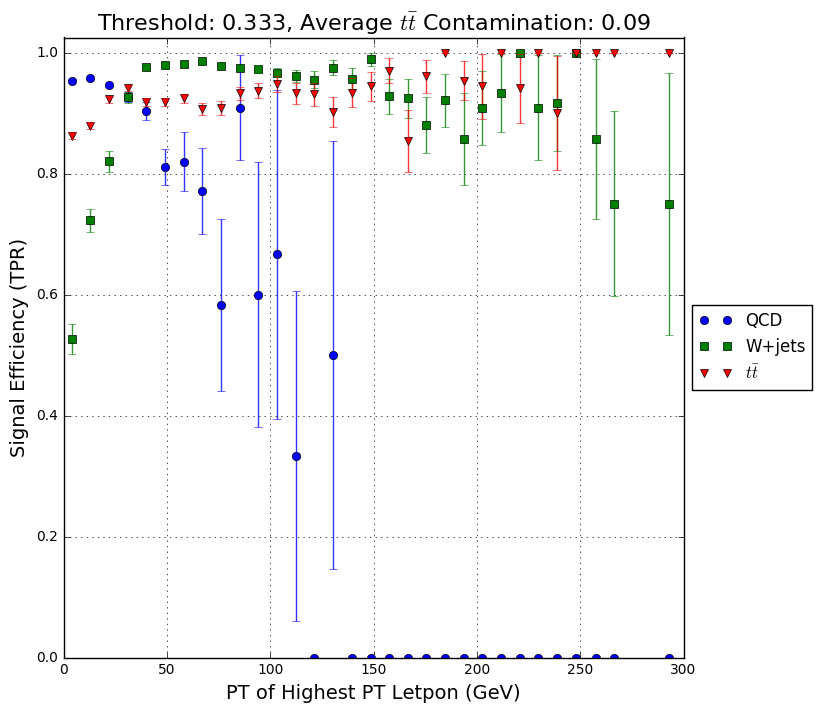

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)


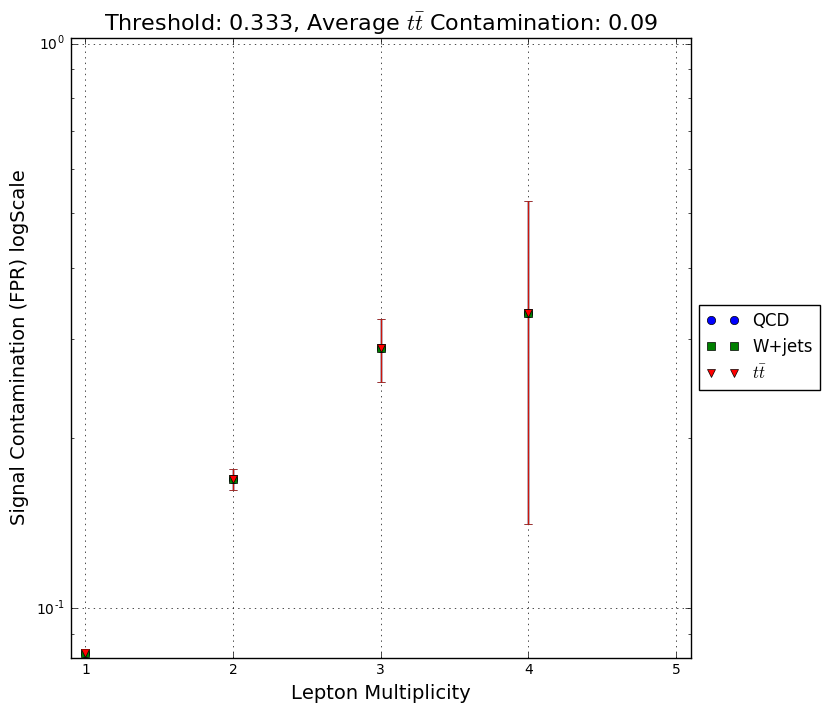

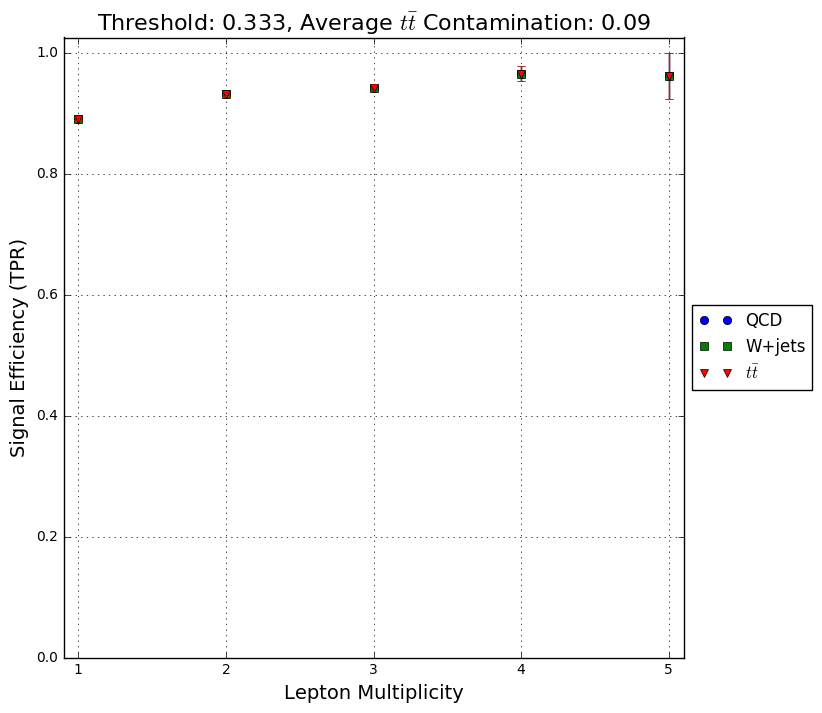

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)


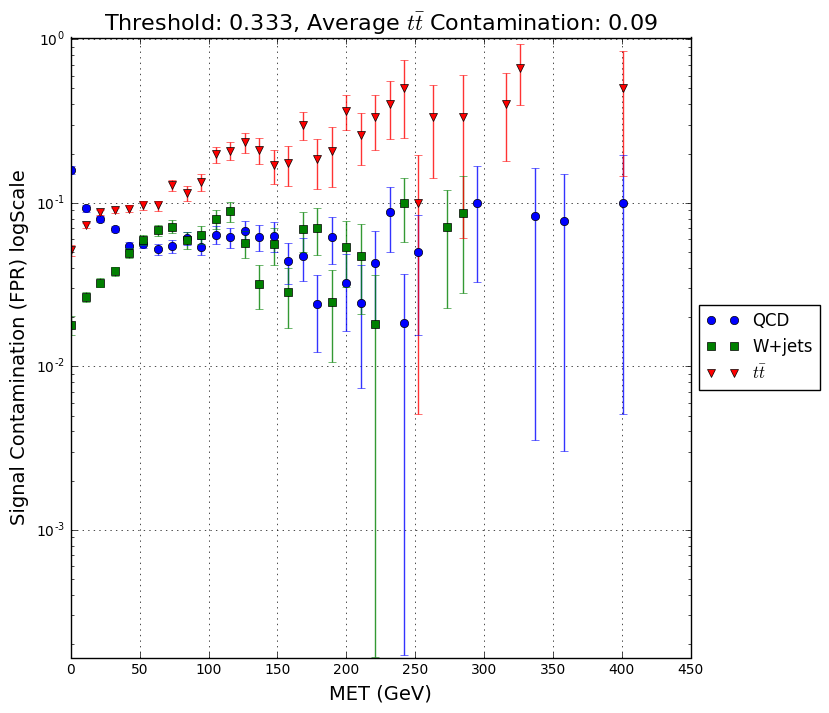

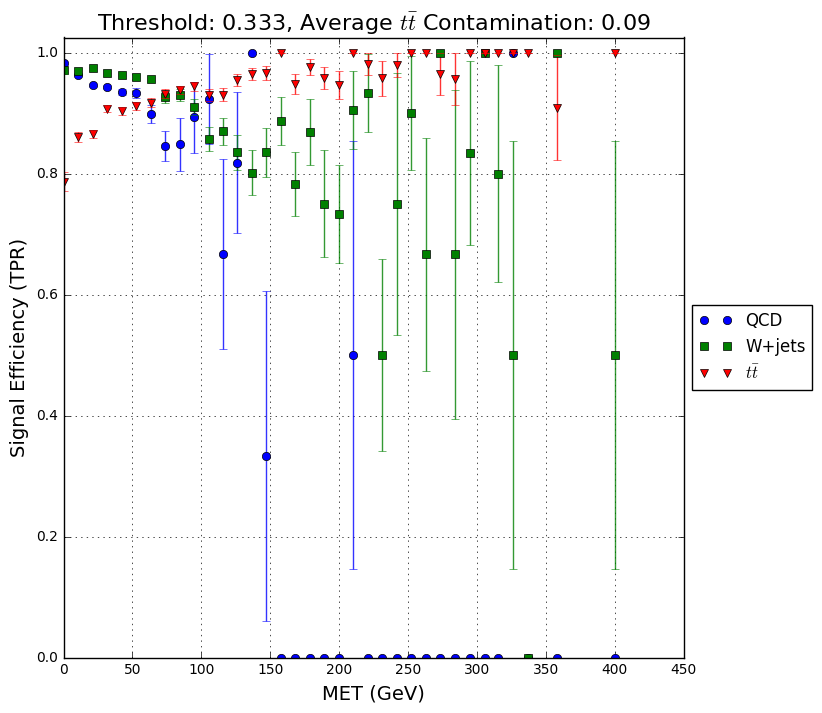

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)


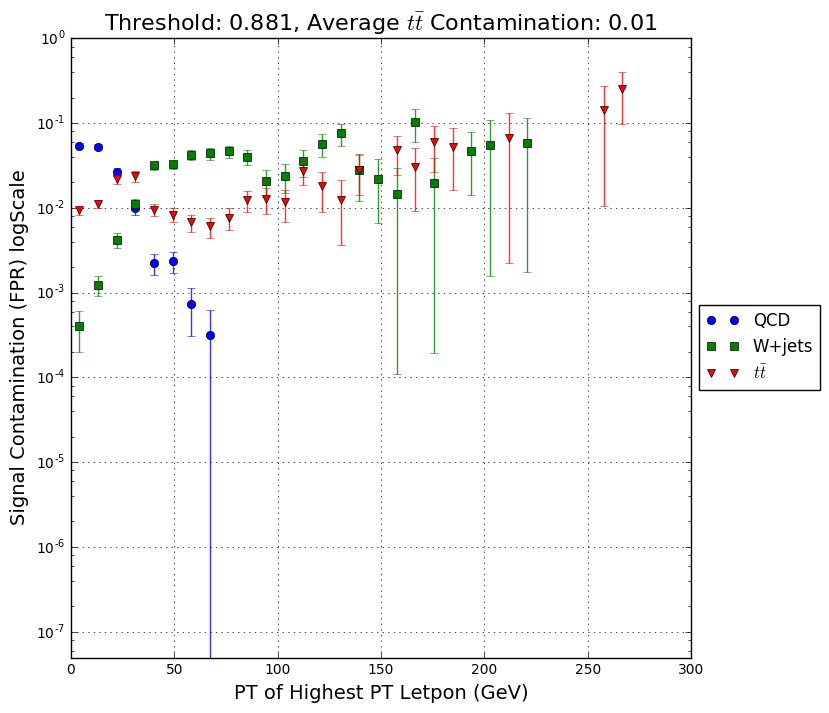

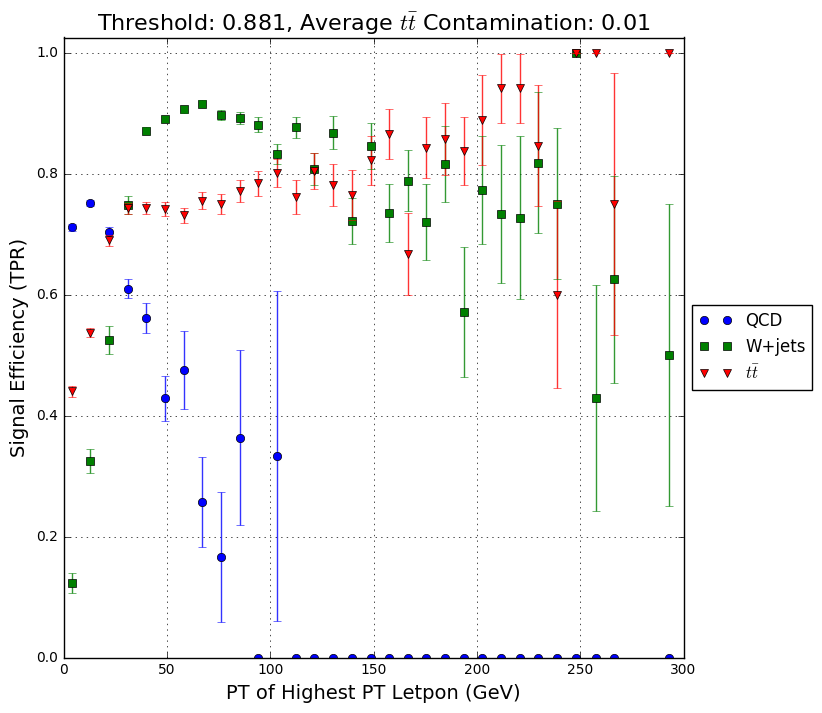

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)


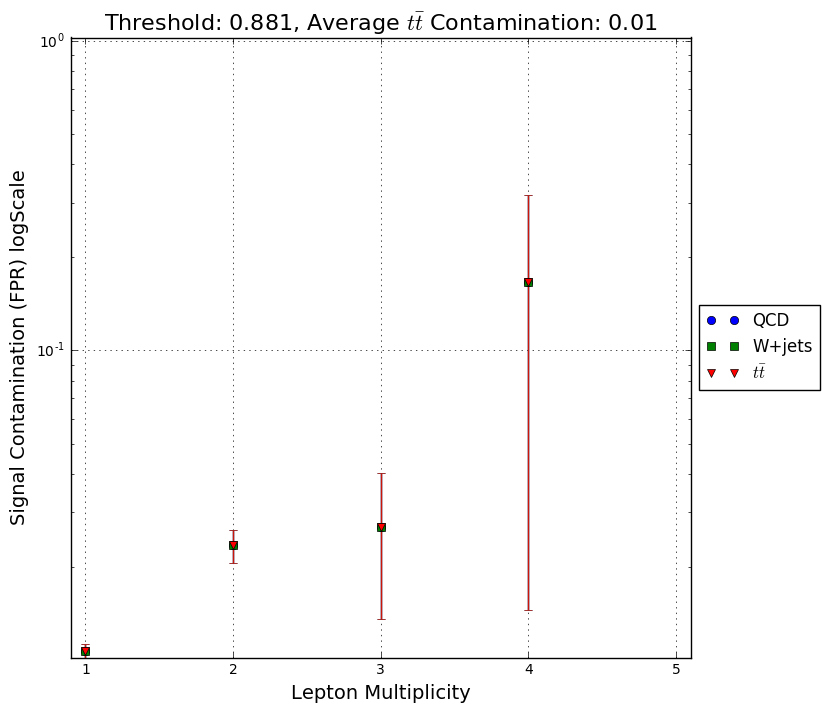

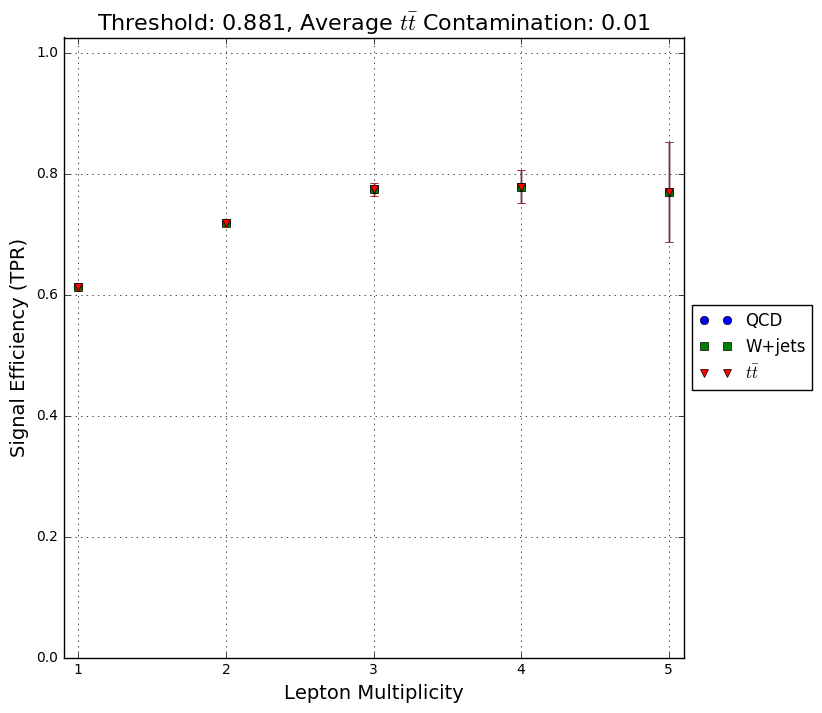

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)


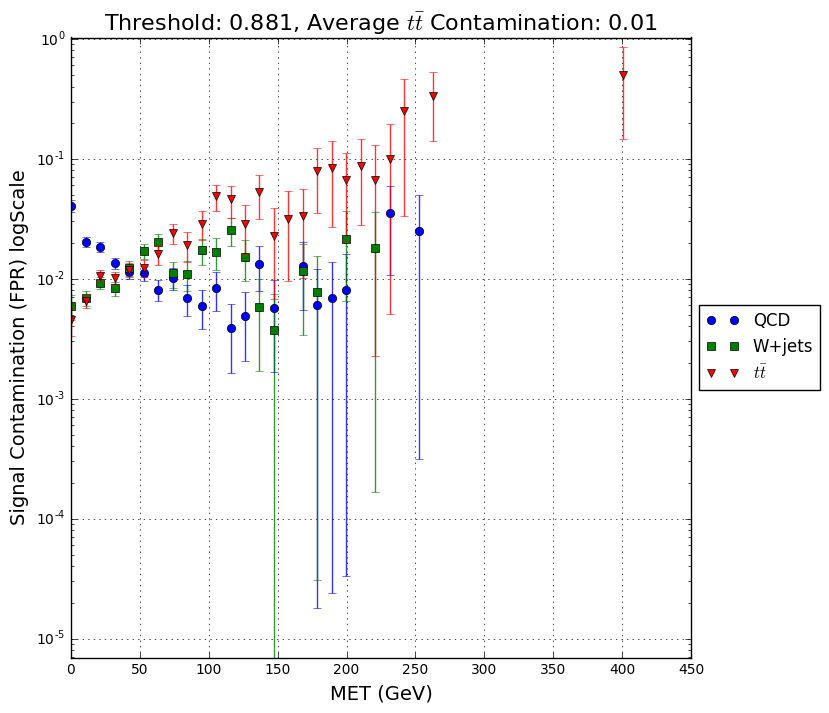

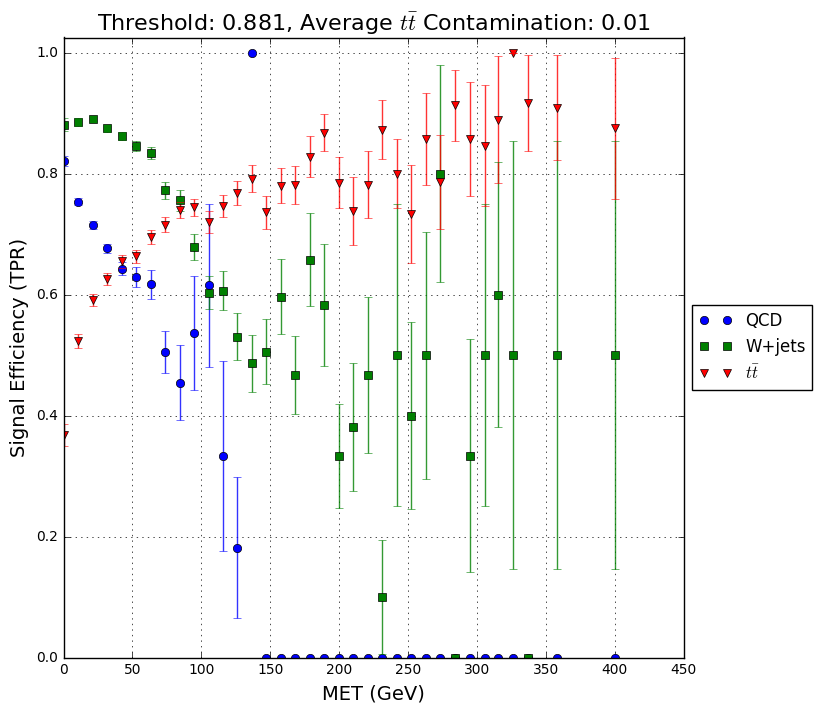

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 4.0127182006835938, 906.97796630859375)


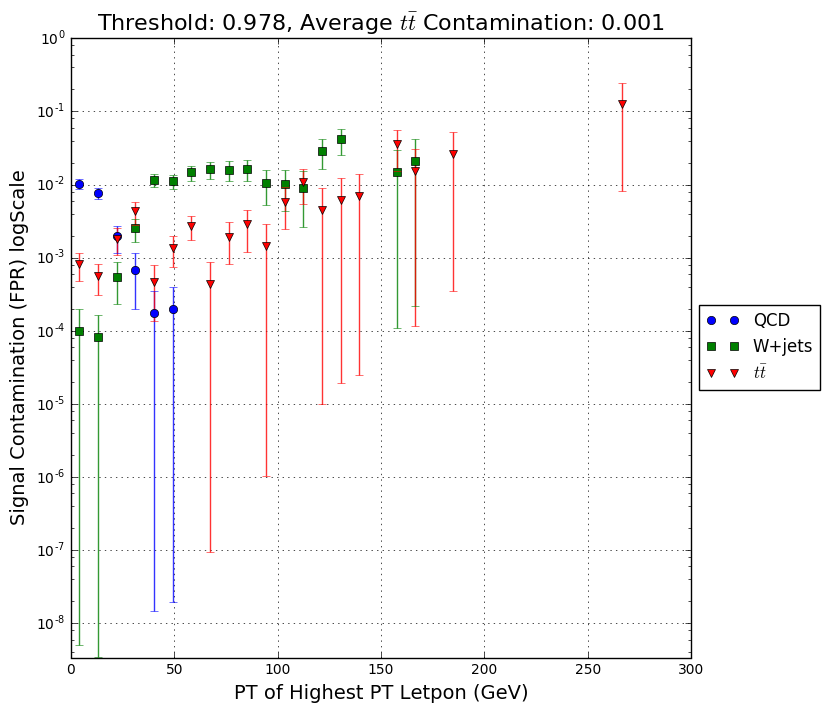

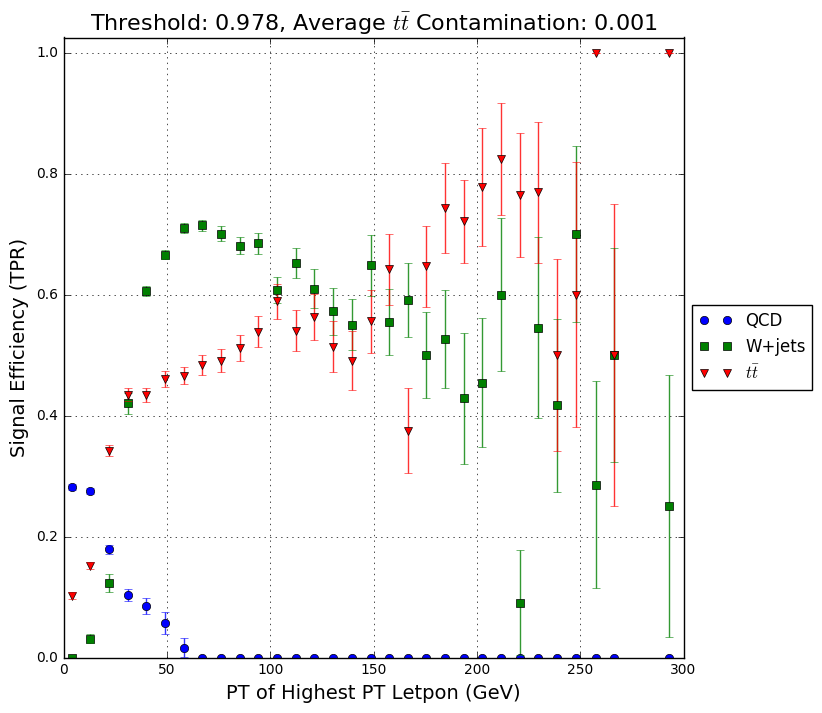

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 1.0, 7.0)


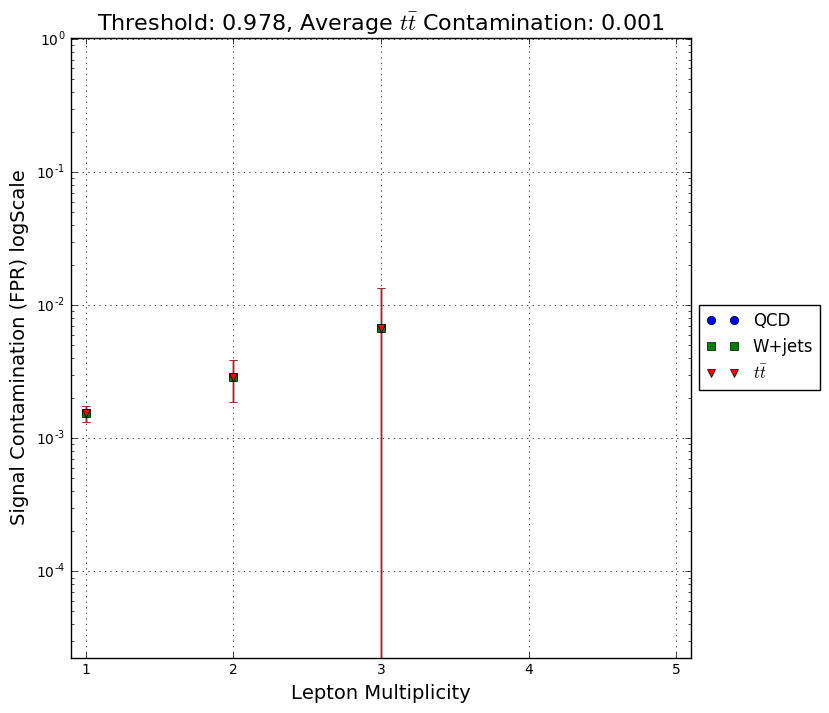

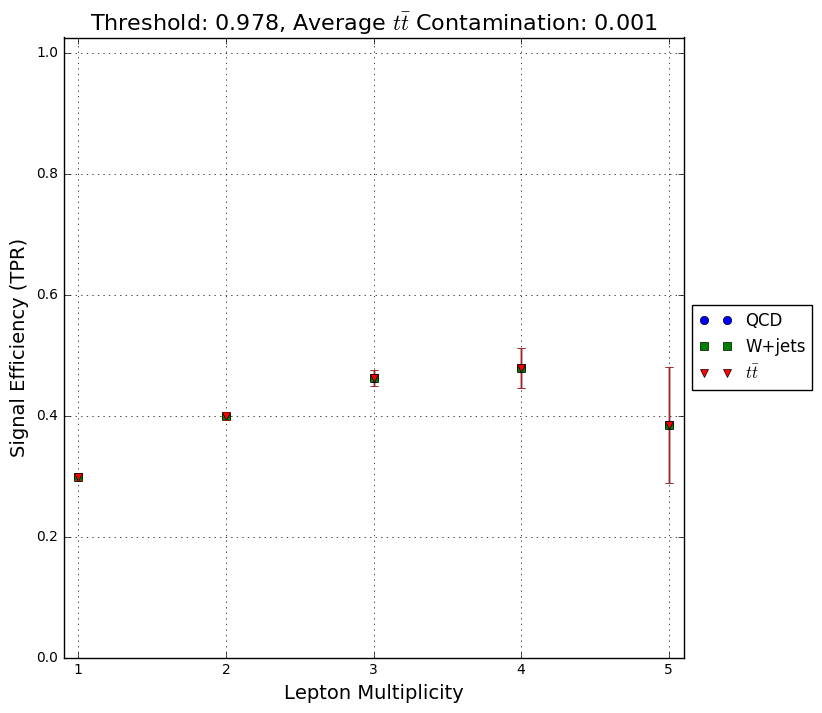

DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)
DataProcedure results '76312ef7a2aa09d5f0a801e9981a896a74b34322' read from archive
('MIN:MAX:', 0.24389618635177612, 1050.46240234375)


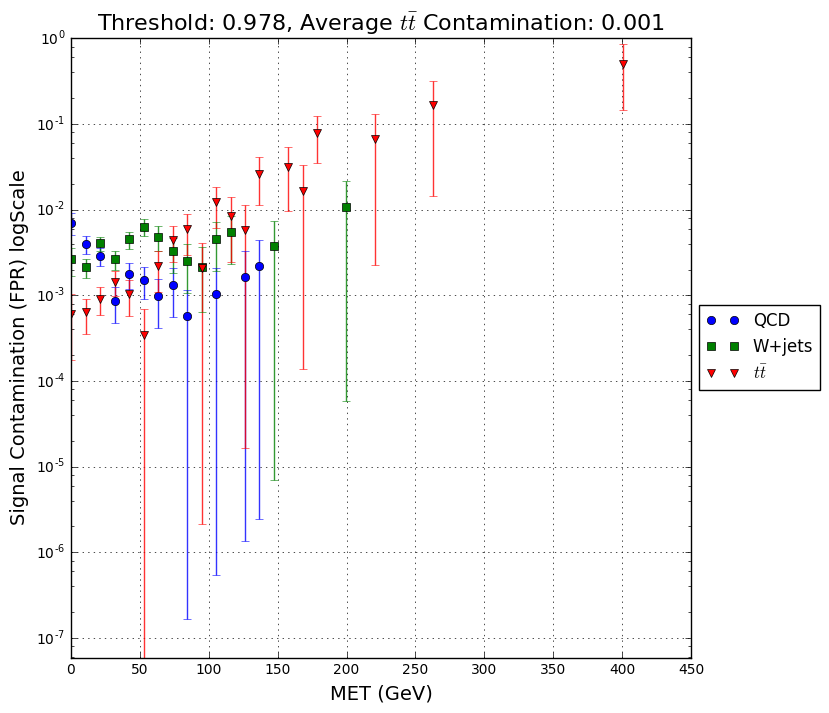

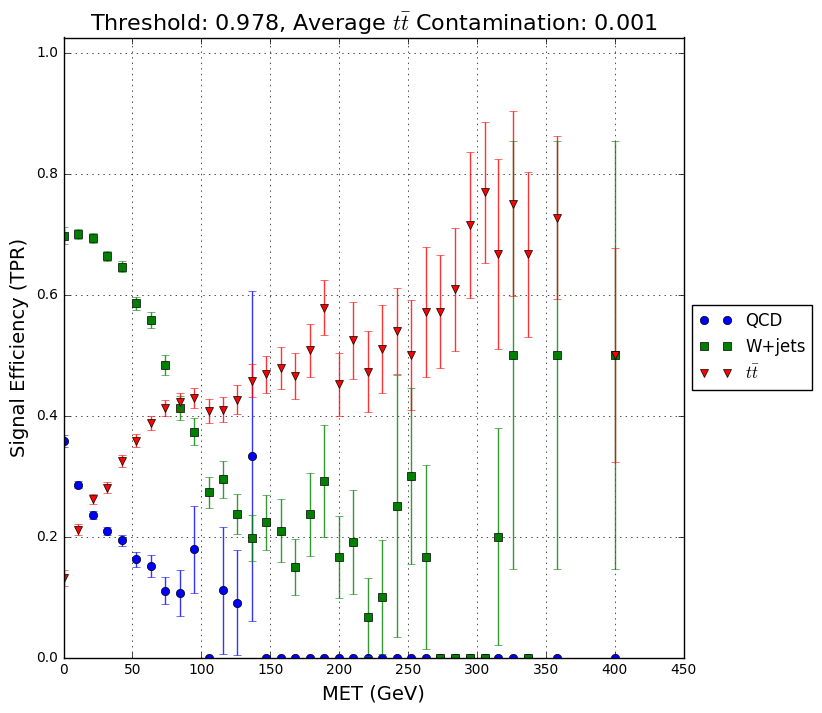

In [80]:
for thresh,ttbar_cont in [(.333,0.090), (0.881,.01), (0.978,.001)]:
    lepPT_bins = {label:accVsEventChar(model,np.max, "PT_ET",
                              [{"ObjFt1": -1, "ObjFt2": 1,"ObjFt3": 1}, {"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": -1}],
                              true_class_index=inx,char2=np.max, threshold=thresh,bins=100) for label,inx in label_indices.items()}
    title = r"Threshold: %r, Average $t\bar{t}$ Contamination: %r" % (thresh, ttbar_cont)
    plotBins(lepPT_bins, y_val="fpr", log=True,
             xlabel="PT of Highest PT Letpon (GeV)", ylabel="Signal Contamination (FPR) logScale",mode='scatter',
             title= title)
    plotBins(lepPT_bins, y_val="tpr", log=False,
             xlabel="PT of Highest PT Letpon (GeV)", ylabel="Signal Efficiency (TPR)",mode='scatter',
             title= title)

    lepMul_bins = {label:accVsEventChar(model,lambda x,**kargs:np.sum((x>0.0).astype('float'),**kargs), "PT_ET",
                              [{"ObjFt1": -1, "ObjFt2": 1,"ObjFt3": 1}, {"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": -1}],
                              true_class_index=1,char2=np.sum, threshold=thresh,bins=7) for label,inx in label_indices.items()}

    plotBins(lepMul_bins,y_val="fpr",log=True, xlim=[.9,5.1],
             xlabel="Lepton Multiplicity", ylabel="Signal Contamination (FPR) logScale",mode='scatter',
             title= title)
    plotBins(lepMul_bins,y_val="tpr",log=False, xlim=[.9,5.1],
             xlabel="Lepton Multiplicity", ylabel="Signal Efficiency (TPR)",mode='scatter',
             title= title)

    MET_bins = {label:accVsEventChar(model,np.sum, "PT_ET",
                              [{"ObjFt1": 1, "ObjFt2": -1,"ObjFt3": 1}],
                              true_class_index=inx,char2=np.sum, threshold=thresh,bins=100)
                 for label,inx in label_indices.items()}
    plotBins(MET_bins, y_val="fpr", log=True,
             xlabel="MET (GeV)", ylabel="Signal Contamination (FPR) logScale",mode='scatter',
             title= title)
    plotBins(MET_bins, y_val="tpr", log=False,
             xlabel="MET (GeV)", ylabel="Signal Efficiency (TPR)",mode='scatter',
             title= title)

In [ ]:
qw = KerasTrial.find(archive_dir, "f85c79c471f0770626de7f8f3fee8e7c21ad452a")
plot_roc_curve(qw,true_index=1, title="ROC: qcd vs wjet, sorting: %r, val_acc %r" \
               % tuple(qw.get_from_record(["sort_on", "val_acc"])))

qwt = KerasTrial.find(archive_dir, "de5187a4f9bdac08150809ecce4ebcce087c7f2f")
plot_roc_curve(qwt,true_index=1, title="ROC: qcd vs wjet vs ttbar, sorting: %r, val_acc %r" \
               % tuple(qwt.get_from_record(["sort_on", "val_acc"])))

qt = KerasTrial.find(archive_dir, "d1e80f9b6b7e946b32a7a0de88145bb2218e1a3c")
plot_roc_curve(qt,true_index=1, title="ROC: qcd vs ttbar, sorting: %r, val_acc %r" \
               % tuple(qt.get_from_record(["sort_on", "val_acc"])))



In [9]:
trial = KerasTrial.find(archive_dir, "0aa6d13eae788399b682762ac0b67e0cab595d01")

trial.output_as_dir("/bigdata/shared/Delphes/jr_simple_out")            


KeyboardInterrupt: 

In [3]:
print_by_labels(trials, 4)



 Classification: ('qcd', 'wjet') 'Top 4 trials'
--------------------------------------------------
TRIAL SUMMARY (b701497e5b5f3775951d0e8524263659f22d553c)
    Record_Info:
        name = ["LSTM"], elapse_time = 5:19:04, last_epoch = 28, start_time = "02-26-2017 20:17:50 PST-PDT"
        val_acc = 0.9949
        num_train = 200000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "wjet"], lstm_dropout = 0.0, num_val = 40000, output_activation = "softmax", patience = 8, query = null, single_list = true, sort_ascending = true, sort_on = "PT_ET"
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (683b78e7b026997e679d1a4c31f7ec2f84f272c2)
    Record_Info:
        name = ["LSTM"], elapse_time = 5:10:14, last_epoch = 27, start_time = "03-01-2017 04:57:36 PST-PDT"
        val_acc = 0.9939
        num_train = 200000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "wjet"], lstm_dropo

In [4]:
#trial = KerasTrial.find_by_hashcode(archive_dir,"d2fd2c62cbe832d33fbe1a0f313850836f76bbc5")

#tr =TrialIterator(trial, return_X=False, return_Y=True,return_prediction=True)
#y,predictions = tr.asList()

DataProcedure results 'c8f4291c38002b369015ab9541a80aec1ea8b62a' read from archive
DataProcedure results 'c8f4291c38002b369015ab9541a80aec1ea8b62a' read from archive
(2052, None)
DataProcedure results 'ccf2c75d699b17e8b7dd3377354d5a36bee0941c' read from archive
(4104, None)
DataProcedure results '495693ce6b487e0471da35533593fbfb73a04b5a' read from archive
(6156, None)
DataProcedure results '6a7238c59864bf76d1bee31d5335f7af67c8bbfd' read from archive
(8208, None)
DataProcedure results '89725788466375bd6dedfeb3e8b4254b21705cd5' read from archive
(10260, None)
DataProcedure results 'b033ce05aa808dfb58e62676a29b5aa7834a777d' read from archive
(12312, None)
DataProcedure results 'b41c62911c7d72a4e5e74818501b22db11f02ca6' read from archive
(14364, None)
DataProcedure results '313b6df086155f44835db48385028d97a7ad4336' read from archive
(16416, None)
DataProcedure results 'c4e2659539ed20c33142121f2eec306f94b90bbd' read from archive
(18468, None)
DataProcedure results '7683dcd11f494295fdd86c39f

In [2]:
best_qcd_wjet =  KerasTrial.find_by_hashcode(archive_dir,"b701497e5b5f3775951d0e8524263659f22d553c")
best_ttbar_wjet =  KerasTrial.find_by_hashcode(archive_dir,"73f08cfb0545edb69ab086bfc0087d181034e0c5")
best_qcd_ttbar =  KerasTrial.find_by_hashcode(archive_dir,"d2fd2c62cbe832d33fbe1a0f313850836f76bbc5")
best_qcd_ttbar_wjet =  KerasTrial.find_by_hashcode(archive_dir,"9c00977ef8e932f946f10318a3f1e30f84ecb2b0")

DataProcedure results 'ee9dd35a906860062672731b1f39577ba3d278fa' read from archive
DataProcedure results 'ee9dd35a906860062672731b1f39577ba3d278fa' read from archive
(2052, None)
DataProcedure results 'aa037d647acddd5622c05d952a5771a379174a8e' read from archive
(4104, None)
DataProcedure results 'c04fd3ddf832dd5993c54349b5c58ba4918dbf1e' read from archive
(6156, None)
DataProcedure results 'fd4b2a783639dc6631246694c9d33c47e0f6781a' read from archive
(8208, None)
DataProcedure results '32edbb5a1302d135631d8b5dbb992f5afa079fe4' read from archive
(10260, None)
DataProcedure results 'a3927860b7440cfcbd0ce480a3ba39d068c7e822' read from archive
(12312, None)
DataProcedure results '897525a7f2a5cba5b470569fa2af6d429f1392df' read from archive
(14364, None)
DataProcedure results 'c6cd65e710755225aa071659aaae2633340d97c1' read from archive
(16416, None)
DataProcedure results '855ab5980475e44d22fef2773f31b95a3009f66c' read from archive
(18468, None)
DataProcedure results '0e60c3c21e99f7c6d61e13206

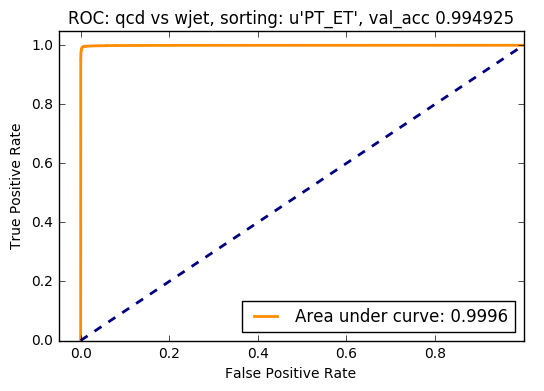

DataProcedure results '14db18e8c49ebdd8c7675a141eb45caa97bd87aa' read from archive
DataProcedure results '14db18e8c49ebdd8c7675a141eb45caa97bd87aa' read from archive
(2052, None)
DataProcedure results '0fde139bbc43c56aae961aa2d4a1aabeaca8c59f' read from archive
(4104, None)
DataProcedure results '31de5f074b19da151180333abdd4bd4ccfff773d' read from archive
(6156, None)
DataProcedure results 'dfd5b5c54c11d3375a9a6cd3d3b1685c25323bc9' read from archive
(8208, None)
DataProcedure results '8b0d721c0ca9483130e389b7a4faf727cd1b5511' read from archive
(10260, None)
DataProcedure results '75c72a0100a06f2336d16ba7d1f2ed6e15219543' read from archive
(12312, None)
DataProcedure results '56386ca324cd4333a99cfdbc48b496c601765e6d' read from archive
(14364, None)
DataProcedure results 'f13e3d2eb5872fdb4b0e8a55745d726063dd15e8' read from archive
(16416, None)
DataProcedure results '5c2969d68e10fbde0223b913c0da2365d40133ae' read from archive
(18468, None)
DataProcedure results 'e4779354cf714f33e994c762b

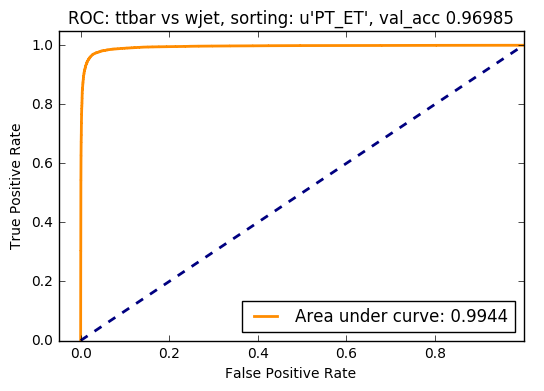

DataProcedure results 'c8f4291c38002b369015ab9541a80aec1ea8b62a' read from archive
DataProcedure results 'c8f4291c38002b369015ab9541a80aec1ea8b62a' read from archive
(2052, None)
DataProcedure results 'ccf2c75d699b17e8b7dd3377354d5a36bee0941c' read from archive
(4104, None)
DataProcedure results '495693ce6b487e0471da35533593fbfb73a04b5a' read from archive
(6156, None)
DataProcedure results '6a7238c59864bf76d1bee31d5335f7af67c8bbfd' read from archive
(8208, None)
DataProcedure results '89725788466375bd6dedfeb3e8b4254b21705cd5' read from archive
(10260, None)
DataProcedure results 'b033ce05aa808dfb58e62676a29b5aa7834a777d' read from archive
(12312, None)
DataProcedure results 'b41c62911c7d72a4e5e74818501b22db11f02ca6' read from archive
(14364, None)
DataProcedure results '313b6df086155f44835db48385028d97a7ad4336' read from archive
(16416, None)
DataProcedure results 'c4e2659539ed20c33142121f2eec306f94b90bbd' read from archive
(18468, None)
DataProcedure results '7683dcd11f494295fdd86c39f

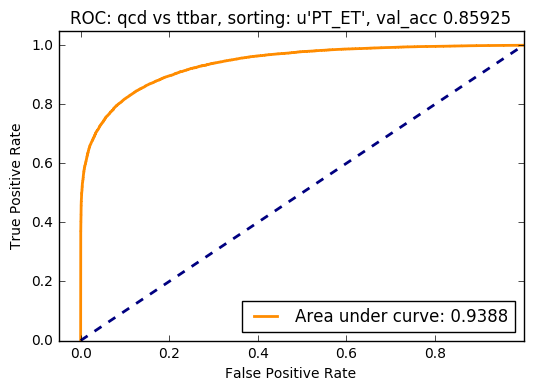

DataProcedure results '514d7de178831b09ff5e4e2220422fe6b6c9a9d9' read from archive
DataProcedure results '514d7de178831b09ff5e4e2220422fe6b6c9a9d9' read from archive
(3078, None)
DataProcedure results '2f6141d869c14b825765f2aa0f7a28c9e384d86b' read from archive
(6156, None)
DataProcedure results '188b626236b1ec1350ba001af4d3ae9b665d2c81' read from archive
(9234, None)
DataProcedure results '0fd6b5dc70ccc44c99f2d994971d0a17bf791c58' read from archive
(12312, None)
DataProcedure results '1a4f9f3f73410125c1b97dbd873960b1cd387823' read from archive
(15390, None)
DataProcedure results 'ac5e53e6fc2f5a91644672942513c69d824843b7' read from archive
(18468, None)
DataProcedure results '864692d716fbc31268a122045201e4ca34594599' read from archive
(21546, None)
DataProcedure results '7ef6565f24ca14d796bd6411b2a95ba4fe5e60bf' read from archive
(24624, None)
DataProcedure results '4a67e9040ef0841741b3776f3a11db03582b3ef1' read from archive
(27702, None)
DataProcedure results '36cf8456862de2a8928d9855

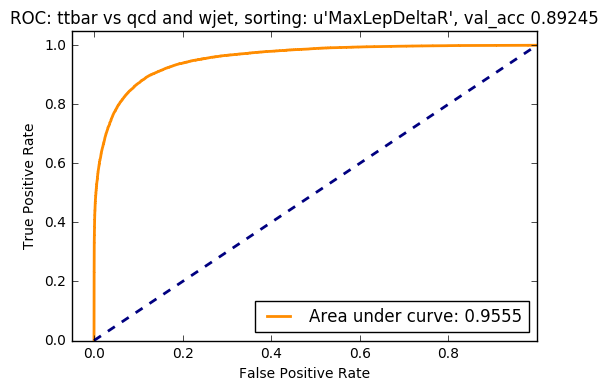

DataProcedure results '514d7de178831b09ff5e4e2220422fe6b6c9a9d9' read from archive
DataProcedure results '514d7de178831b09ff5e4e2220422fe6b6c9a9d9' read from archive
(3078, None)
DataProcedure results '2f6141d869c14b825765f2aa0f7a28c9e384d86b' read from archive
(6156, None)
DataProcedure results '188b626236b1ec1350ba001af4d3ae9b665d2c81' read from archive
(9234, None)
DataProcedure results '0fd6b5dc70ccc44c99f2d994971d0a17bf791c58' read from archive
(12312, None)
DataProcedure results '1a4f9f3f73410125c1b97dbd873960b1cd387823' read from archive
(15390, None)
DataProcedure results 'ac5e53e6fc2f5a91644672942513c69d824843b7' read from archive
(18468, None)
DataProcedure results '864692d716fbc31268a122045201e4ca34594599' read from archive
(21546, None)
DataProcedure results '7ef6565f24ca14d796bd6411b2a95ba4fe5e60bf' read from archive
(24624, None)
DataProcedure results '4a67e9040ef0841741b3776f3a11db03582b3ef1' read from archive
(27702, None)
DataProcedure results '36cf8456862de2a8928d9855

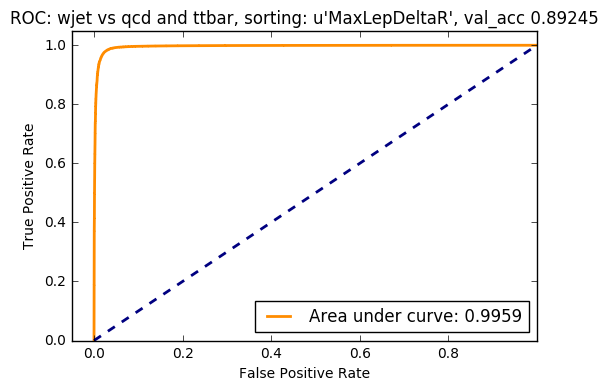

In [4]:
from CMS_Deep_Learning.postprocessing.plot import plot_roc_curve

    
   
    #plt.xlim([.0, 1.01])
    #plt.ylim([.0, 1.01])
    #plt.title("ROC Curve")
    #plt.plot( tpr, fpr )d2fd2c62cbe832d33fbe1a0f313850836f76bbc5

plot_roc_curve(best_qcd_wjet,true_index=1, title="ROC: qcd vs wjet, sorting: %r, val_acc %r" \
               % tuple(best_qcd_wjet.get_from_record(["sort_on", "val_acc"])))



plot_roc_curve(best_ttbar_wjet,true_index=0, title="ROC: ttbar vs wjet, sorting: %r, val_acc %r" \
               % tuple(best_ttbar_wjet.get_from_record(["sort_on", "val_acc"])))


plot_roc_curve(best_qcd_ttbar,true_index=1, title="ROC: qcd vs ttbar, sorting: %r, val_acc %r" \
               % tuple(best_qcd_ttbar.get_from_record(["sort_on", "val_acc"])))


plot_roc_curve(best_qcd_ttbar_wjet,true_index=1, title="ROC: ttbar vs qcd and wjet, sorting: %r, val_acc %r" \
               % tuple(best_qcd_ttbar_wjet.get_from_record(["sort_on", "val_acc"])))
plot_roc_curve(best_qcd_ttbar_wjet,true_index=2, title="ROC: wjet vs qcd and ttbar, sorting: %r, val_acc %r" \
               % tuple(best_qcd_ttbar_wjet.get_from_record(["sort_on", "val_acc"])))
    
#for z,p in zip(tpr, fpr):
#    print(z,p)
    
    

In [8]:
!pip install pyparsing==1.5.7
!pip install pydot==1.0.28
!pip install graphviz

--------------------------------------------------
TRIAL SUMMARY (b701497e5b5f3775951d0e8524263659f22d553c)
    Record_Info:
        name = ["LSTM"], elapse_time = 5:19:04, last_epoch = 28, start_time = "02-26-2017 20:17:50 PST-PDT"
        val_acc = 0.9949
        num_train = 200000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "wjet"], lstm_dropout = 0.0, num_val = 40000, output_activation = "softmax", patience = 8, query = null, single_list = true, sort_ascending = true, sort_on = "PT_ET"
    Fit:
        batch_size=32, nb_epoch=30, callbacks=[{u'patience': 8, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


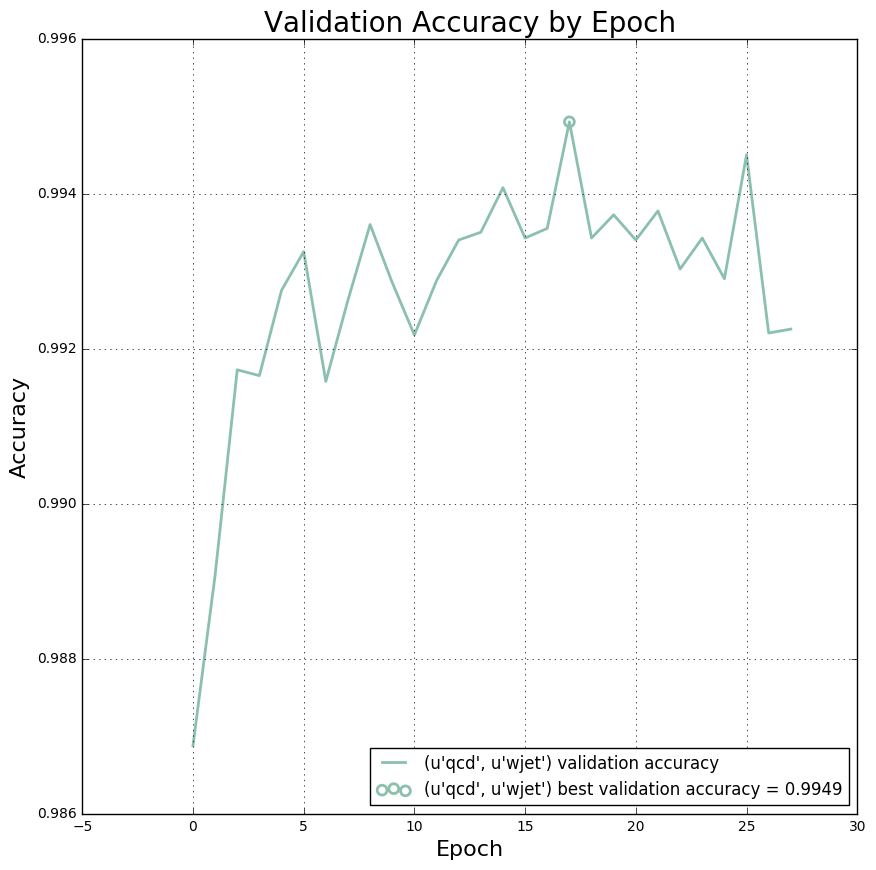

--------------------------------------------------
TRIAL SUMMARY (73f08cfb0545edb69ab086bfc0087d181034e0c5)
    Record_Info:
        name = ["LSTM"], elapse_time = 4:57:16, last_epoch = 30, start_time = "02-27-2017 01:38:57 PST-PDT"
        val_acc = 0.9698
        num_train = 200000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["ttbar", "wjet"], lstm_dropout = 0.0, num_val = 40000, output_activation = "softmax", patience = 8, query = null, single_list = true, sort_ascending = true, sort_on = "PT_ET"
    Fit:
        batch_size=32, nb_epoch=30, callbacks=[{u'patience': 8, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


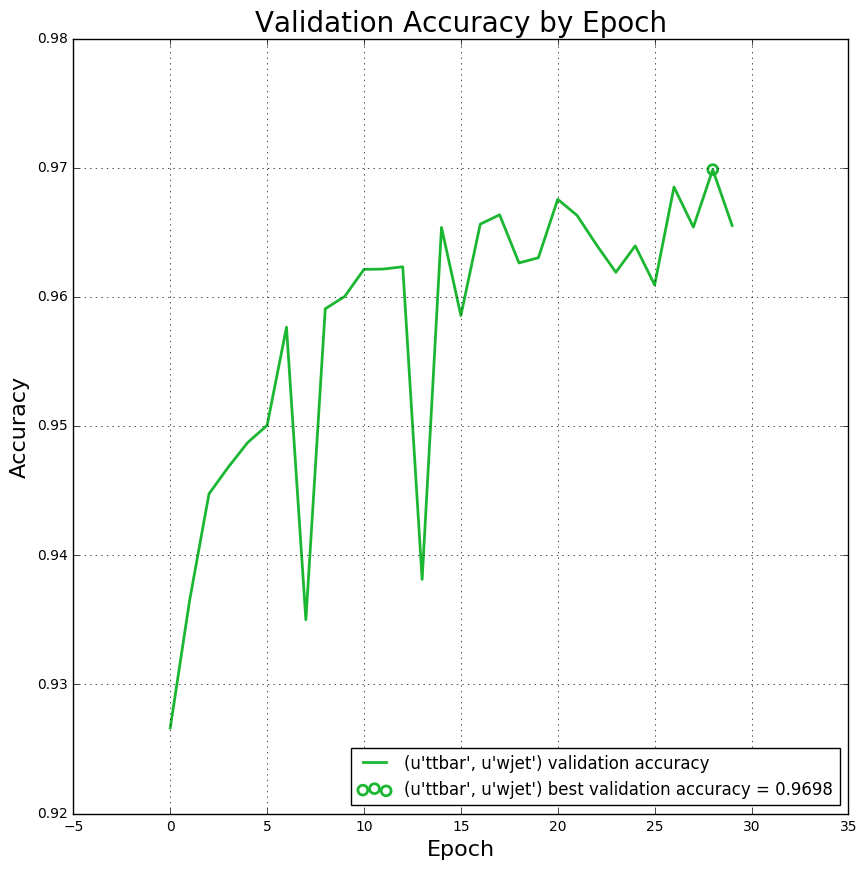

--------------------------------------------------
TRIAL SUMMARY (d2fd2c62cbe832d33fbe1a0f313850836f76bbc5)
    Record_Info:
        name = ["LSTM"], elapse_time = 7:42:25, last_epoch = 30, start_time = "02-26-2017 12:32:42 PST-PDT"
        val_acc = 0.8592
        num_train = 200000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "ttbar"], lstm_dropout = 0.0, num_val = 40000, output_activation = "softmax", patience = 8, query = null, single_list = true, sort_ascending = true, sort_on = "PT_ET"
    Fit:
        batch_size=32, nb_epoch=30, callbacks=[{u'patience': 8, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


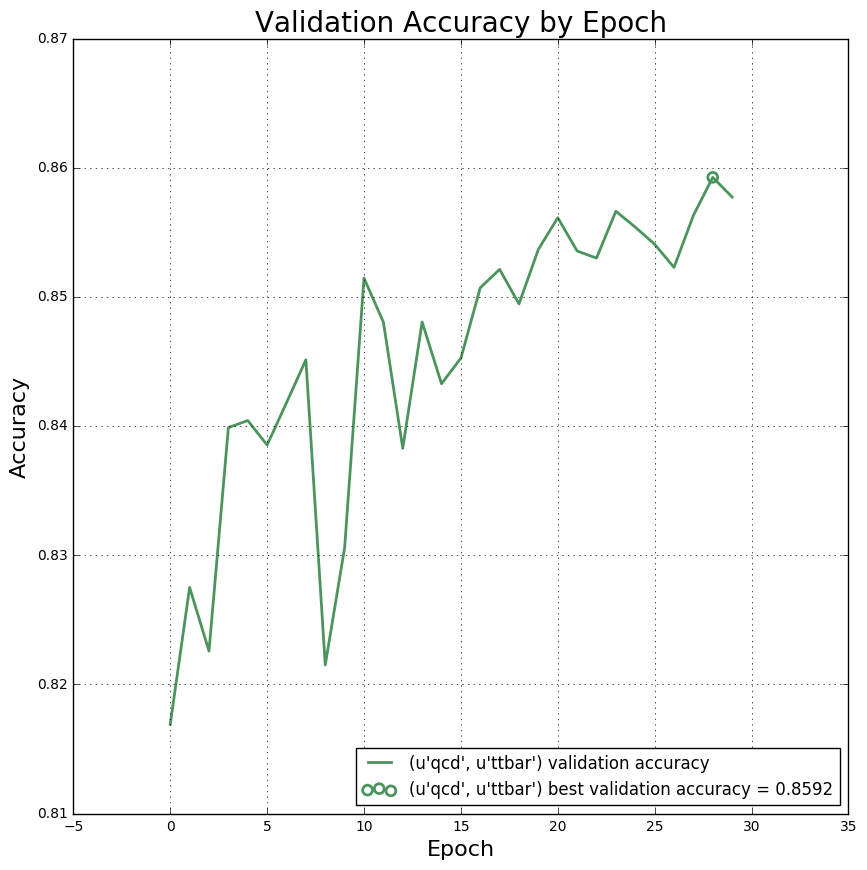

--------------------------------------------------
TRIAL SUMMARY (9c00977ef8e932f946f10318a3f1e30f84ecb2b0)
    Record_Info:
        name = ["LSTM"], elapse_time = 7:13:51, last_epoch = 30, start_time = "02-28-2017 00:06:57 PST-PDT"
        val_acc = 0.8924
        num_train = 300000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "ttbar", "wjet"], lstm_dropout = 0.0, num_val = 60000, output_activation = "softmax", patience = 8, query = null, single_list = true, sort_ascending = false, sort_on = "MaxLepDeltaR"
    Fit:
        batch_size=32, nb_epoch=30, callbacks=[{u'patience': 8, u'verbose': 1, u'type': u'EarlyStopping', u'mode': u'auto', u'monitor': u'val_loss'}], validation_split=0.0, shuffle=True, class_weight={}
--------------------------------------------------


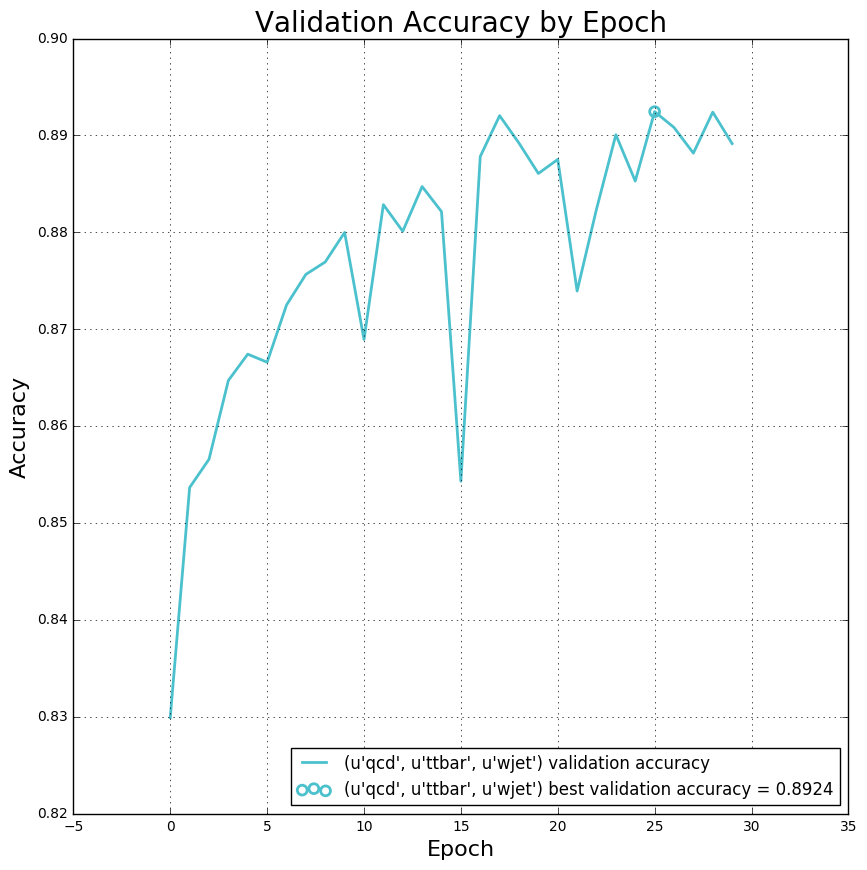

In [3]:
#import pydot
#print(pydot.__version__)
plotEverything(best_qcd_wjet)
plotEverything(best_ttbar_wjet)
plotEverything(best_qcd_ttbar)
plotEverything(best_qcd_ttbar_wjet)

In [87]:
#from CMS_Deep_Learning.storage.archiving import find_by_hashcode
trial = KerasTrial.find_by_hashcode(archive_dir,"d93e69176caef48cd3f187e137fb03c305b5f156")
trial.summary()
#trials = findWithMetrics(trials, {"single_list" : True})
tr =TrialIterator(trial, return_X=True, return_Y=True)
tr_single = tr.asList()

trial = KerasTrial.find_by_hashcode(archive_dir,"1bea8d9f9edd7911ed0b194862a0684693c5af1f")
trial.summary()
#trials = get_trials_by_name("LSTM", archive_dir)
#trials = findWithMetrics(trials, {"single_list" : False})
tr =TrialIterator(trial, return_X=True, return_Y=True)
tr_not = tr.asList()


AttributeError: 'NoneType' object has no attribute 'summary'

In [43]:
np.set_printoptions(threshold='nan')
print(tr_single[0][0][0])
print("Multi")
for x in tr_not[0]:
    print("")
    print(len(x[0]))
    print(x[0])
#print([len(x[0]) for x in tr_not[0]])

[[  1.60715463e+02  -1.28822196e+01   2.14808819e+01   1.58751630e+02
    2.50475521e+01   2.54587817e+00   2.11099982e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   1.04478998e+01  -1.67793698e-12
    0.00000000e+00   0.00000000e+00   0.00000000e+00  -1.00000000e+00
    9.15675143e-03   5.35937586e-03   1.79858028e-02   1.00000000e+00]
 [  1.01806505e+03  -1.15896376e+01  -2.16563685e+01   1.01776870e+03
    2.45625324e+01   4.41743851e+00  -2.06217527e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   4.00000000e+00]
 [  4.29083788e+01   7.42874199e+00  -1.47639727e+01   3.95975741e+01
    1.65275860e+01   1.60783958e+00  -1.10461843e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   4.29083786e+01   0.00000000e+00   0.00000000e+00
    7.80839404e-03

In [58]:
print_by_labels(trials, 4)



 Classification: ('ttbar', 'wjet') 'Top 4 trials'
--------------------------------------------------
TRIAL SUMMARY (94c489b8384189006727fd44f7d5ae72d864f2b5)
    Record_Info:
        name = ["LSTM"], elapse_time = 3:45:43, last_epoch = 26, start_time = "02-25-2017 06:33:22 PST-PDT"
        val_acc = 0.9677
        num_train = 200000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["ttbar", "wjet"], lstm_dropout = 0.0, num_val = 40000, output_activation = "softmax", patience = 8, query = null, single_list = false, sort_ascending = false, sort_on = "MaxLepDeltaEta"
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (84b962d7e222f4b752d795c6640956ec10b87e12)
    Record_Info:
        name = ["LSTM"], elapse_time = 4:06:48, last_epoch = 30, start_time = "02-23-2017 17:41:05 PST-PDT"
        val_acc = 0.9674
        num_train = 200000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["ttbar", "w

In [4]:
#import sklearn

trial = trials[0]

observable_ordering=['E/c', 'Px', 'Py', 'Pz', 'PT_ET','Eta', 'Phi', 'Charge', 'X', 'Y', 'Z', 
                     'Dxy', 'Ehad', 'Eem', 'MuIso', 'EleIso', 'ChHadIso','NeuHadIso','GammaIso']
object_ordering=["Electron", "MuonTight", "MissingET","EFlowPhoton", "EFlowNeutralHadron", "EFlowTrack"]

#=d = accVsEventChar(trial, None, np.sum, "PT_ET", objects=["EFlowPhoton","EFlowNeutralHadron","EFlowTrack"], 
#                       observable_ordering=observable_ordering,object_ordering=object_ordering,
#                       bins=20,custom_objects={"Slice": Slice, "Lorentz": Lorentz},equalBins=False)
d = accVsEventChar(trial, None, np.sum, "PT_ET", objects=["EFlowPhoton","EFlowNeutralHadron","EFlowTrack"],
                       observable_ordering=observable_ordering,object_ordering=object_ordering,
                       bins=20,custom_objects={"Slice": Slice, "Lorentz": Lorentz},equalBins=False, plot=True)
#assert set([t for t in d.items()]) == set([t for t in d2.items()])
#def plot_ROC(trial):
#    X,Y = 
#    sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)

DataProcedure results 'ea70748b0ba03c0e745781b3cab5b3ef58d8c186' read from archive
DataProcedure results 'ea70748b0ba03c0e745781b3cab5b3ef58d8c186' read from archive


IndexError: list index out of range

In [55]:
#trials = findWithMetrics(trials, {"useObjTypeColumn" : True})
print_by_labels(trials, 4)

#plot_history([("Fully connected:", trials[0].get_history())], plotLoss=False)




 Classification: ('qcd', 'wjet') 'Top 4 trials'
--------------------------------------------------
TRIAL SUMMARY (158aa6b5e8cbf3b7ee3e5f7903b481a7890c7801)
    Record_Info:
        name = ["LSTM"], elapse_time = 4:13:18, last_epoch = 30, start_time = "02-24-2017 07:15:41 PST-PDT"
        val_acc = 0.9911
        num_train = 200000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "wjet"], lstm_dropout = 0.0, num_val = 40000, output_activation = "softmax", patience = 8, query = null, single_list = true, sort_ascending = false, sort_on = "MaxLepDeltaEta"
--------------------------------------------------
--------------------------------------------------
TRIAL SUMMARY (a2b4e04bbb827b1d234063d8849799463e4dab5c)
    Record_Info:
        name = ["LSTM"], elapse_time = 2:44:09, last_epoch = 21, start_time = "02-22-2017 20:31:35 PST-PDT"
        val_acc = 0.9894
        num_train = 200000
        activation = "tanh", depth = 1, dropout = 0.0, labels = ["qcd", "wjet"], 

In [ ]:
t = findWithMetrics(trials, {"labels" : [u'ttbar', u'wjet', u'qcd'], 'sort_on' : "Phi"})
t[0].summary(showCompilation=True, showFit=True)

In [4]:
plotEverything(trials)
    
    


RuntimeError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [5]:
def print_by_labels(trials, num_print=None, sortMetric='val_acc'):
    '''Prints trials ordered and grouped by their labeles
        #Arguments:
            trials -- A list of KerasTrials
            num_print -- How many to print, Defaults is all of them.
            sortMetric -- What metric to sort the trials on
    '''
    trials_by_set = group_by_labels(trials)
    for classification in trials_by_set:
        lst = trials_by_set[classification]
        head_str = "\n\n Classification: %r %r" % (classification,
                                                   "Top %r trials" % num_print if num_print != None else "")
        print(head_str)
        sortOnMetric(lst, sortMetric=sortMetric)
        if (num_print == None): num_print = len(lst)
        for i in range(min(num_print, len(lst))):
            lst[i].summary(showTraining=False, showValidation=False, showFit=False, showCompilation=True)

In [13]:
no_single = findWithMetrics(trials,{"single_list" : False,"optimizer" : "adam"})
print(len(no_single))
phi = findWithMetrics(no_single,{"sort_on" : "Phi"})
eta = findWithMetrics(no_single,{"sort_on" : "Eta"})
PT_as = findWithMetrics(no_single,{"sort_on" : "PT_ET", "sort_ascending" : True})
PT_de = findWithMetrics(no_single,{"sort_on" : "PT_ET", "sort_ascending" : False})
#[t.summary(showCompilation=True) for t in phi]
print_by_labels(phi, 4)
print_by_labels(eta, 4)
print(len(phi), len(eta), len(PT_as), len(PT_de))
sortOnMetric(phi, "labels")
sortOnMetric(eta, "labels")
sortOnMetric(PT_as, "labels")
sortOnMetric(PT_de, "labels")
labelGroups = zip(phi,eta,PT_as,PT_de)

0
(0, 0, 0, 0)


7


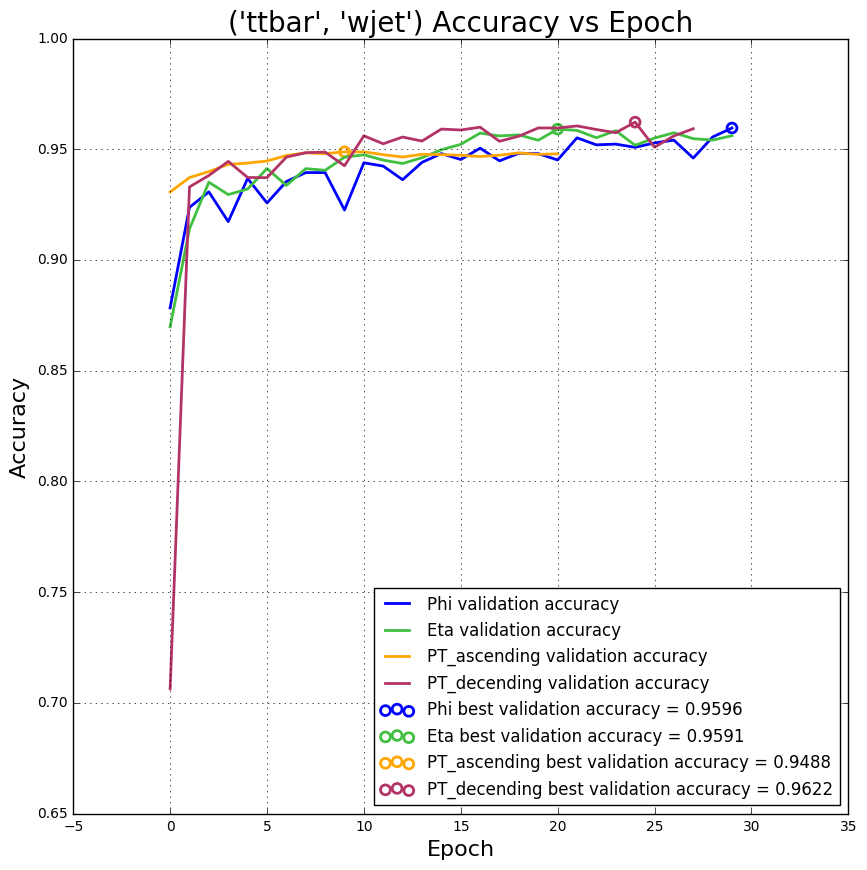

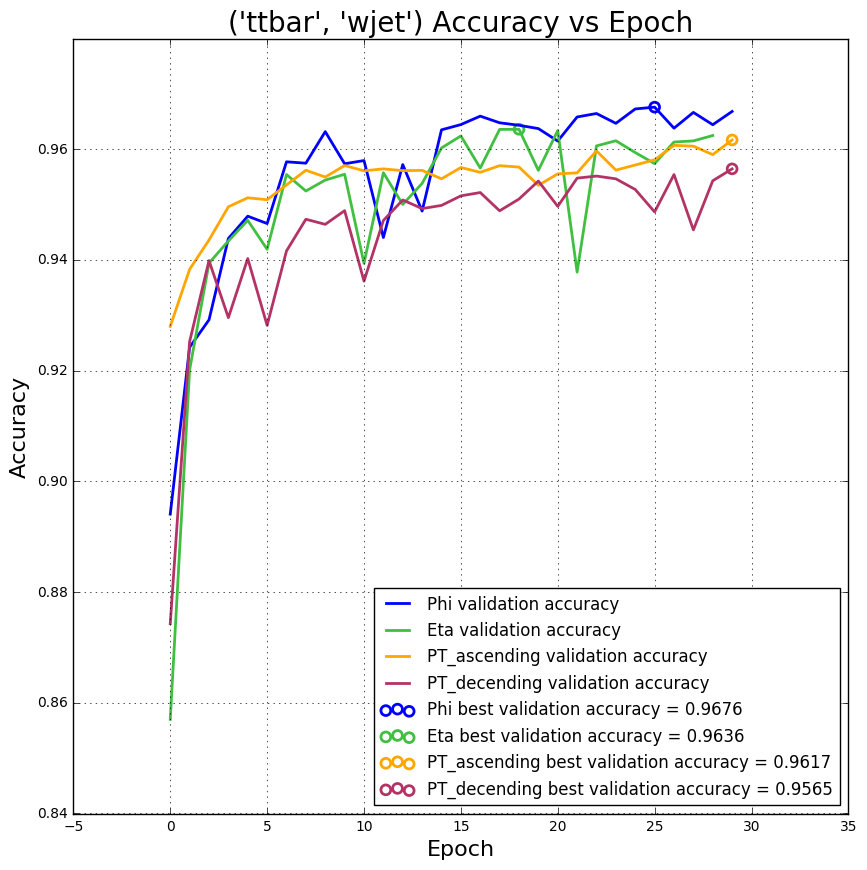

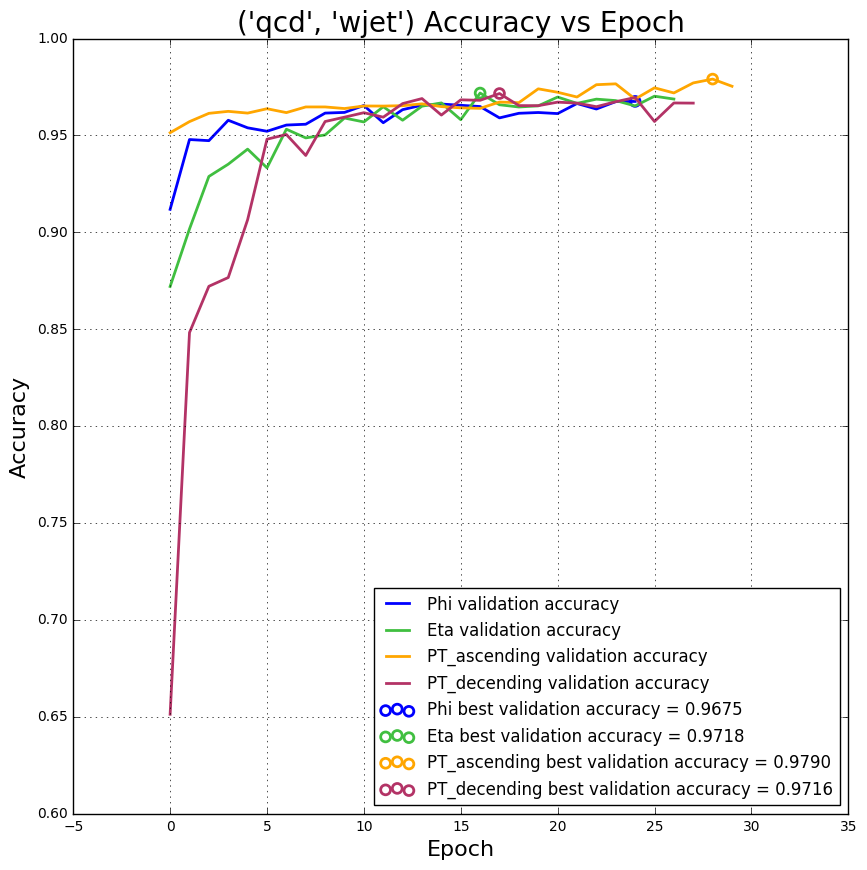

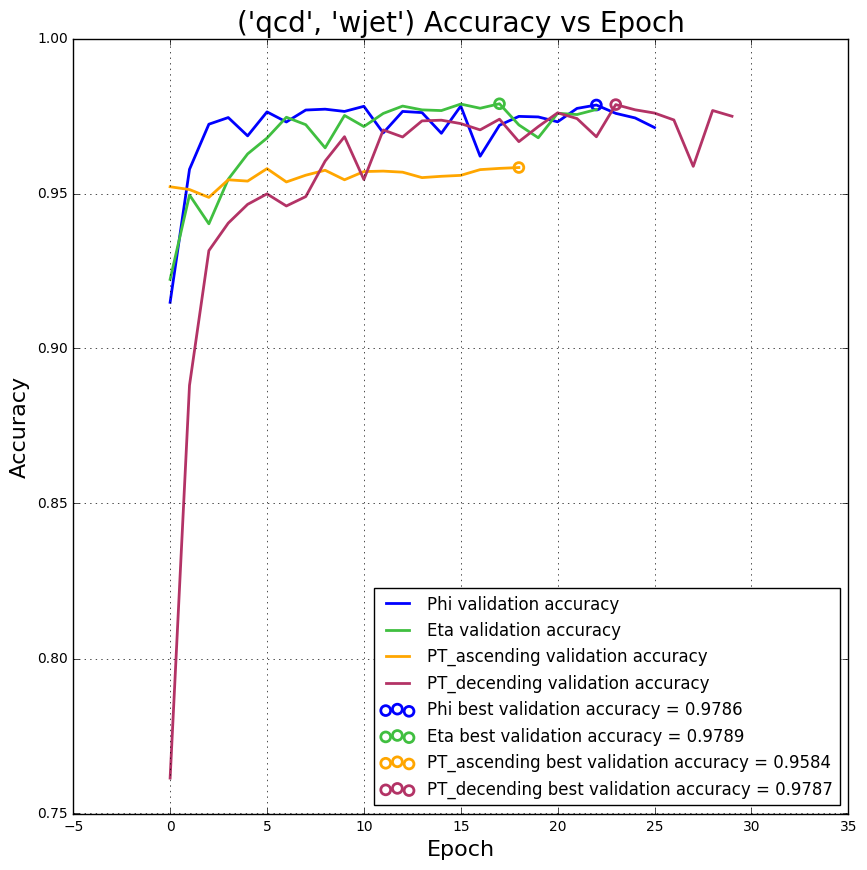

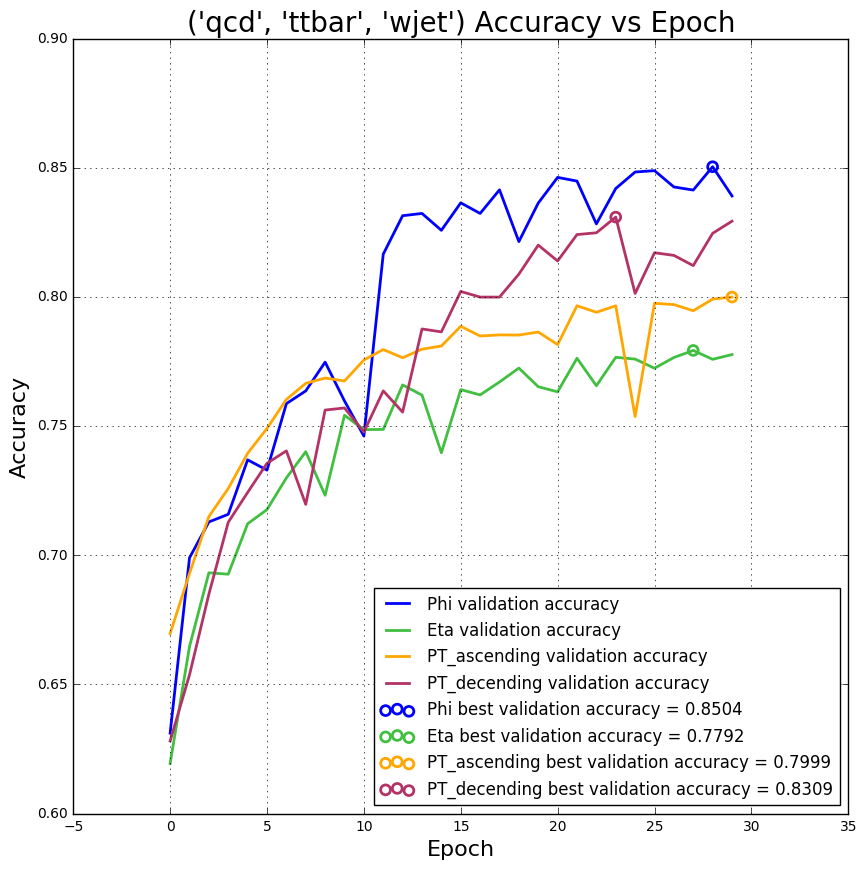

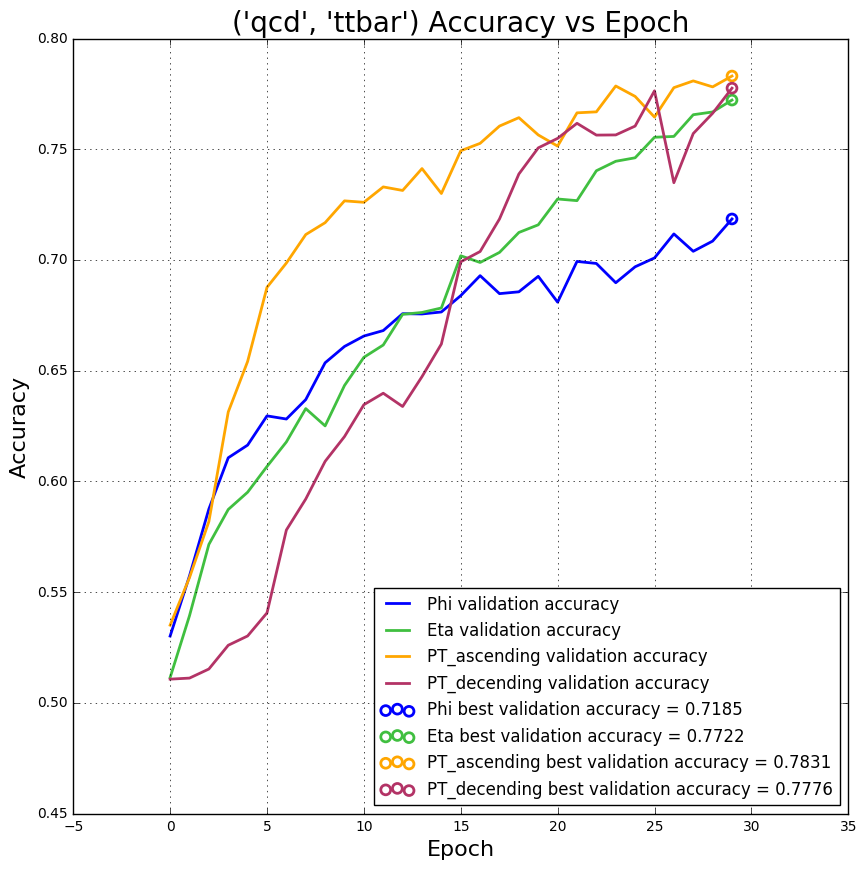

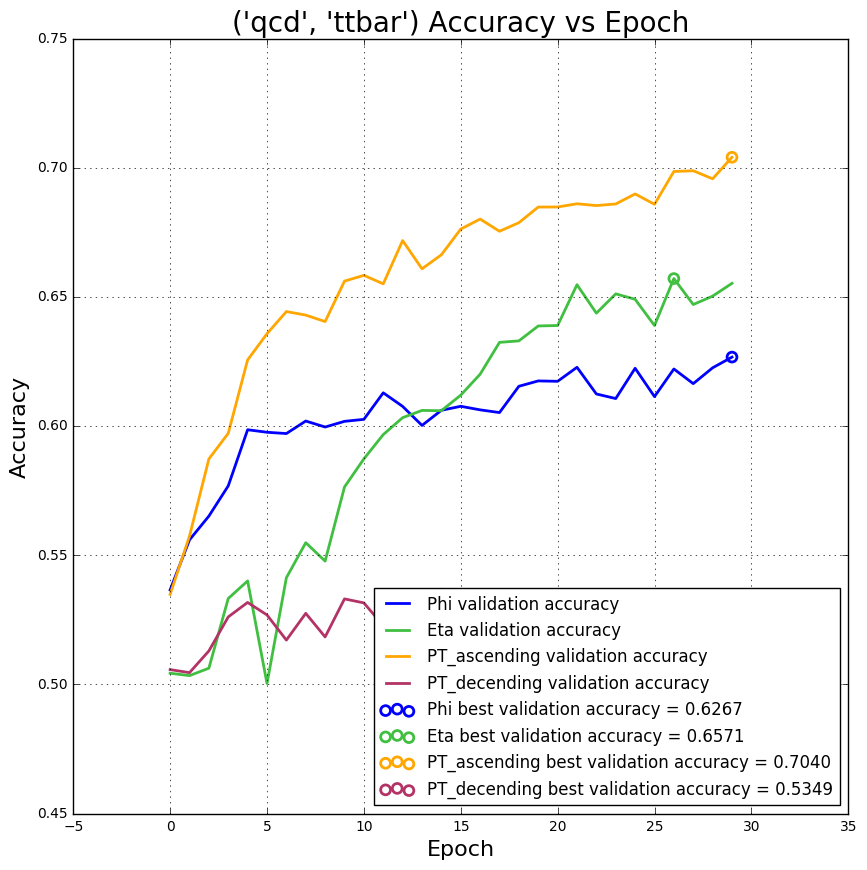

In [7]:
colors = [(0,0,1.0),(.25,.75,.25), (1,.65,0), (.7,.2,.4)]
names = ["Phi", "Eta","PT_ascending", "PT_decending"]
#lims = [[.7,.91], [.8,1.0],  [.8,1.0],  [.4,.82]]
print(len(labelGroups))
for j , tup in enumerate(labelGroups):
    plots = []
    for i, b in enumerate(tup):
        labels = b.get_from_record("labels")
        if(labels == None): labels = b.get_from_record("lables")
        title = str(tuple([str(x) for x in labels])) if(labels != None) else "Cannot Find Labels"
        title = title + " Accuracy vs Epoch"
        name = names[i]
        model = b.get_model(custom_objects={"Slice":Slice, "Lorentz" : Lorentz})
        history = b.get_history()
        color = colors[i]
        plots.append((name, history, color))
    plot_history(plots, plotLoss=False, title=title)#, acclims=lims[j])
    
    

In [ ]:
data = np.zeros(( len(labelGroups[0]),len(labelGroups) ) ).tolist()
print(data)
columns = [None] * len(labelGroups)
rows = [" "+ n + " " for n in names]

for j , tup in enumerate(labelGroups):
    for i, b in enumerate(tup):
        labels = b.get_from_record("labels")
        columns[j] = str(tuple([str(x) for x in labels]))
        error = getError(b,custom_objects={"Slice":Slice, "Lorentz" : Lorentz}, ignoreAssert=True)
        d = "%.5f %s %.5f" % (b.get_from_record("val_acc"),unichr(177), error)
        data[i][j] = d
        
        
#print(data)
        

In [ ]:
plotTable(rows, columns, data,scale=2, title="Validation Accuracy for LSTM Trials by Classification and Sorting")

In [ ]:
def getTrialBins(trial, bins=20):
    trial.summary()
    d = accVsEventChar(trial, None, np.sum, "PT_ET", ["EFlowPhoton","EFlowNeutralHadron","EFlowTrack"],
                       bins=bins,custom_objects={"Slice": Slice, "Lorentz": Lorentz},equalBins=False)
    #plotBins(d,title='Accuracy vs Sum of PF Candidate PT', xlabel="PT GeV", ylabel='Accuracy', color=(0.553,0.188,0.38))
    return d
eta_bins = [getTrialBins(t,40) for t in eta]
phi_bins = [getTrialBins(t,40) for t in phi]

In [ ]:
colors = [(0,0,1.0),(.25,.75,.25), (1,0,0), (1,.65,0)]
lables = [trial.get_from_record("labels") for trial in eta]
plotBins(eta_bins,mode="scatter",title='Eta-LSTM: Accuracy vs Sum of PF Candidate PT',binLabels=lables, xlabel="PT GeV", ylabel='Accuracy',
         legendTitle="Classification",colors=colors, alpha=.2, ylim=(0.75, 1.025), xlim=(0,3000))

lables = [trial.get_from_record("labels") for trial in phi]
plotBins(phi_bins,mode="scatter",title='Phi-LSTM: Accuracy vs Sum of PF Candidate PT',binLabels=lables, xlabel="PT GeV", ylabel='Accuracy',
         legendTitle="Classification",legendBelow=True,colors=colors, alpha=.4, ylim=(0.75, 1.025), xlim=(0,3000))

In [ ]:
import sys
import numpy as np
from CMS_Deep_Learning.storage.archiving import DataProcedure
if(sys.version_info[0] > 2):
    from inspect import signature
    getNumParams = lambda f: len(signature(f).parameters)
else:
    from inspect import getargspec
    getNumParams = lambda f: len(getargspec(f)[0])


class DataIterator:
    def __init__(self, proc, num_samples=None, return_X=False, return_Y=True, accumilate=None, prediction_model=None):
        if (isinstance(proc, list)):
            first_data = proc[0].getData()
        else:
            first_data = proc.getData()
        if (isinstance(first_data, types.GeneratorType)):
            proc = first_data

        self.proc = proc
        self.num_samples = num_samples
        self.accumilate = accumilate
        self.prediction_model = prediction_model
        self.return_X = return_X
        self.return_Y = return_Y
        if (isinstance(proc, list)):
            if (False in [isinstance(p, DataProcedure) for p in proc]):
                raise ValueError("procedure list must contain only DataProcedures")
            # self.next = _listNext
            self.proc_itr = iter(self.proc)
            self.mode = "list"
        elif (isinstance(proc, types.GeneratorType)):
            if (num_samples == None):
                raise ValueError("num_samples must be passed along with procedure generator.")
            # self.next = _genNext
            self.mode = "generator"
        else:
            raise ValueError("Bad input.")
            # initialize(proc, num_samples=num_samples, accumilate=accumilate, prediction_model=prediction_model)

    def getLength(self):
        if (self.num_samples == None):
            num_samples = 0
            for p in self.proc:
                if (isinstance(p, DataProcedure)):
                    X, Y = p.getData()
                else:
                    X, Y = p
                if (not isinstance(Y, list)): Y = [Y]
                num_samples += Y[0].shape[0]
            self.num_samples = num_samples
        return self.num_samples

    def asList(self):
        if (self.accumilate != None): num_params  =getNumParams(self.accumilate)
        X_out = None
        Y_out = None
        pred_out = None
        acc_out = None
        pos = 0
        for p in self.proc:
            X, Y = p.getData()

            if (not isinstance(Y, list)): Y = [Y]
            L = Y[0].shape[0]

            if (not isinstance(X, list)): X = [X]
            if (self.return_X):
                if (X_out == None): X_out = [[None] * self.getLength() for i in range(len(X))]
                # print([len(x) for x in X_out])
                # print([len(x) for x in X])
                for i, x in enumerate(X):
                    Xi_out = X_out[i]
                    # print(len(xi))
                    for j in range(L):
                        Xi_out[pos + j] = x[j]

            if (self.return_Y):
                if (Y_out == None): Y_out = [[None] * self.getLength() for i in range(len(Y))]
                for i, y in enumerate(Y):
                    Yi_out = Y_out[i]
                    for j in range(L):
                        Yi_out[pos + j] = y[j]

            if (self.prediction_model != None):
                if (pred_out == None): pred_out = [None] * self.getLength()
                pred = self.prediction_model.predict_on_batch(X)
                for j in range(L):
                    pred_out[pos + j] = pred[j]

            if (self.accumilate != None):
                if (acc_out == None): acc_out = [None] * self.getLength()
                if(num_params == 1):
                    acc = self.accumilate(X)
                else:
                    acc = self.accumilate(X,Y)
                for j in range(L):
                    acc_out[pos + j] = acc[j]
                    print(len(acc_out),pos + j)

            pos += L
            print(pos, self.accumilate)  # ,acc_out))
        out = []
        if (X_out != None):
            for i, xo in enumerate(X_out):
                X_out[i] = np.array(xo)
            out.append(X_out)
        if (Y_out != None):
            for i, yo in enumerate(Y_out):
                Y_out[i] = np.array(yo)
            out.append(Y_out)
        if (pred_out != None):
            out.append(np.array(pred_out))
        if (acc_out != None):
            out.append(np.array(acc_out))
        return out

    # def _genNext():
    #    #N = num_samples/ba
    #    data = data.getData()
    #    for i in range(self.num_samples)
    #        yield next(data)
    #    return StopIteration()
    '''
    def _listNext():
        for p in self.proc:
            X,Y = p.getData()
            pred = self.prediction_model.predict_on_batch(X) if self.prediction_model != None else None
            acc = self.accumilate(X) if self.accumilate != None else None
            for  in
                yield next(self.proc)
        return StopIteration()
    '''

    def __iter__(self):
        return self

        # def next(self):
        #    self.count += 1
        #    if(self.mode == 0):


class TrialIterator(DataIterator):
    def __init__(self, trial, data_type="val", return_X=False, return_Y=True, accumilate=None, return_prediction=False,
                 custom_objects={}):
        if (data_type == "val"):
            proc = [DataProcedure.from_json(trial.archive_dir, t) for t in trial.val_procedure]
            num_samples = trial.nb_val_samples
        elif (data_type == "train"):
            proc = [DataProcedure.from_json(trial.archive_dir, t) for t in trial.train_procedure]
            num_samples = trial.samples_per_epoch
        else:
            raise ValueError("data_type must be either val or train but got %r" % data_type)
        model = None
        if (return_prediction):
            model = trial.compile(loadweights=True, custom_objects=custom_objects)
        DataIterator.__init__(self, proc, num_samples=num_samples, return_X=return_X, return_Y=return_Y,
                              accumilate=accumilate, prediction_model=model)
def getError(model, data=None, num_samples=None,custom_objects={}, ignoreAssert=False):
    '''
    Finds the standard error of the mean for the validation accuracy of a model on a dataset or a trial.
    #Arguements:
            model -- The model being evaluated, or a KerasTrial containing a valid model.
            data  -- A generator, or DataProcedure containing the data to be run through the model. If a generator or DataProcedure
                     containing a generator is given the num_samples must be set. If model is a KerasTrial this can be set to None, and the validation
                     set will be found from the archive (or computed) and used in place of data.
            num_samples -- The number of samples to evaluate the error on.
            custom_objects -- A dictionary keyed by names containing the classes of any model components not used in the standard Keras library.
            ignoreAssert -- If True ignore assertion errors. This code tests to see that the validation accuracy it computes is similar to the one computed by keras.
                            If this is not the case then an error will be raised.
    #Returns:
        The standard error of the validation accuracy
    '''
    isTrial = False
    if(isinstance(model, KerasTrial)):
        trial = model
        model = trial.compile(loadweights=True,custom_objects=custom_objects)
        isTrial = True

    def accum(X,Y):
        return model.test_on_batch(X,Y)

    if (isTrial):
        dItr = TrialIterator(trial, return_X=False, return_Y=False, return_prediction=False, accumilate=accum)
    else:
        dItr = DataIterator(data, return_X=False, return_Y=False,
                            num_samples=num_samples, accumilate=accum)

    batch_metrics = dItr.asList()

    batch_metrics = np.array(batch_metrics)
    avg = np.mean(batch_metrics, axis=0, dtype='float64')
    sem = np.std(batch_metrics, axis=0, dtype='float64')/np.sqrt(i)
    if(not ignoreAssert and trial.get_from_record("val_acc") != None):
        np.testing.assert_almost_equal(trial.get_from_record("val_acc"), avg[1], decimal=3)
    else:
        trial.to_record({"val_acc_" : avg[1]})
    trial.to_record({"val_acc_error" : sem[1]})
    return trial.get_from_record("val_acc_error")

trial = trials[0]
print(getError(trial,custom_objects={"Slice": Slice, "Lorentz": Lorentz}))